In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
complex_df = pd.read_pickle('/home/ubuntu/complex_label.pkl')

In [3]:
complex_df.columns

Index(['GeneAB', 'Same_Complex'], dtype='object')

In [4]:
pw = pd.read_pickle('/home/ubuntu/allpairs_spearman_correlation.pkl')

In [5]:
import os
df=pd.DataFrame()
for f in os.listdir('/home/ubuntu/scgpt_split_outputs'):
    if f.startswith('scGPT'):
        
        name = f[:-20]
        print(f'Loading {name}...')
        data = pd.read_pickle('/home/ubuntu/scgpt_split_outputs/' + f)
        df[name] = data['Cosine_Similarity'].to_list()

Loading scGPT_bc_embeddings_similarities...
Loading scGPT_pancancer_embeddings_similarities...
Loading scGPT_CP_embeddings_similarities...
Loading scGPT_lung_embeddings_similarities...
Loading scGPT_heart_embeddings_similarities...
Loading scGPT_brain_embeddings_similarities...
Loading scGPT_kidney_embeddings_similarities...
Loading scGPT_human_embeddings_similarities...


In [6]:
for f in os.listdir('/home/ubuntu/gf_split_outputs'):
    if f.startswith('GF'):
        
        name = f[:-20]
        print(f'Loading {name}...')
        data = pd.read_pickle('/home/ubuntu/gf_split_outputs/' + f)
        df[name] = data['Cosine_Similarity'].to_list()

Loading GF-6L30M_HUMANemb_similarities...
Loading GF-20L95M_HUMANemb_similarities...
Loading GF-12L95M_HUMANemb_similarities...
Loading GF-12L95MCANCER_UNIPROT_HUMANemb_similarities...
Loading GF-12L30M_HUMANemb_similarities...


In [7]:
df['Correlation'] = pw['Correlation'].to_list()

In [8]:
df['Same_Complex'] = complex_df['Same_Complex'].to_list()

In [9]:
# df['Gene_A'] = gene_pairs['Gene_A'].to_list()
# df['Gene_B'] = gene_pairs['Gene_B'].to_list()

df['GeneAB'] = complex_df['GeneAB'].to_list()

In [10]:
df

scGPT_bc_embeddings_similarities  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
200794870                               NaN   
200794871                               NaN   
200794872                               NaN   
200794873                               NaN   
200794874                               NaN   

           scGPT_pancancer_embeddings_similarities  \
0                                         0.566069   
1                                        -0.083783   
2                                         0.336766   
3                                         0.258465   
4                                         0.151502   
...                                            ...   
200794870                                 0.058843   
200794871                                 0.055566   
200794872                                 0.012171   
200794873                                 0.020594   
200794874                                 0.005670   

           scGPT_CP_embeddings_similarities  \
0                                  0.356636   
1                                  0.105390   
2                                  0.159616   
3                                  0.210777   
4                                  0.099180   
...                                     ...   
200794870                         -0.123608   
200794871                          0.068872   
200794872                         -0.037853   
200794873                          0.128618   
200794874                         -0.103562   

           scGPT_lung_embeddings_similarities  \
0                                    0.224554   
1                                    0.051439   
2                                    0.118687   
3                                    0.104398   
4                                   -0.046862   
...                                       ...   
200794870                            0.025317   
200794871                            0.036179   
200794872                           -0.023328   
200794873                            0.060834   
200794874                            0.035800   

           scGPT_heart_embeddings_similarities  \
0                                     0.117288   
1                                     0.034904   
2                                     0.068871   
3                                     0.070150   
4                                    -0.016629   
...                                        ...   
200794870                             0.011302   
200794871                            -0.039677   
200794872                            -0.022463   
200794873                             0.002627   
200794874                             0.004945   

           scGPT_brain_embeddings_similarities  \
0                                     0.114432   
1                                     0.051954   
2                                     0.069045   
3                                     0.016221   
4                                     0.038130   
...                                        ...   
200794870                             0.020572   
200794871                            -0.038647   
200794872                            -0.078864   
200794873                            -0.001737   
200794874                             0.026250   

           scGPT_kidney_embeddings_similarities  \
0                                      0.149671   
1                                      0.024855   
2                                      0.060269   
3                                      0.079906   
4                                     -0.063625   
...                                         ...   
200794870                              0.028625   
200794871                        

In [11]:
#df.to_pickle('full_dataset.pkl')

In [12]:
X_full = df.dropna()

In [13]:
X_full

scGPT_bc_embeddings_similarities  \
949027                             0.063506   
949028                            -0.056565   
949029                             0.116124   
949030                             0.016978   
949031                            -0.031810   
...                                     ...   
200776377                         -0.110339   
200776434                         -0.034737   
200776892                         -0.001384   
200776899                         -0.035554   
200777222                          0.092353   

           scGPT_pancancer_embeddings_similarities  \
949027                                    0.135321   
949028                                    0.079216   
949029                                    0.308463   
949030                                    0.058653   
949031                                    0.006320   
...                                            ...   
200776377                                 0.086440   
200776434                                 0.127792   
200776892                                -0.010163   
200776899                                -0.046015   
200777222                                -0.031161   

           scGPT_CP_embeddings_similarities  \
949027                             0.234719   
949028                             0.161900   
949029                             0.226987   
949030                            -0.002022   
949031                            -0.130927   
...                                     ...   
200776377                          0.089373   
200776434                          0.063827   
200776892                         -0.005988   
200776899                          0.062382   
200777222                          0.100506   

           scGPT_lung_embeddings_similarities  \
949027                               0.125535   
949028                              -0.021724   
949029                               0.087753   
949030                              -0.049605   
949031                              -0.091508   
...                                       ...   
200776377                            0.034659   
200776434                           -0.004790   
200776892                            0.030453   
200776899                           -0.033491   
200777222                            0.077076   

           scGPT_heart_embeddings_similarities  \
949027                                0.135128   
949028                                0.012198   
949029                                0.112959   
949030                               -0.008472   
949031                               -0.121315   
...                                        ...   
200776377                             0.114352   
200776434                             0.008433   
200776892                             0.046065   
200776899                             0.045953   
200777222                             0.132020   

           scGPT_brain_embeddings_similarities  \
949027                                0.383622   
949028                                0.222155   
949029                                0.410780   
949030                                0.003432   
949031                               -0.185753   
...                                        ...   
200776377                             0.038629   
200776434                             0.048624   
200776892                            -0.061751   
200776899                             0.009507   
200777222                             0.014293   

           scGPT_kidney_embeddings_similarities  \
949027                                 0.079211   
949028                                -0.051431   
949029                                 0.055358   
949030                                -0.041763   
949031                                -0.089556   
...                                         ...   
200776377                              0.056565   
200776434                        

In [27]:
gene_filter = pd.read_csv("symmetric_gene_pairs_by_complex.csv")
gene_filter.rename(columns={'Gene_Pair':'GeneAB'}, inplace=True)

In [28]:
gene_filter[gene_filter['Complex']=='20S Proteasome']

GeneAB         Complex
0    PSMA1_PSMA2  20S Proteasome
1    PSMA1_PSMA3  20S Proteasome
2    PSMA1_PSMA4  20S Proteasome
3    PSMA1_PSMA5  20S Proteasome
4    PSMA1_PSMA6  20S Proteasome
..           ...             ...
177  PSMB7_PSMB2  20S Proteasome
178  PSMB7_PSMB3  20S Proteasome
179  PSMB7_PSMB4  20S Proteasome
180  PSMB7_PSMB5  20S Proteasome
181  PSMB7_PSMB6  20S Proteasome

[182 rows x 2 columns]

In [29]:
gene_filter['Complex'].value_counts()

IFT-B             240
20S Proteasome    182
IFT-A              30
Name: Complex, dtype: int64

In [30]:
gene_filter[gene_filter['Complex']=='IFT-B']

GeneAB Complex
212  TTC30A_HSPB11   IFT-B
213   TTC30A_IFT52   IFT-B
214   TTC30A_IFT74   IFT-B
215   TTC30A_IFT81   IFT-B
216  TTC30A_CCDC13   IFT-B
..             ...     ...
447    IFT88_IFT46   IFT-B
448    IFT88_IFT57   IFT-B
449    IFT88_IFT22   IFT-B
450   IFT88_TTC30B   IFT-B
451    IFT88_TTC26   IFT-B

[240 rows x 2 columns]

In [31]:
psm20 = X_full.merge(gene_filter[gene_filter['Complex']=='20S Proteasome'], on = 'GeneAB')
IFTA = X_full.merge(gene_filter[gene_filter['Complex']=='IFT-A'], on = 'GeneAB')
IFTB = X_full.merge(gene_filter[gene_filter['Complex']=='IFT-B'], on = 'GeneAB')

In [32]:
import pandas as pd

def sample_with_labels(X_full, gene_filter, complex_name, seed=42):
    # Step 1: Get real complex data
    complex_genes = gene_filter[gene_filter['Complex'] == complex_name]
    real_df = X_full.merge(complex_genes, on='GeneAB')
    real_df = real_df.copy()
    real_df['label'] = 1

    # Step 2: Sample background (exclude real GeneABs to avoid overlap)
    n_samples = len(real_df)
    available_background = X_full[~X_full['GeneAB'].isin(real_df['GeneAB'])]
    random_df = available_background.sample(n=n_samples, random_state=seed)
    random_df = random_df.copy()
    random_df['label'] = 0

    # Step 3: Concatenate and return
    combined_df = pd.concat([real_df, random_df], ignore_index=True)
    combined_df['Complex'] = complex_name  # Optional: keep track of complex origin
    return combined_df

# Apply for each complex
psm20_labeled = sample_with_labels(X_full, gene_filter, '20S Proteasome')
IFTA_labeled = sample_with_labels(X_full, gene_filter, 'IFT-A')
IFTB_labeled = sample_with_labels(X_full, gene_filter, 'IFT-B')


In [34]:
psm20_labeled

scGPT_bc_embeddings_similarities  \
0                            0.118855   
1                            0.087211   
2                            0.024815   
3                            0.170189   
4                            0.118950   
..                                ...   
177                          0.092046   
178                          0.122666   
179                          0.077128   
180                          0.019764   
181                         -0.057458   

     scGPT_pancancer_embeddings_similarities  \
0                                   0.298541   
1                                   0.227425   
2                                   0.194324   
3                                   0.374981   
4                                   0.356166   
..                                       ...   
177                                -0.008158   
178                                 0.254914   
179                                -0.017872   
180                                 0.155256   
181                                 0.098638   

     scGPT_CP_embeddings_similarities  scGPT_lung_embeddings_similarities  \
0                            0.220025                            0.008970   
1                            0.212141                            0.050376   
2                            0.072006                           -0.025188   
3                            0.430653                            0.193788   
4                            0.389374                            0.200127   
..                                ...                                 ...   
177                         -0.014546                           -0.013121   
178                          0.154406                            0.087619   
179                          0.018652                           -0.025777   
180                          0.038638                           -0.010968   
181                          0.069271                           -0.043087   

     scGPT_heart_embeddings_similarities  scGPT_brain_embeddings_similarities  \
0                               0.130560                             0.121699   
1                               0.187027                             0.291286   
2                               0.023855                             0.132699   
3                               0.060790                             0.361589   
4                               0.091871                             0.392725   
..                                   ...                                  ...   
177                            -0.111326                            -0.038259   
178                             0.112816                             0.391327   
179                             0.029296                             0.079419   
180                             0.026192                             0.300540   
181                            -0.022017                             0.097755   

     scGPT_kidney_embeddings_similarities  \
0                                0.139811   
1                                0.172401   
2                                0.004434   
3                                0.132932   
4                                0.098458   
..                                    ...   
177                             -0.047026   
178                              0.103898   
179                              0.012305   
180                             -0.000141   
181                             -0.045662   

     scGPT_human_embeddings_similarities  GF-6L30M_HUMANemb_similarities  \
0                               0.219694                        0.119415   
1                               0.212043                        0.125915   
2                               0.071773                        0.174796   
3                               0.430250                        0.195969   
4                               0.389228                        0.165756   
..                                   ...

In [67]:
#col_replace = {'scGPT_human_embeddings_similarities':'scGPT Cosine Sim, 'GF-20L95M_HUMANemb_similarities':'Geneformer Cosine Sim', 'Correlation':'Correlation'}
col_replace = {'scGPT':'scGPT Cosine Sim', 'Geneformer':'Geneformer Cosine Sim', 'Correlation':'Correlation'}


df_list = [psm20_labeled, IFTA_labeled, IFTB_labeled]
    

for df in df_list:
    df.rename(columns=col_replace,inplace=True)

    print(df.columns)


Index(['scGPT_bc_embeddings_similarities',
       'scGPT_pancancer_embeddings_similarities',
       'scGPT_CP_embeddings_similarities',
       'scGPT_lung_embeddings_similarities',
       'scGPT_heart_embeddings_similarities',
       'scGPT_brain_embeddings_similarities',
       'scGPT_kidney_embeddings_similarities', 'scGPT Cosine Sim',
       'GF-6L30M_HUMANemb_similarities', 'Geneformer Cosine Sim',
       'GF-12L95M_HUMANemb_similarities',
       'GF-12L95MCANCER_UNIPROT_HUMANemb_similarities',
       'GF-12L30M_HUMANemb_similarities', 'Correlation', 'label', 'GeneAB',
       'Complex'],
      dtype='object')
Index(['scGPT_bc_embeddings_similarities',
       'scGPT_pancancer_embeddings_similarities',
       'scGPT_CP_embeddings_similarities',
       'scGPT_lung_embeddings_similarities',
       'scGPT_heart_embeddings_similarities',
       'scGPT_brain_embeddings_similarities',
       'scGPT_kidney_embeddings_similarities', 'scGPT Cosine Sim',
       'GF-6L30M_HUMANemb_similarities'

In [33]:
psm20_labeled[psm20_labeled['Same_Complex']==0]['scGPT_human_embeddings_similarities'].mean()

KeyError: 'Same_Complex'

In [40]:
X_full['Correlation'].mean()

0.26759466172994606

In [42]:
X_full['scGPT_human_embeddings_similarities'].mean()

0.05858147426529394

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_kernel_density(df, column, output, title=None, legend_title="Label", labels=["Background (0)", "Protein Complex (1)"]):
    """
    Plots high-resolution KDE for the specified column, grouped by 'label' (0 = background, 1 = complex).
    
    Parameters:
    - df (pd.DataFrame): DataFrame with 'label' column and target column to plot.
    - column (str): Column name to visualize.
    - output (str): Filename to save the PNG plot.
    """

    # Set global font properties
    plt.rcParams.update({
        'font.size': 36,
        'font.family': 'Helvetica',
        'text.color': 'black',
        'axes.labelcolor': 'black',
        'xtick.color': 'black',
        'ytick.color': 'black'
    })

    plt.style.use('seaborn-v0_8-whitegrid')

    # Define Wes Anderson palette
    wes_palette = {
        0: "#3C6997",  # Blue
        1: "#F18F01"   # Orange
    }

    print('label = 0, random')
    print(df[df['label'] == 0][column].mean())
    print('label = 1, complex')
    print(df[df['label'] == 1][column].mean())

    # # Downsample background to match complex count
    # df1 = df[df['label'] == 1]
    # df0 = df[df['label'] == 0].sample(n=df1.shape[0])
    # df = pd.concat([df0, df1])

    # print('label = 0, random')
    # print(df[df['label'] == 0][column].mean())
    # print('label = 1, complex')
    # print(df[df['label'] == 1][column].mean())

    # Ensure label is categorical with correct order
    df = df.copy()
    df["label"] = pd.Categorical(df["label"], categories=[0, 1], ordered=True)

    # col_replace = {'scGPT_human_embeddings_similarities':'scGPT', 'GF-20L95M_HUMANemb_similarities':'Geneformer', 'Correlation':'Correlation'}

    # df.rename(columns=col_replace,inplace=True)

    # print(df.columns)
    # print(col_replace[column])
    
    # Plot
    plt.figure(figsize=(10, 6), dpi=300)
    sns.kdeplot(
        data=df,
        x=column,
        hue="label",
        fill=False,
        linewidth=8,
        palette=wes_palette
    )

    # Titles and labels
    if title:
        plt.title(title, fontsize=36, color='black')
    plt.xlabel(column, fontsize=36, color='black')
    plt.ylabel("Density", fontsize=36, color='black')
    plt.tick_params(axis='both', which='major', labelsize=30)

    # Remove legend
    plt.legend().remove()

    plt.tight_layout()
    plt.savefig(output)
    plt.show()
    plt.close()


In [15]:
X_full.rename(columns={'Same_Complex':'label'},inplace=True)

/tmp/ipykernel_4668/278214620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_full.rename(columns={'Same_Complex':'label'},inplace=True)


In [21]:
X_full = X_full[X_full['scGPT_human_embeddings_similarities']<0.99]

label = 0, random
0.05857103978356968
label = 1, complex
0.23439551033918776
label = 0, random
0.05858931972355567
label = 1, complex
0.23869571893207603


/tmp/ipykernel_4668/2903716199.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


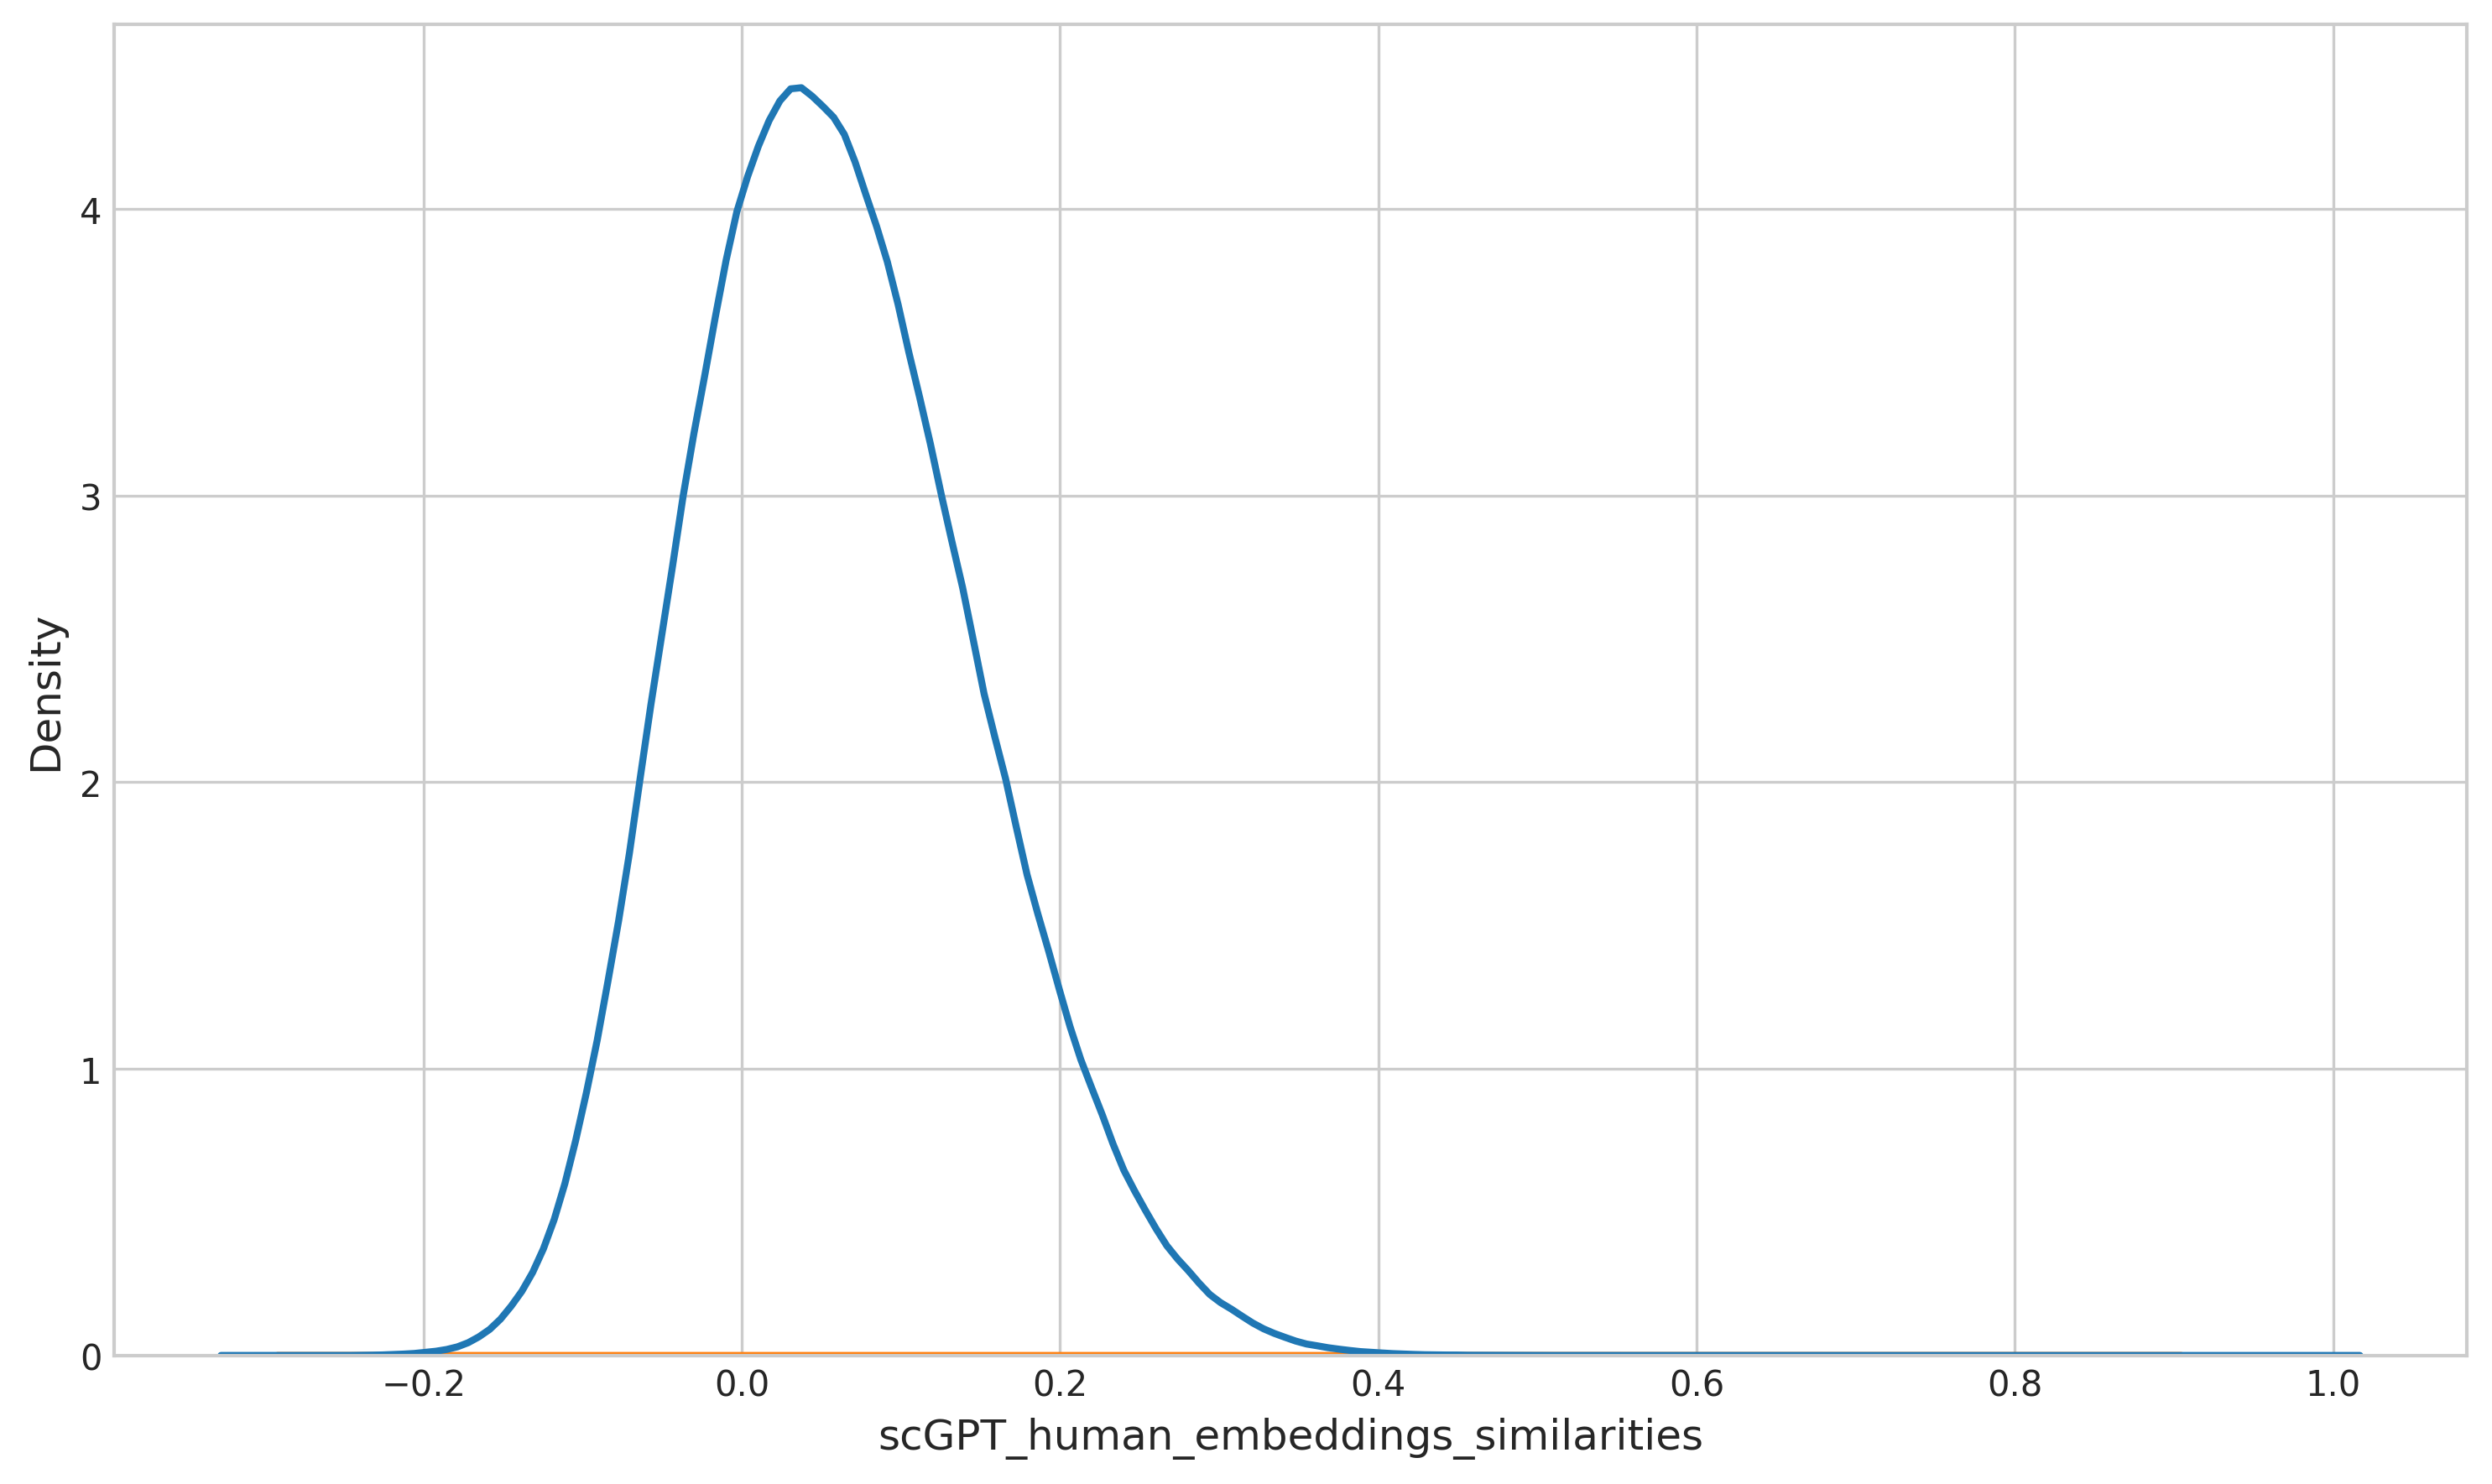

label = 0, random
0.1746146800469039
label = 1, complex
0.15895736122419962
label = 0, random
0.1747482116927868
label = 1, complex
0.15019246538184464


/tmp/ipykernel_4668/2903716199.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


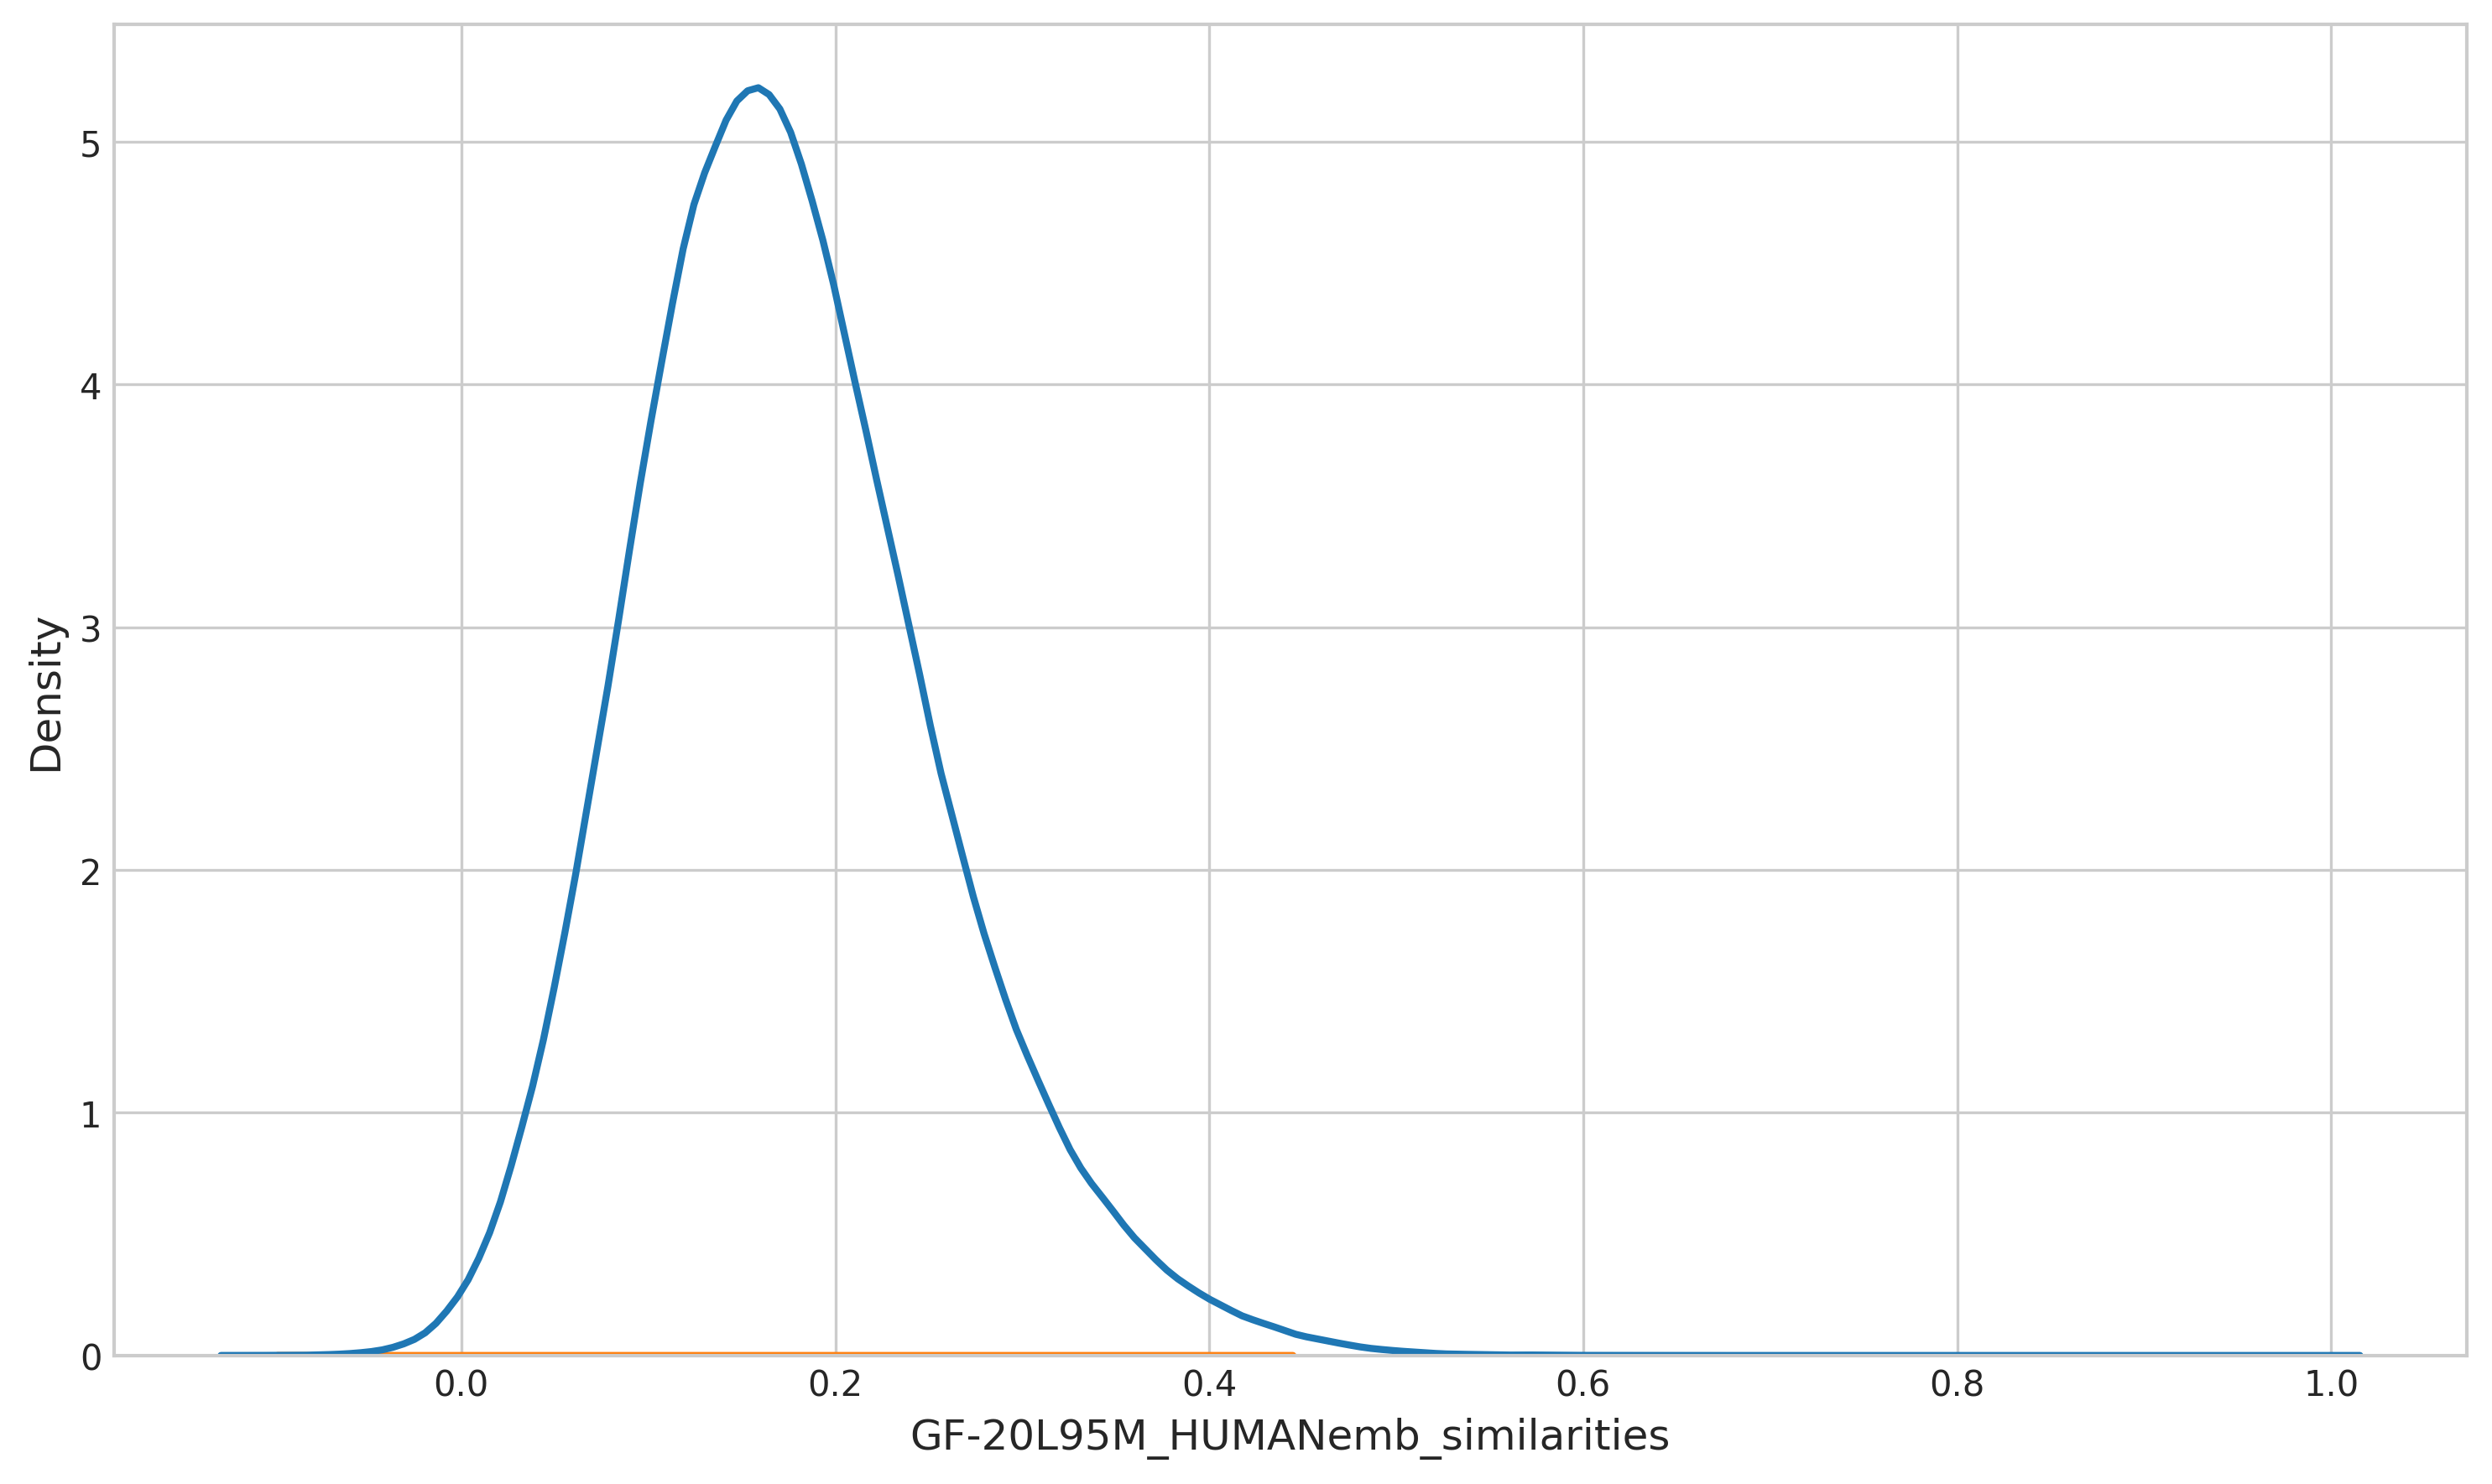

label = 0, random
0.2675948554533882
label = 1, complex
0.264330551349924
label = 0, random
0.2674964203555958
label = 1, complex
0.2507447371909242


/tmp/ipykernel_4668/2903716199.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


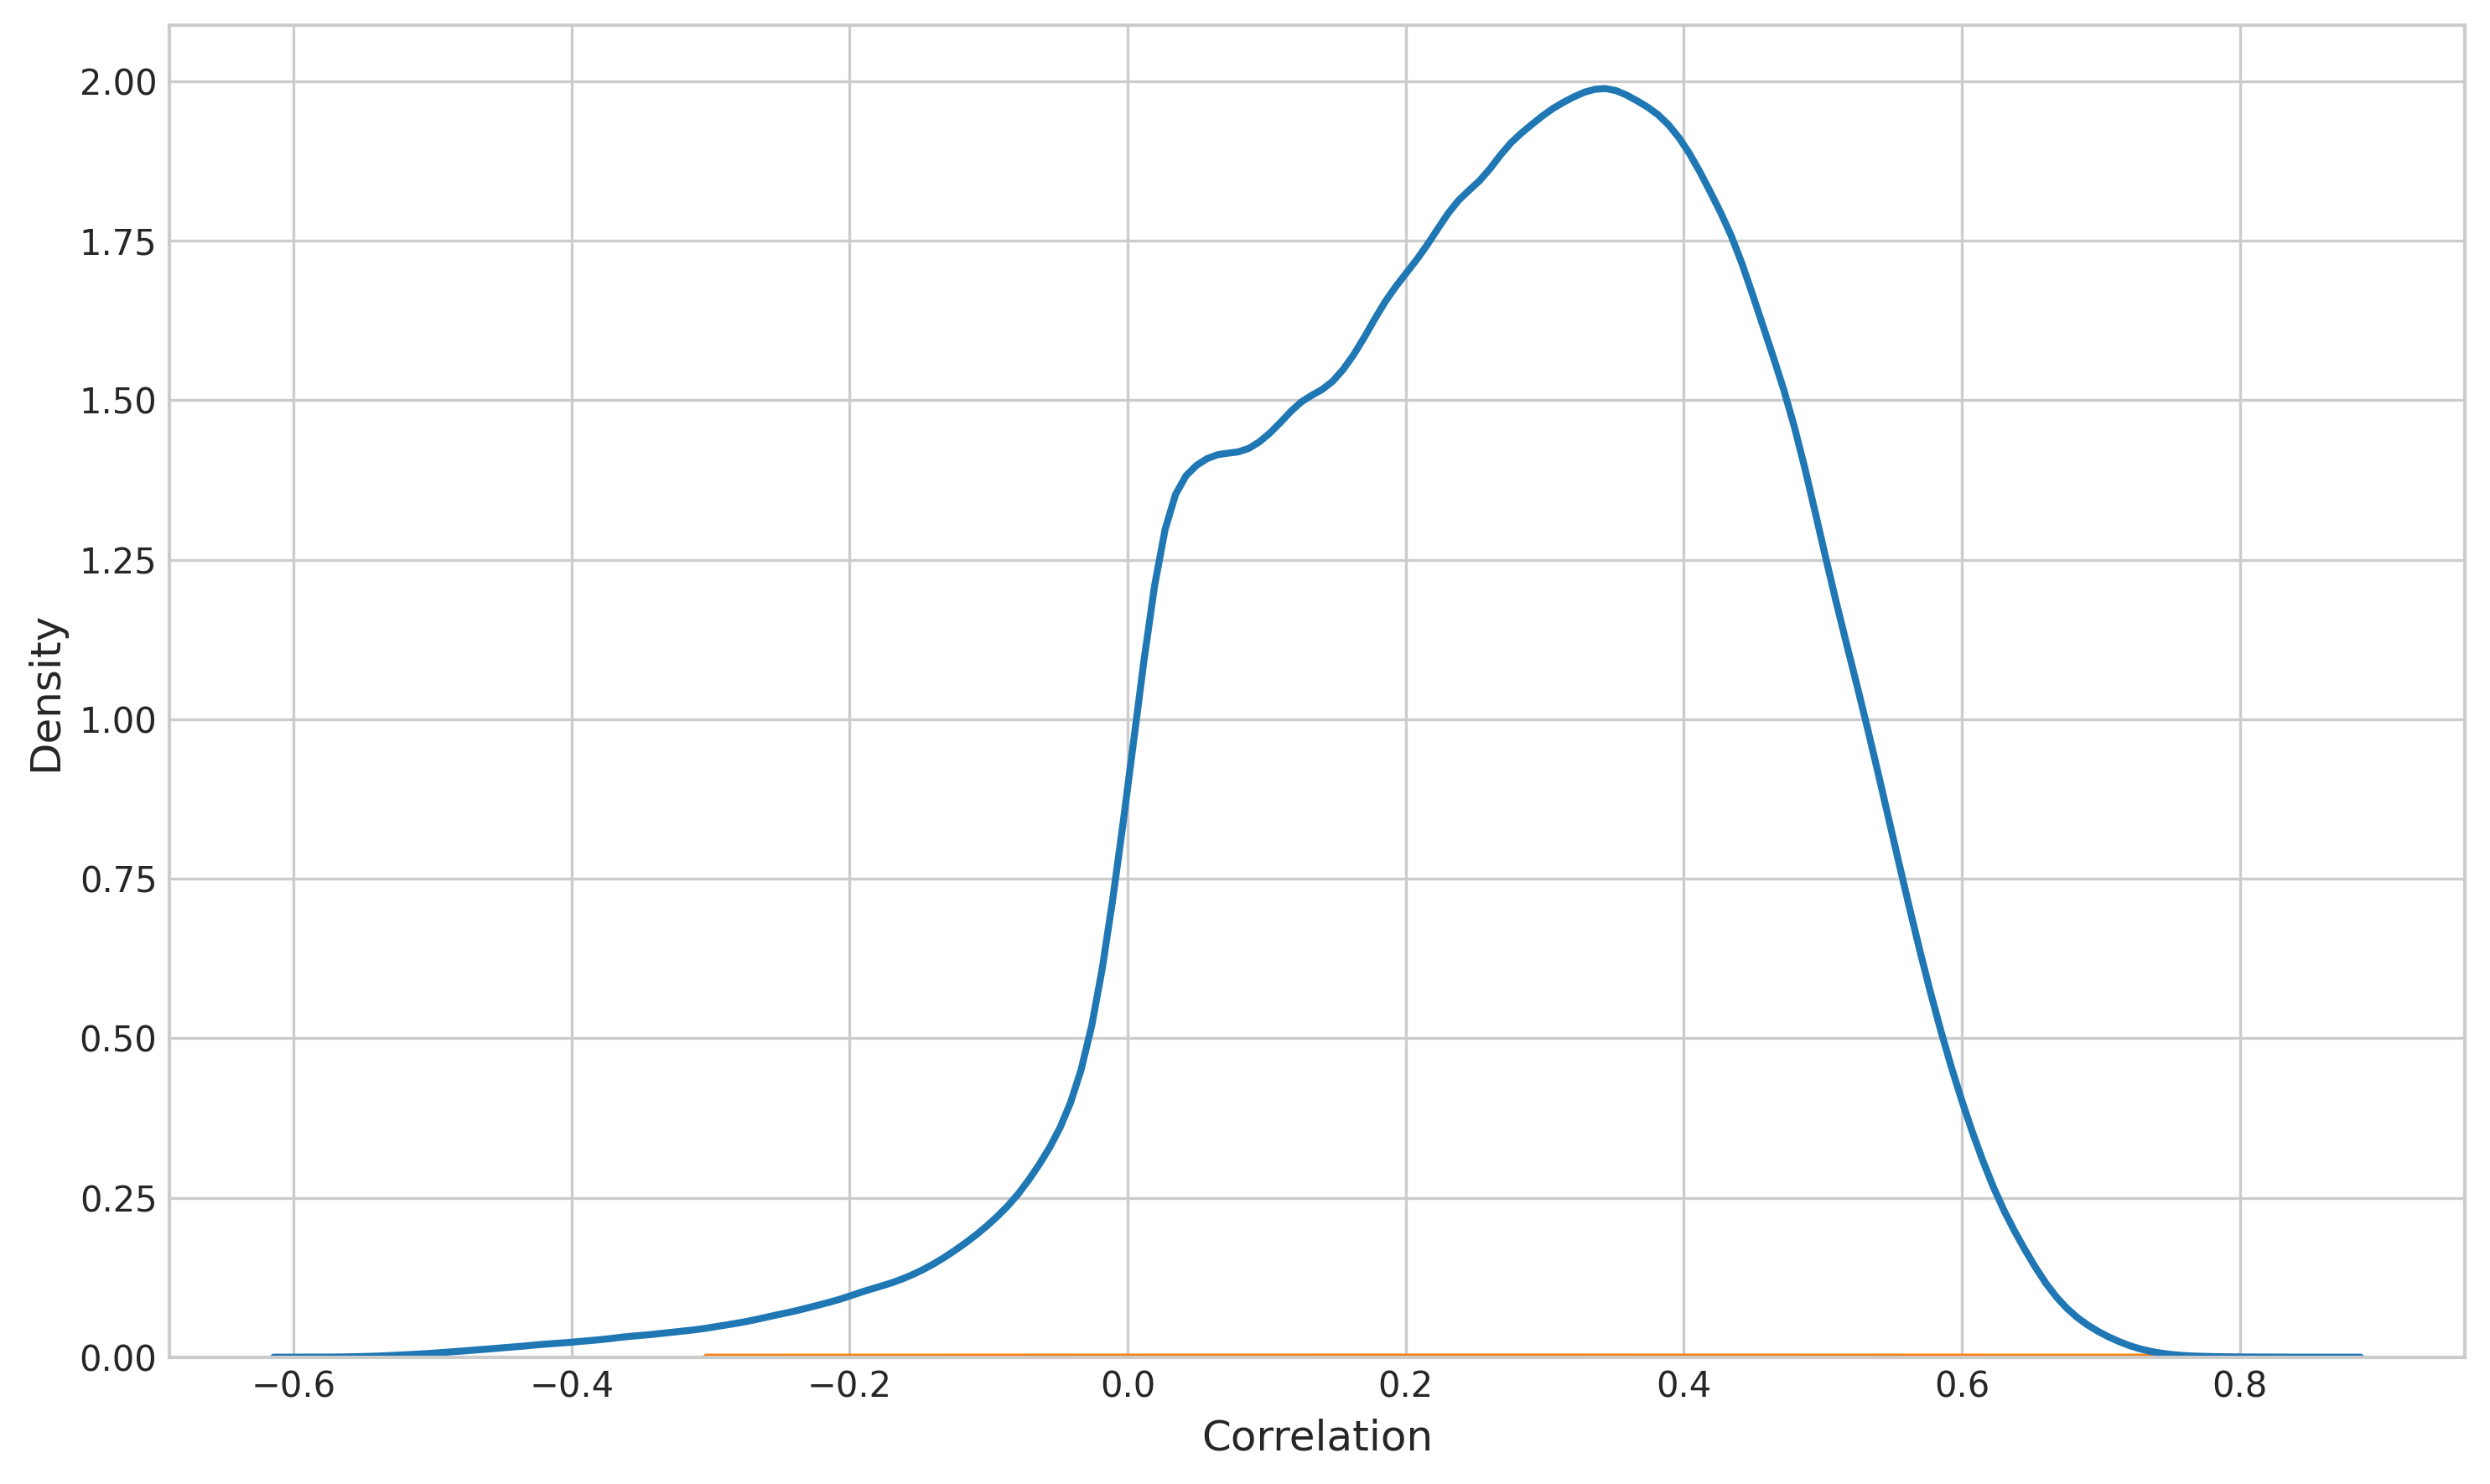

In [17]:
cols = ['scGPT_human_embeddings_similarities', 'GF-20L95M_HUMANemb_similarities', 'Correlation']

for c in cols:
    plot_kernel_density(X_full, column = c, output = f'/home/ubuntu/full_{c}_kde.png')

label = 0, random
0.05856932313914309
label = 1, complex
0.22931070649060462
label = 0, random
0.05884682125876112
label = 1, complex
0.22931070649060462


/tmp/ipykernel_4668/3423887938.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


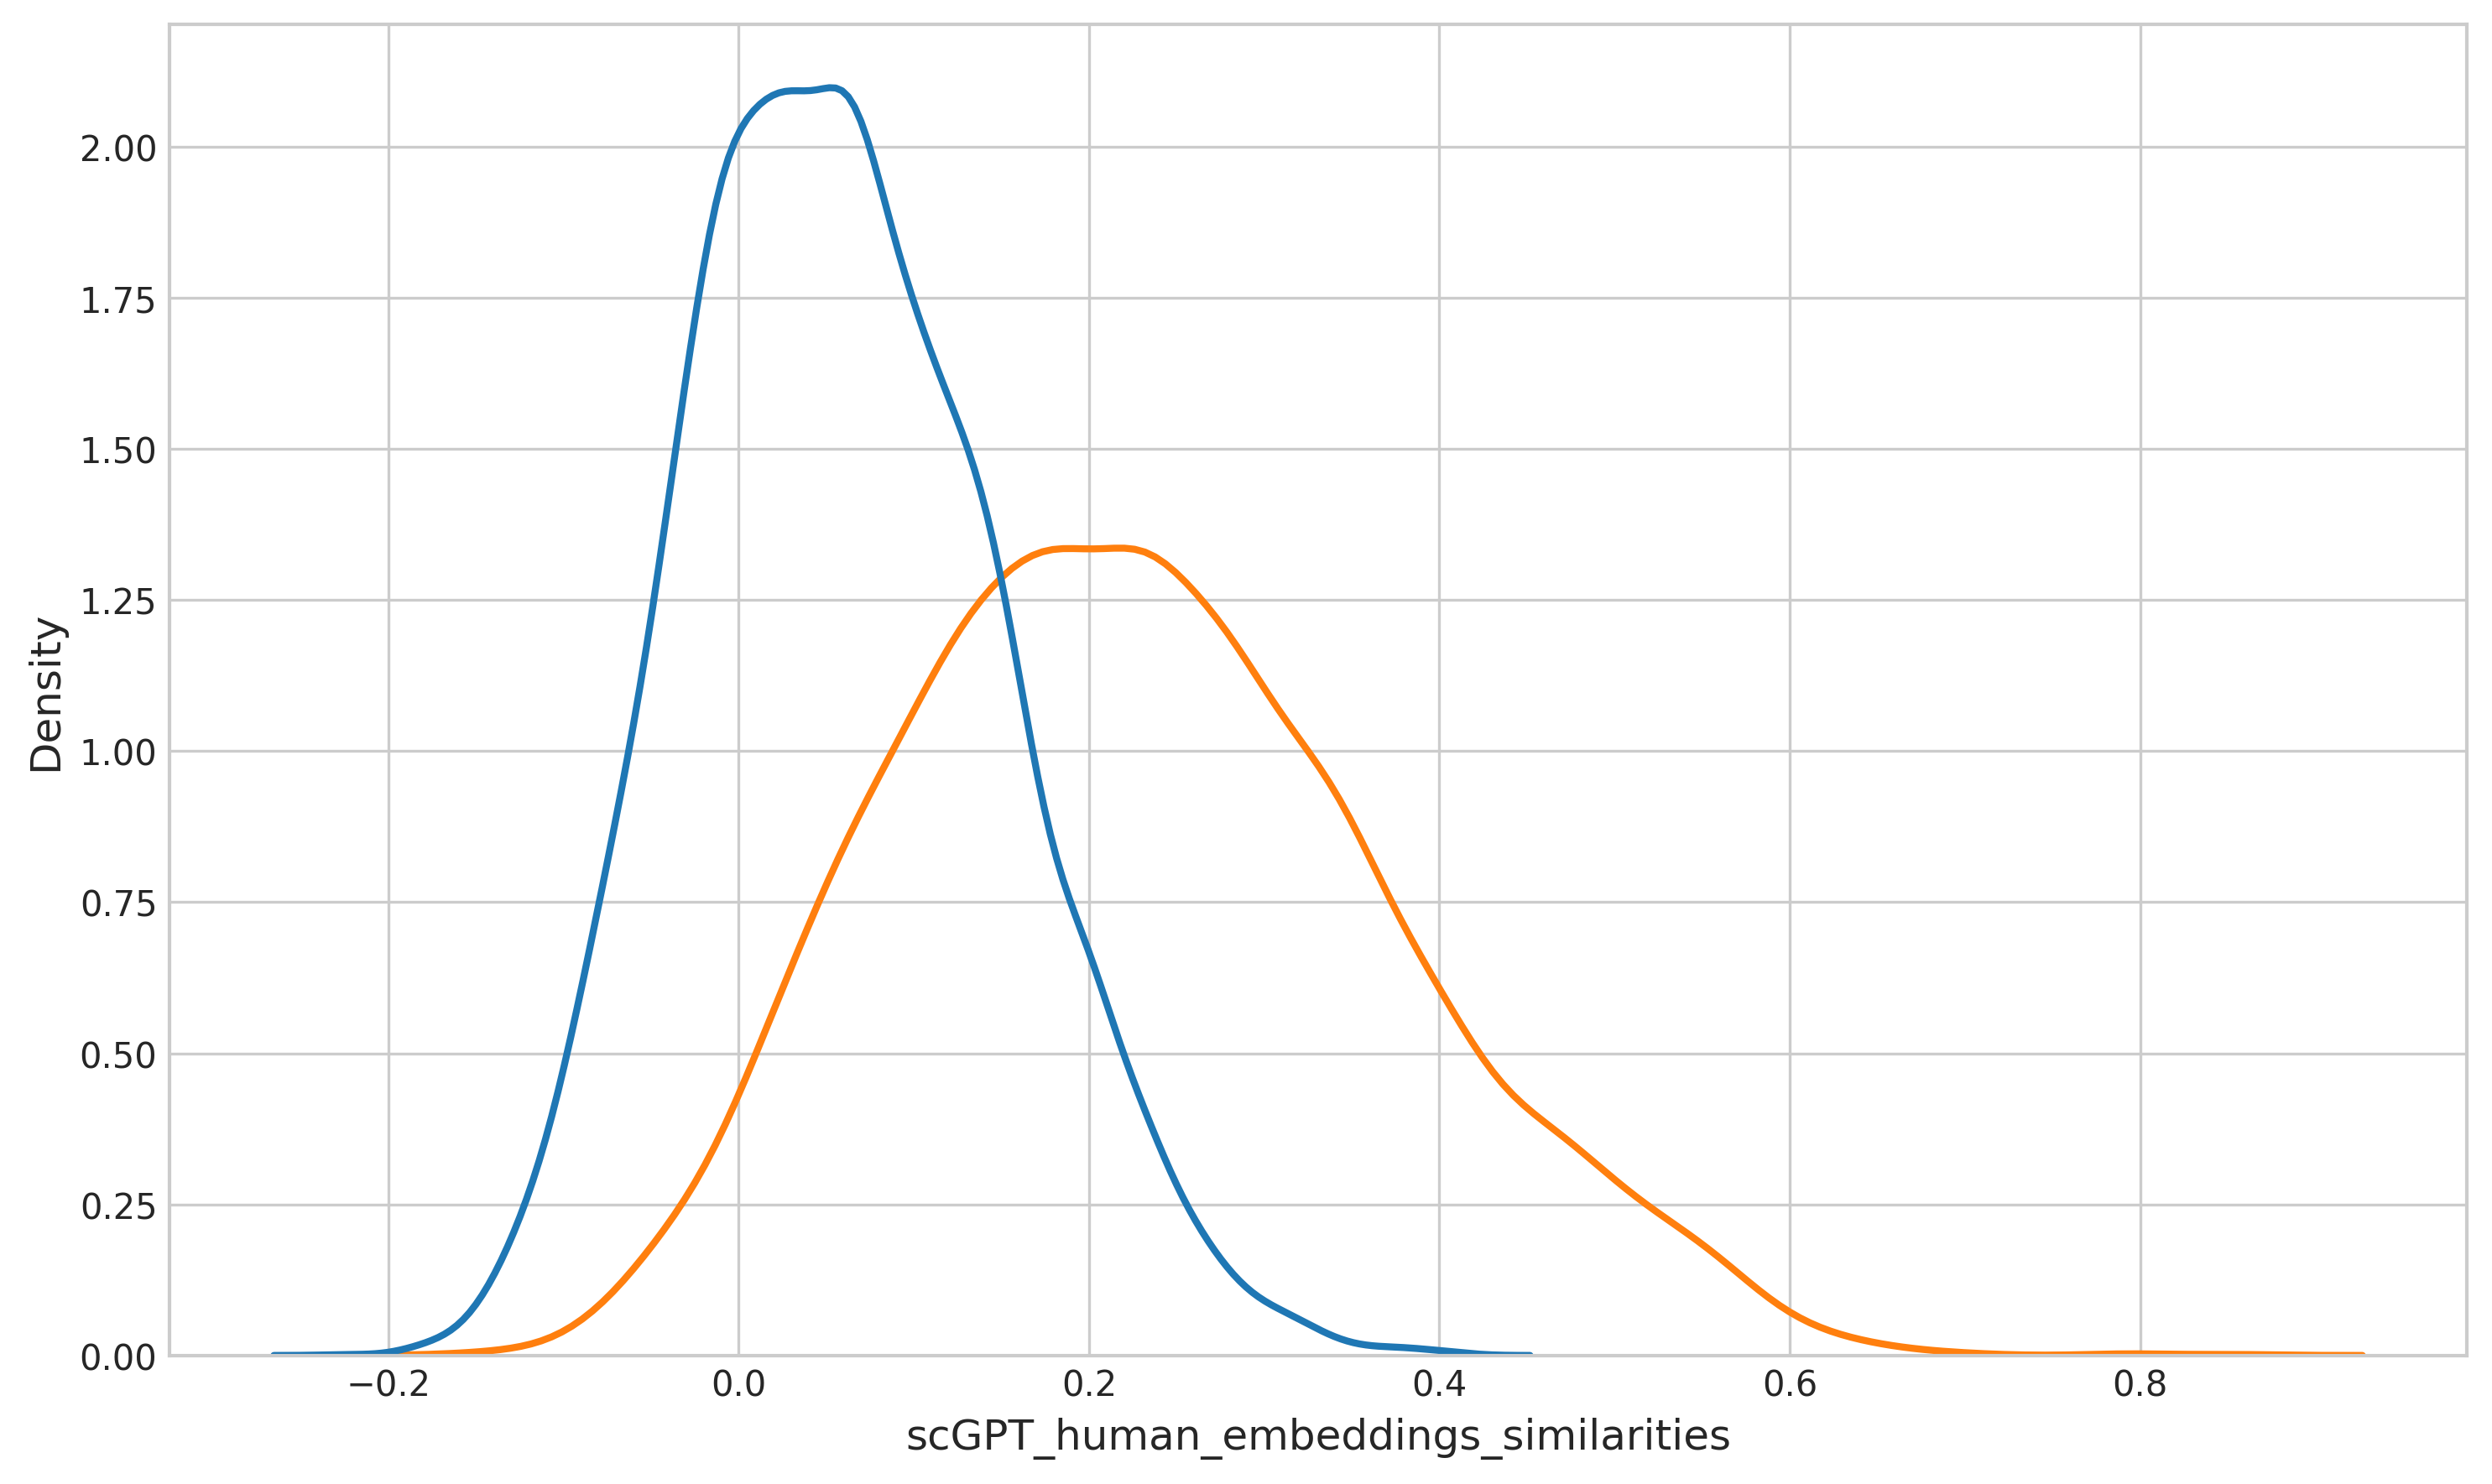

label = 0, random
0.1746131750017477
label = 1, complex
0.1533715308930392
label = 0, random
0.17257052595020622
label = 1, complex
0.1533715308930392


/tmp/ipykernel_4668/3423887938.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


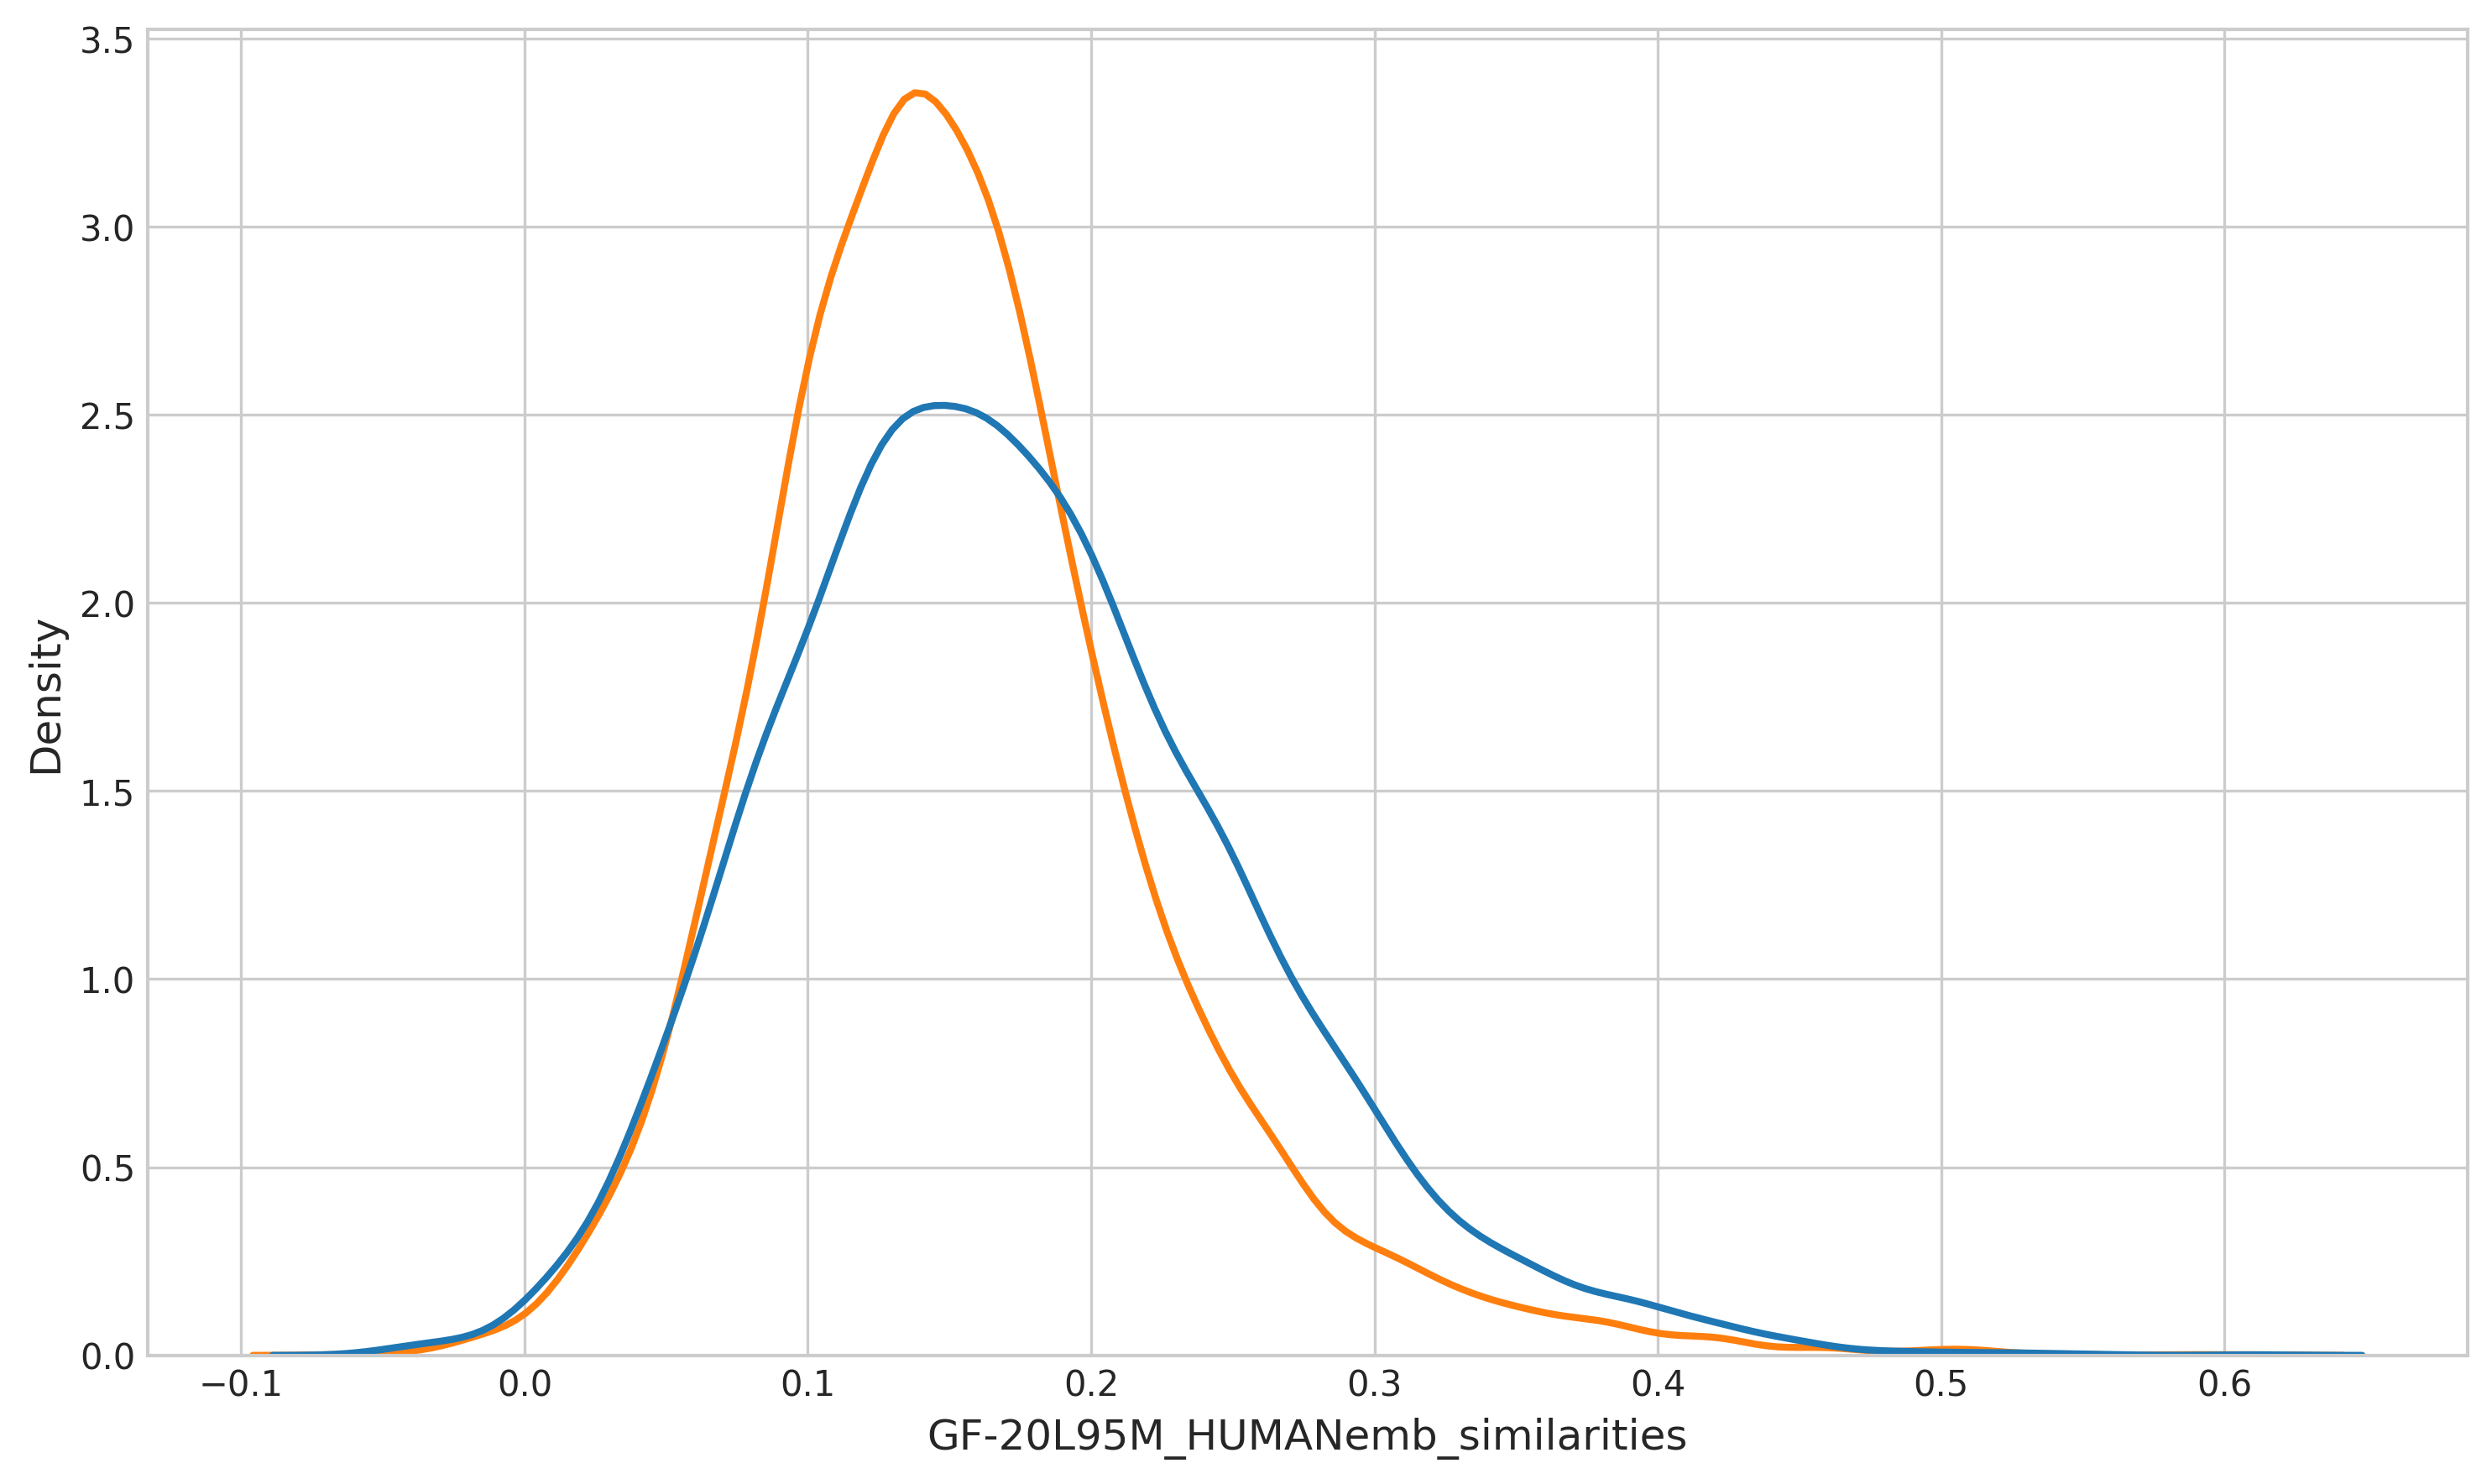

label = 0, random
0.26759486187085196
label = 1, complex
0.26416068810850224
label = 0, random
0.2703429708388789
label = 1, complex
0.26416068810850224


/tmp/ipykernel_4668/3423887938.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


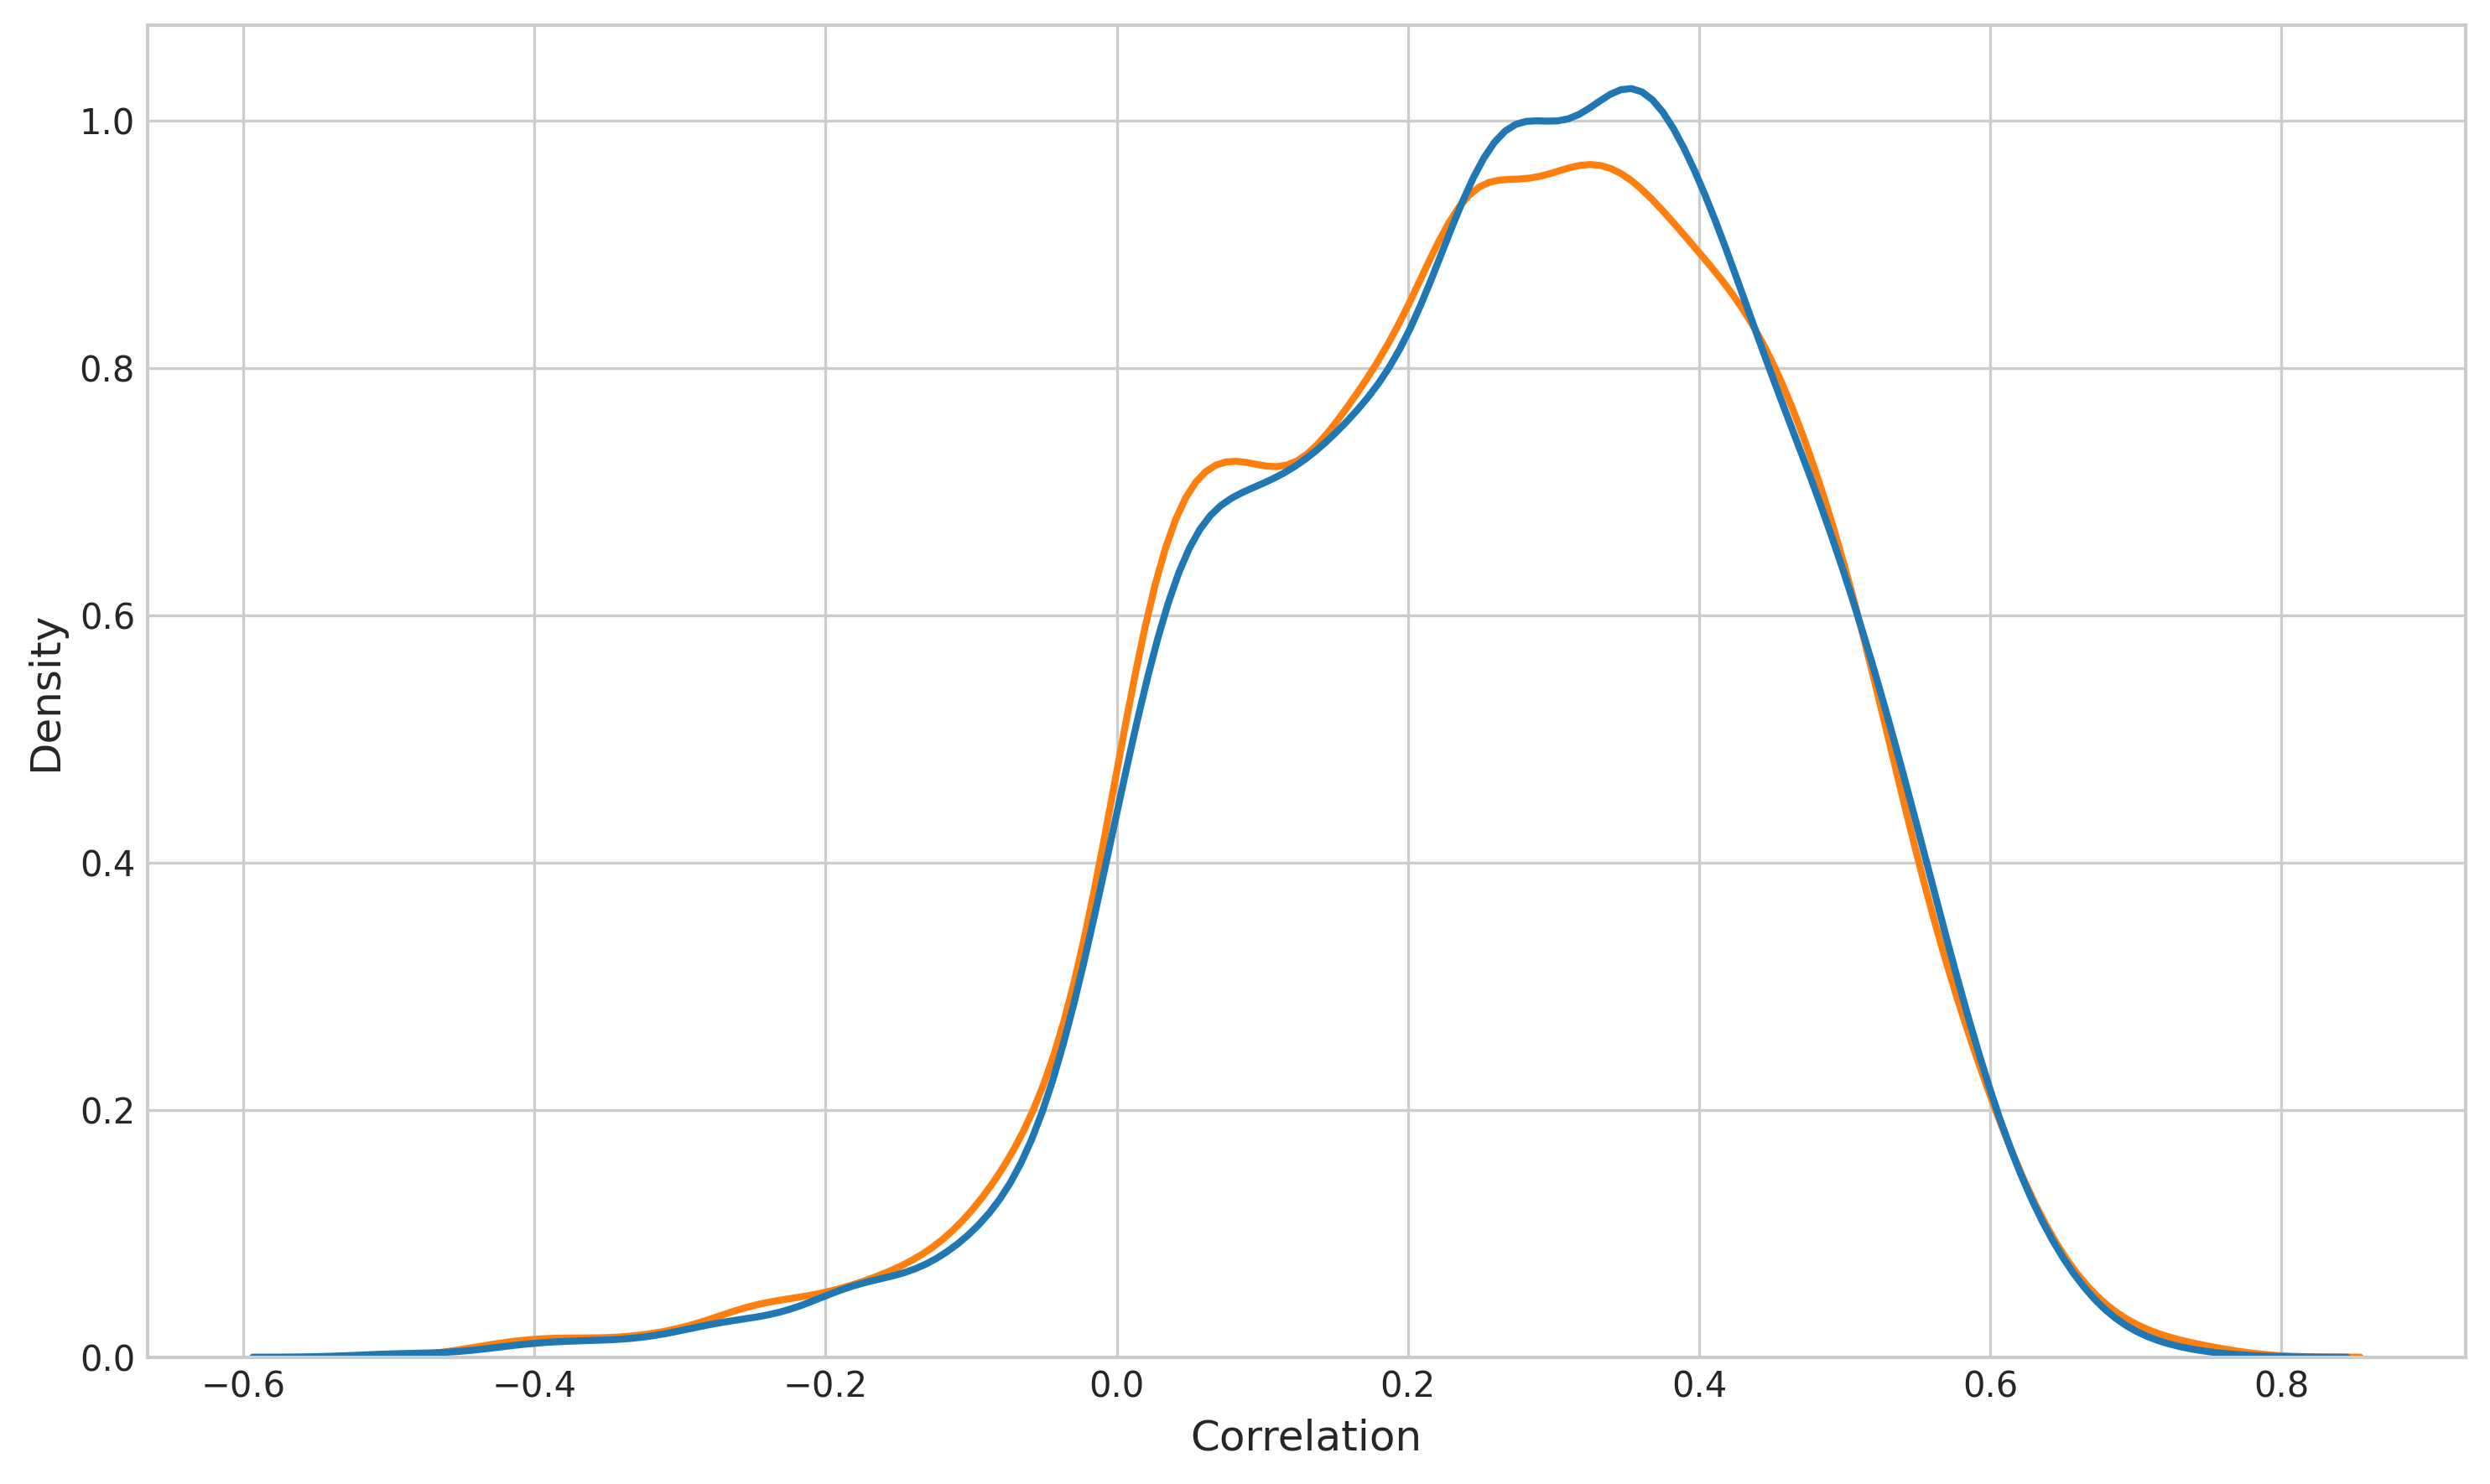

In [22]:
cols = ['scGPT_human_embeddings_similarities', 'GF-20L95M_HUMANemb_similarities', 'Correlation']

for c in cols:
    plot_kernel_density(X_full, column = c, output = f'/home/ubuntu/full_{c}_kde.png')

label = 0, random
0.07400649974818577
label = 1, complex
0.3454915836944685


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


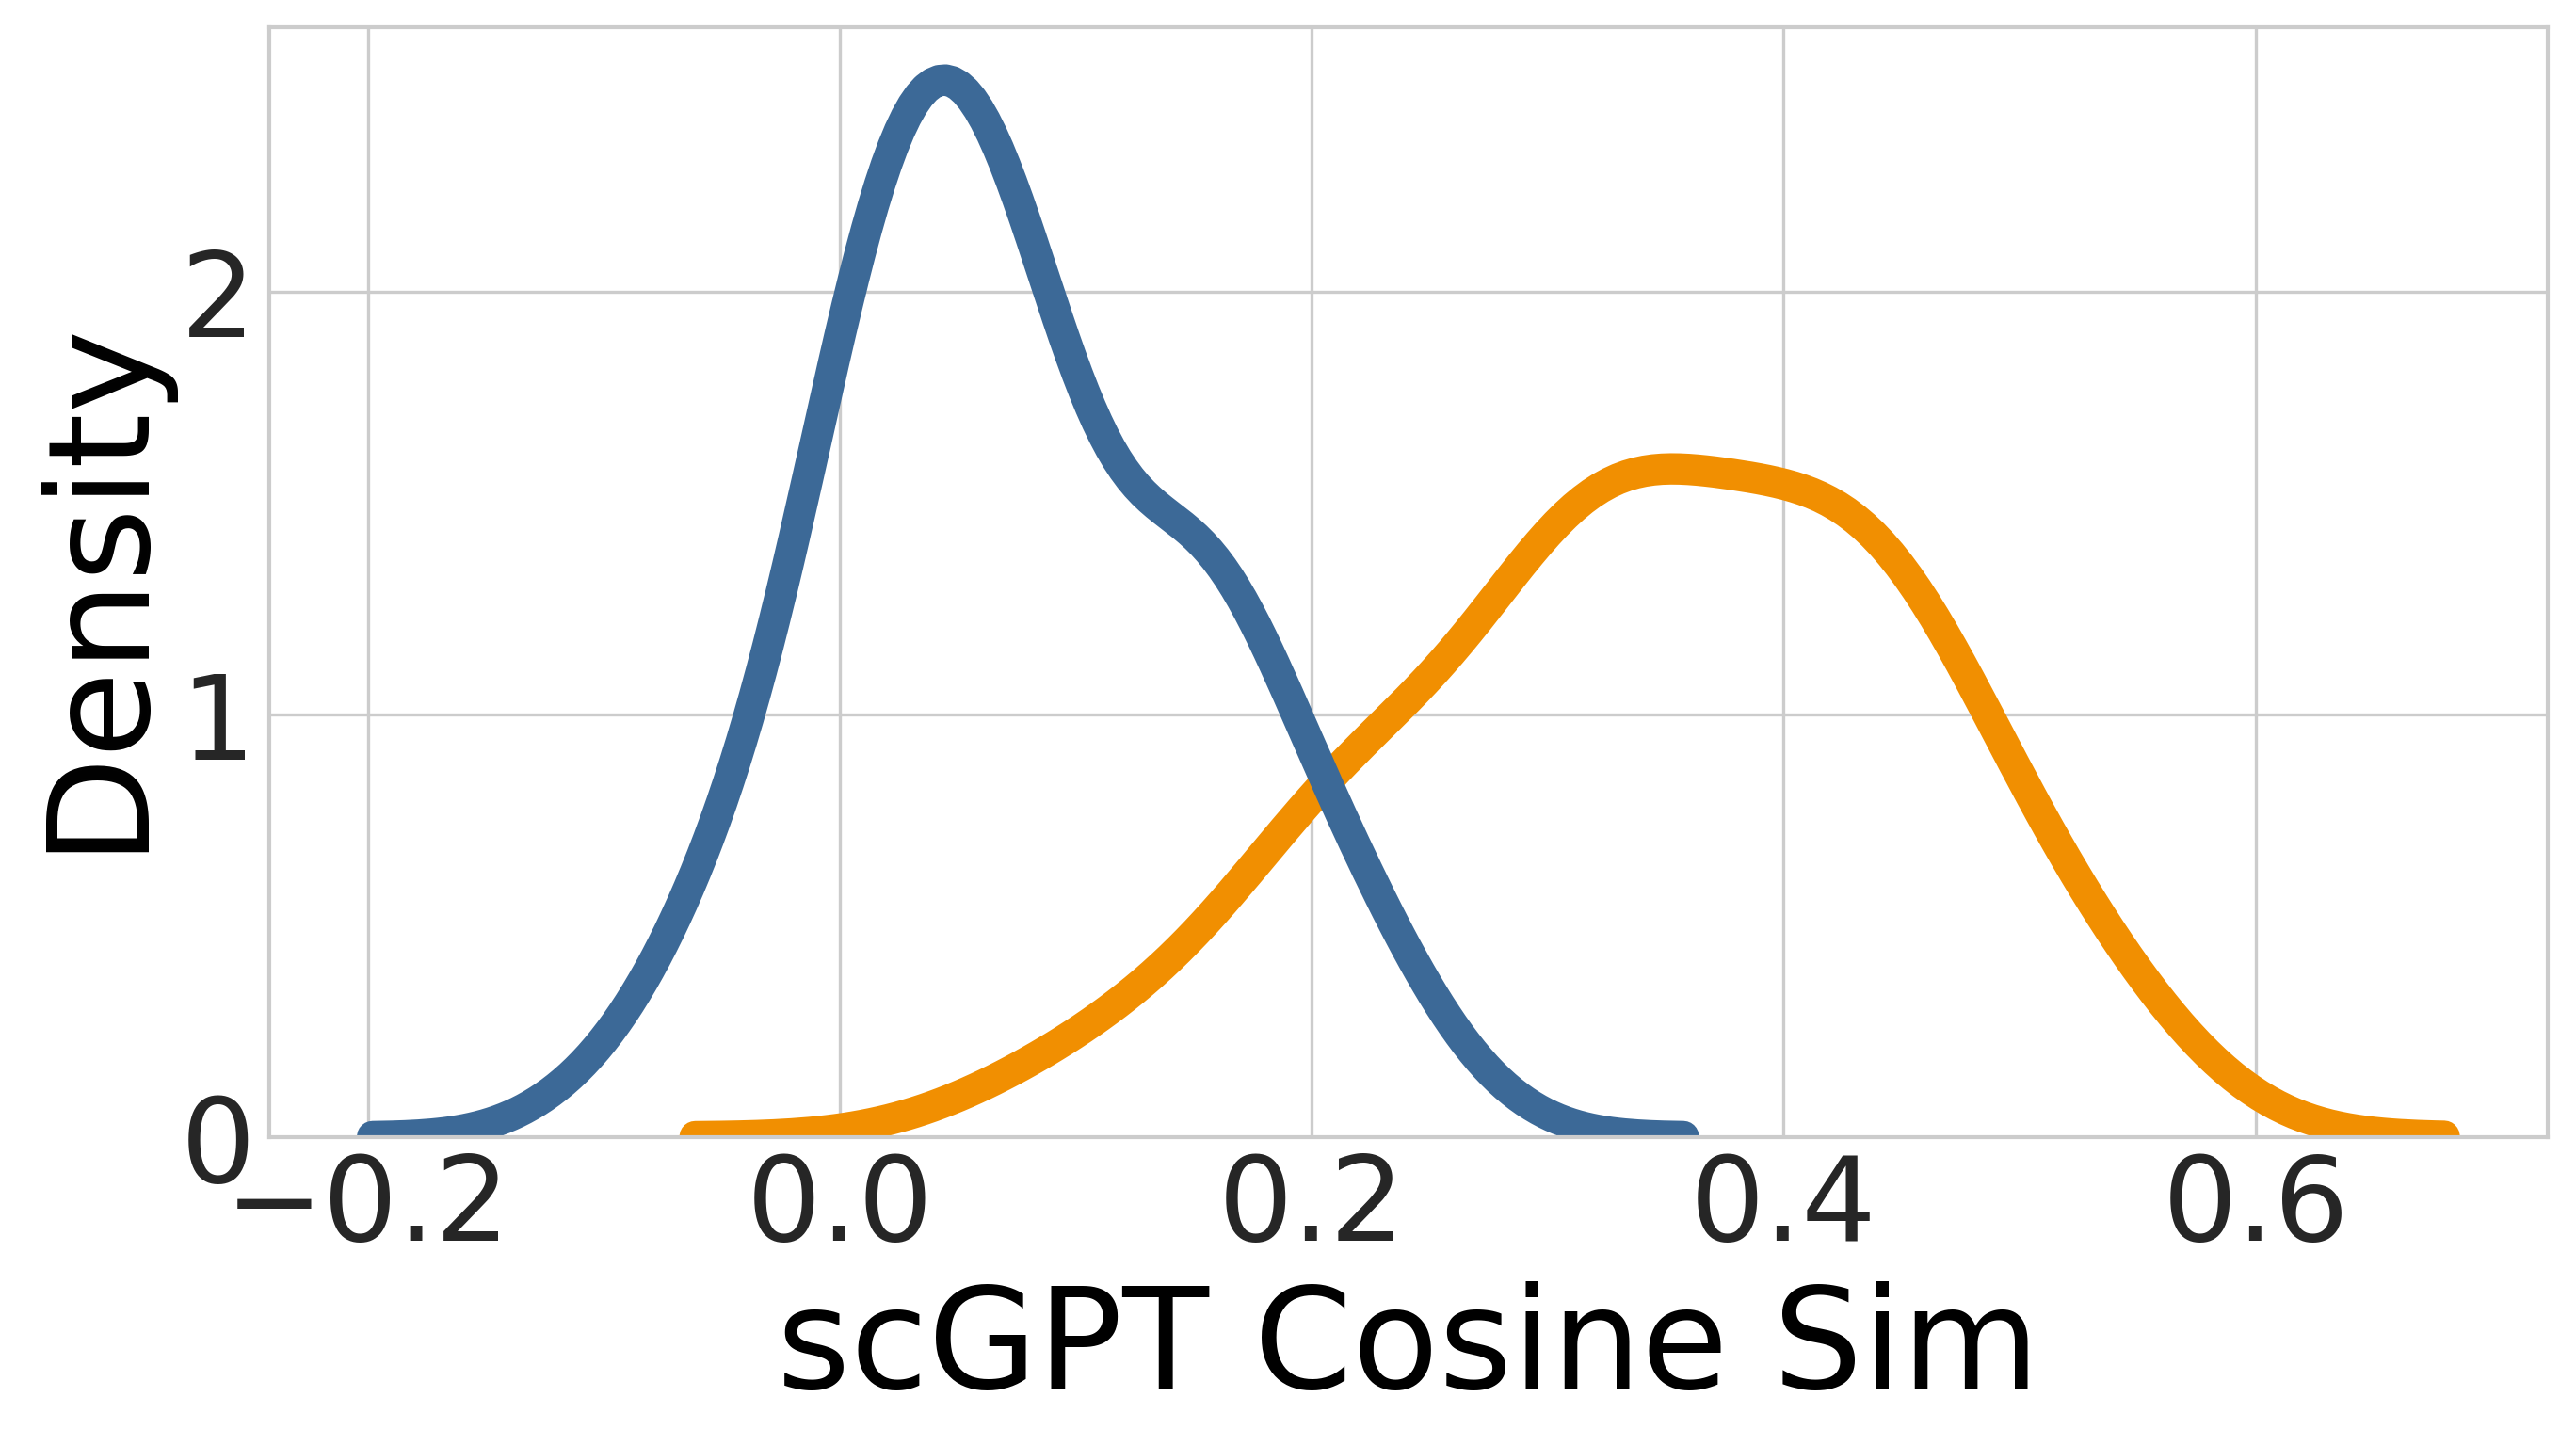

label = 0, random
0.17699804402642197
label = 1, complex
0.12589360489049456


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


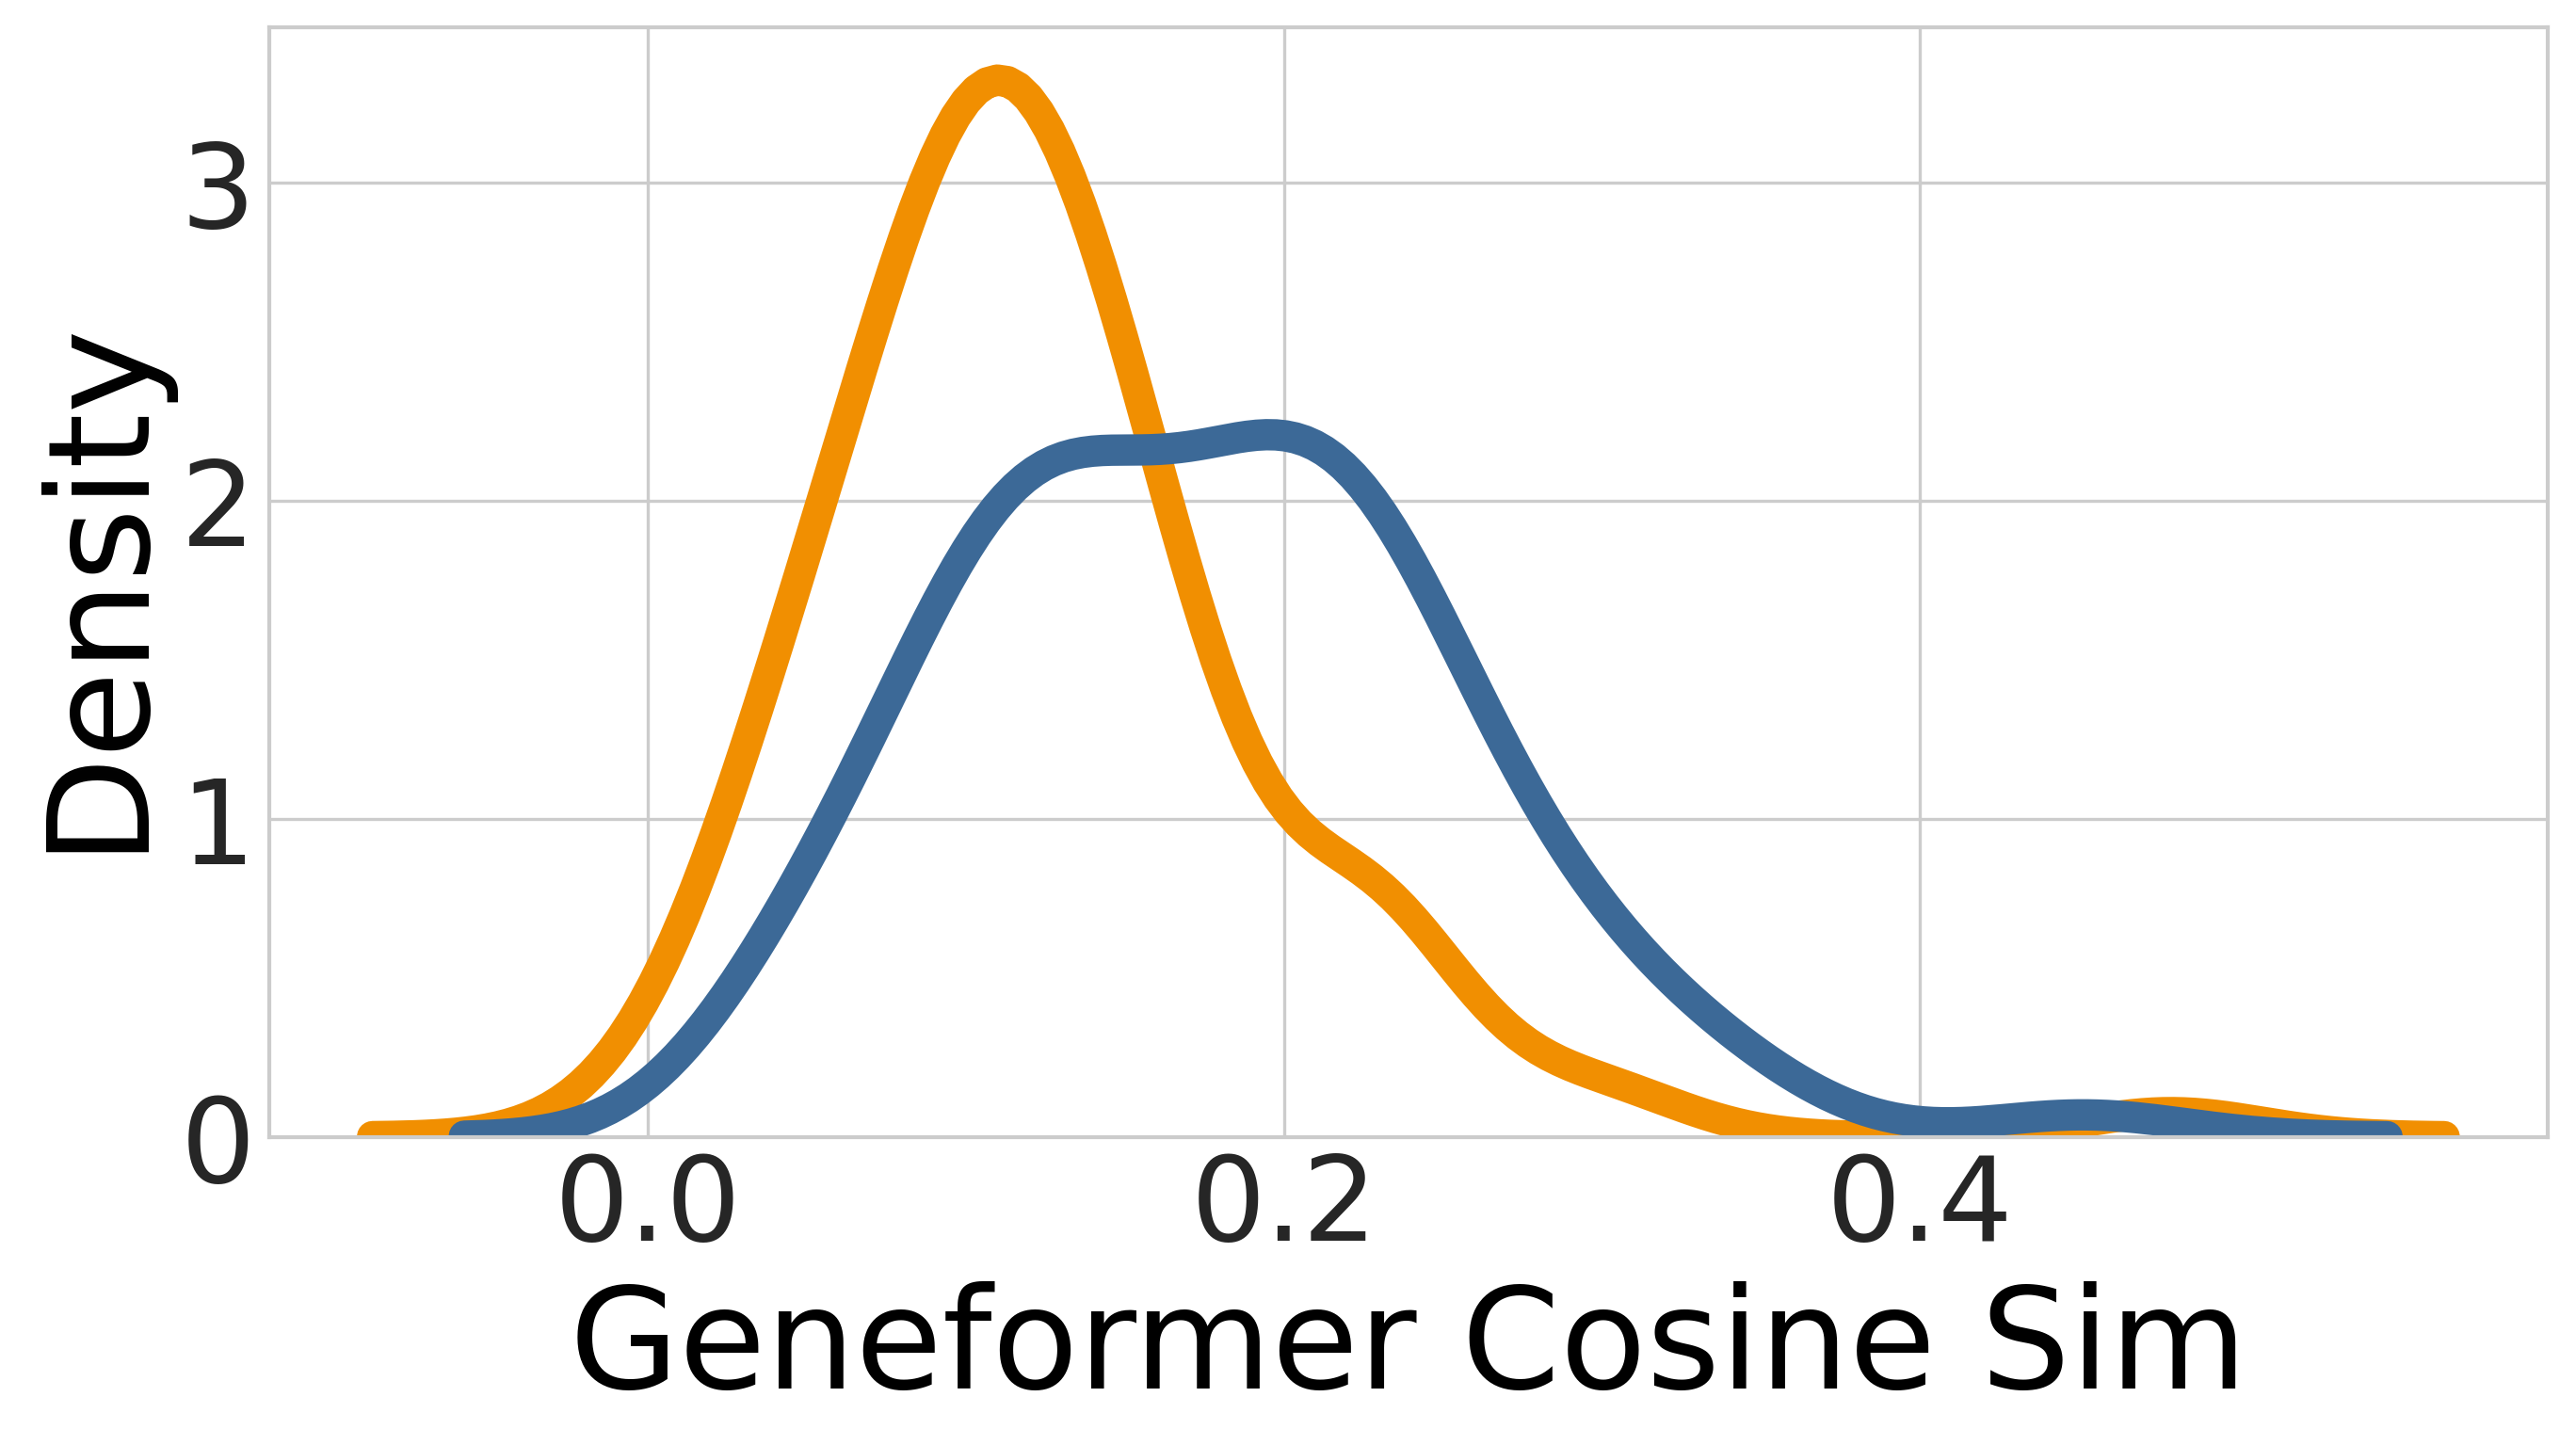

label = 0, random
0.24981863087639122
label = 1, complex
0.24726198430404894


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


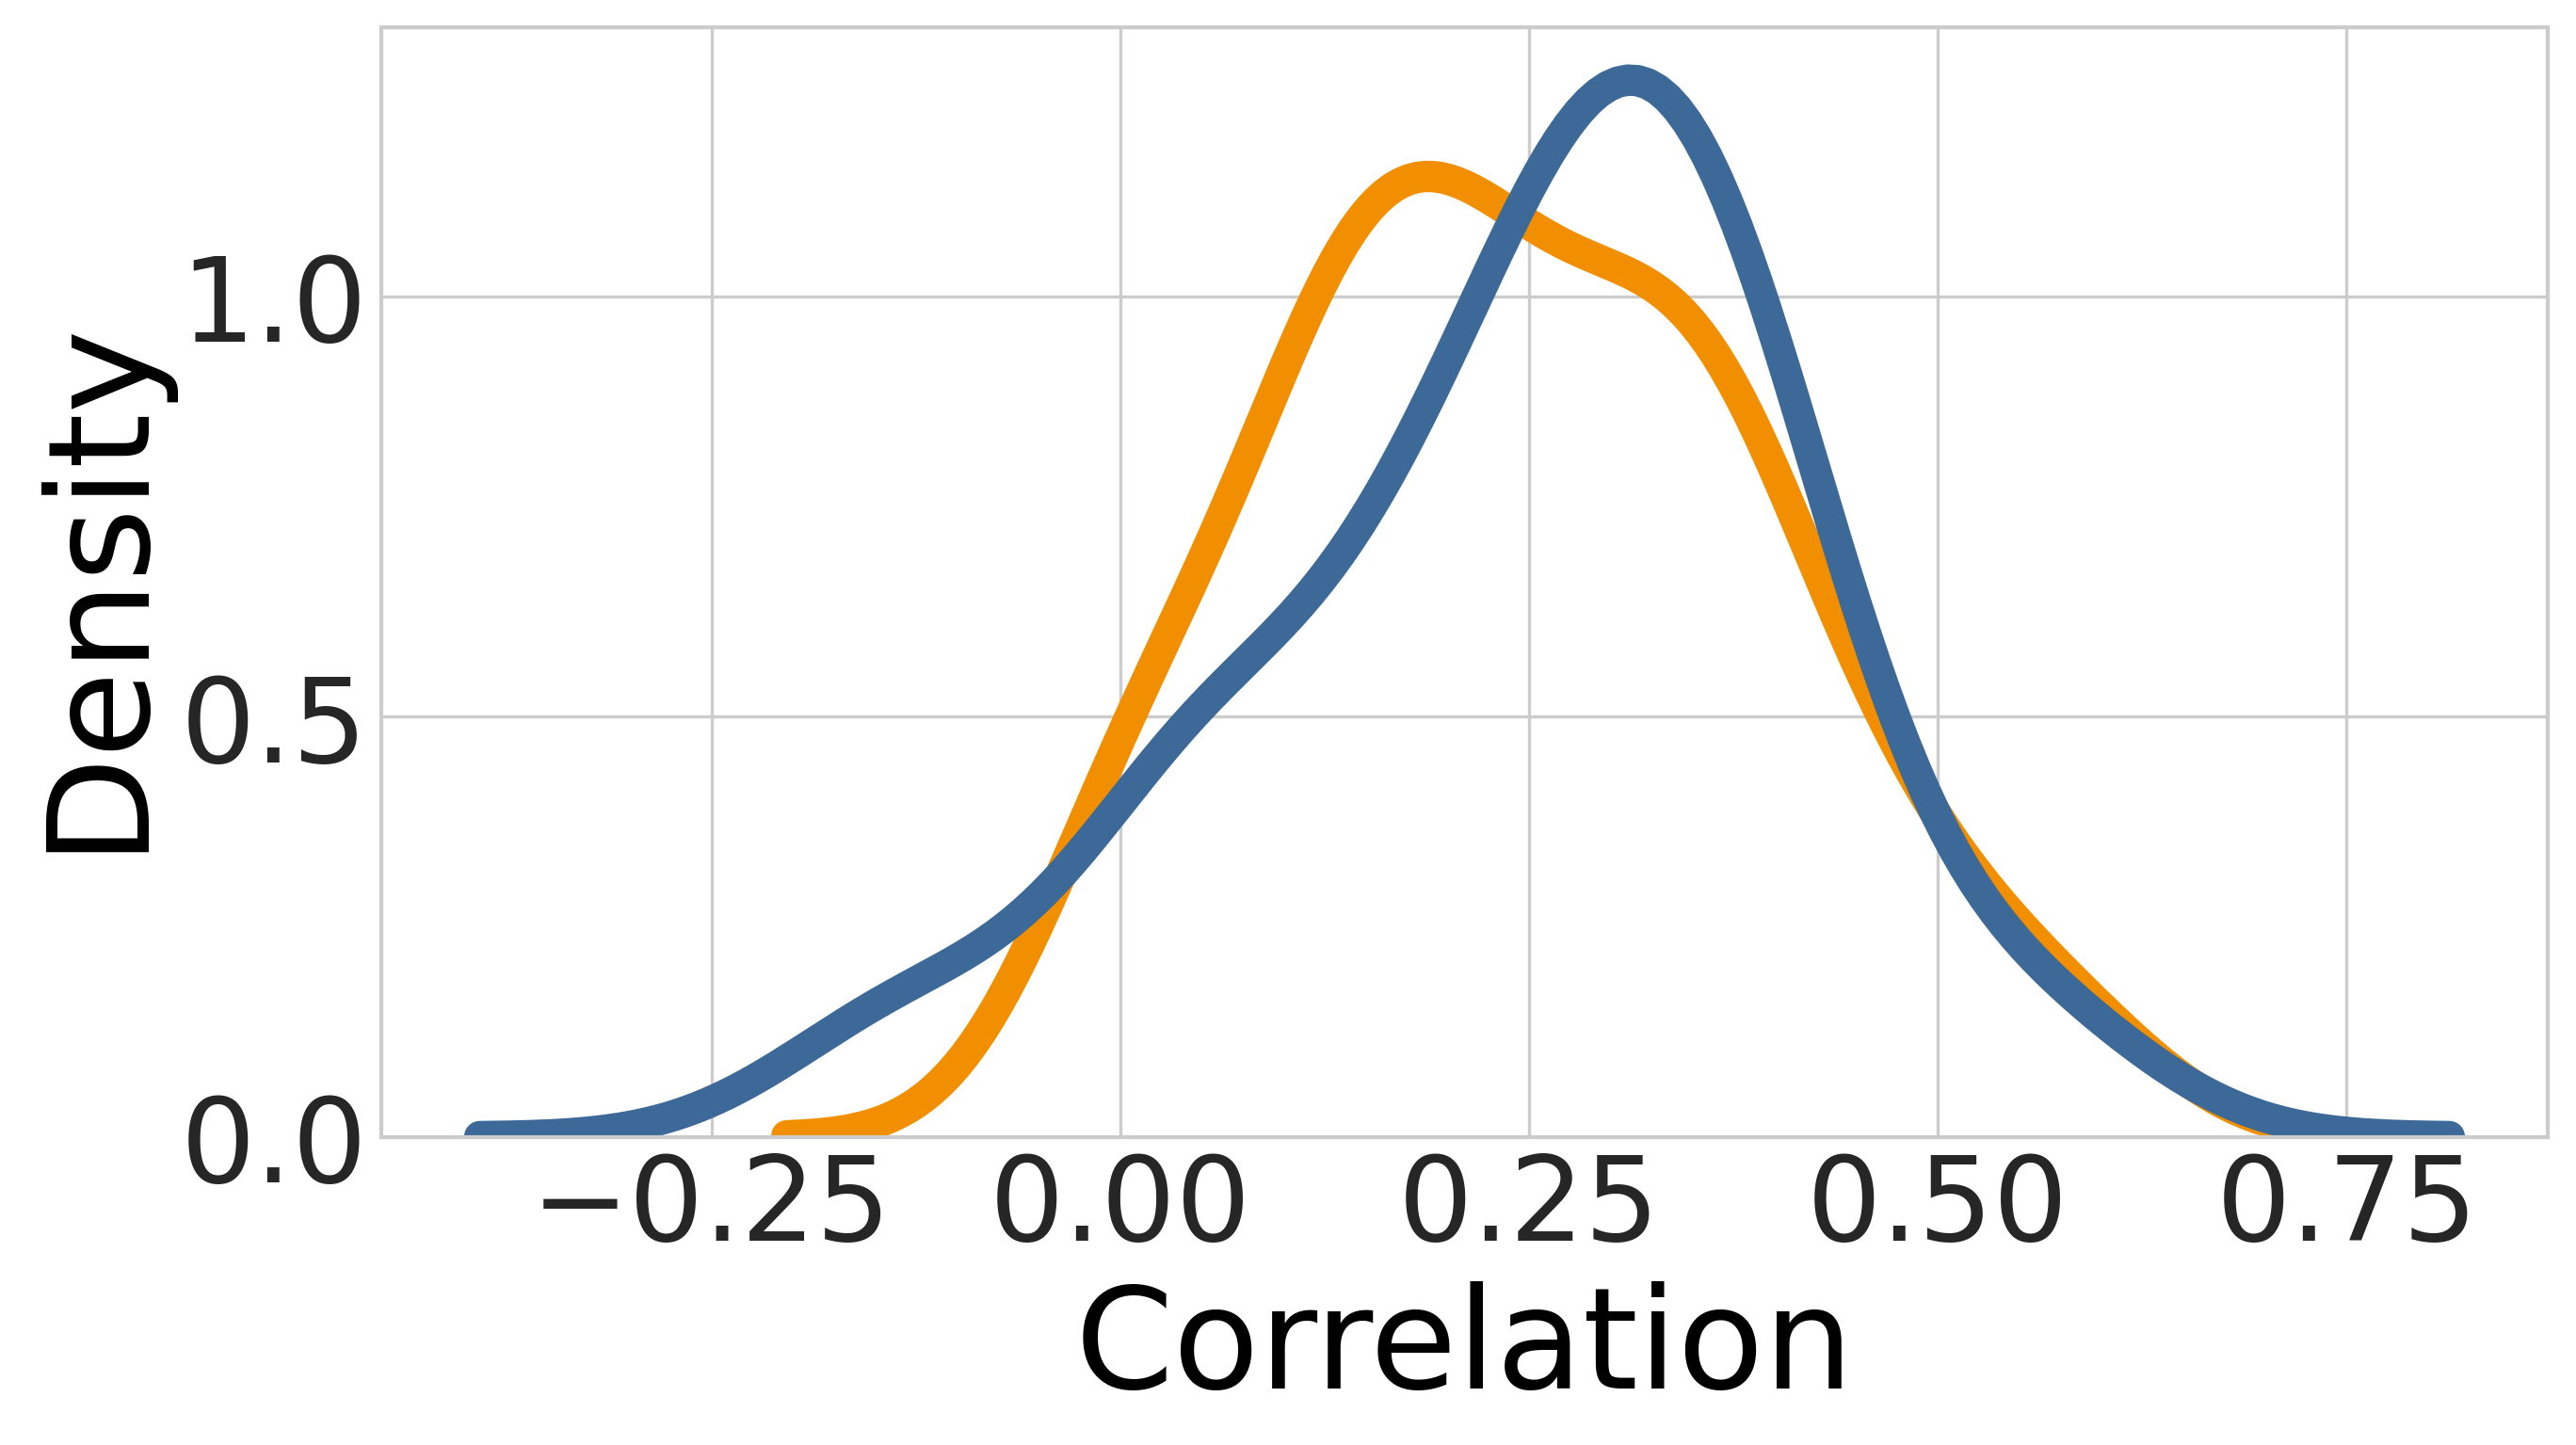

In [69]:
cols = ['scGPT Cosine Sim', 'Geneformer Cosine Sim', 'Correlation']

for c in cols:
    plot_kernel_density(psm20_labeled, column = c, output = f'/home/ubuntu/psm20_{c}_kde.png')

label = 0, random
0.049186106150348984
label = 1, complex
0.17036450629432995


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


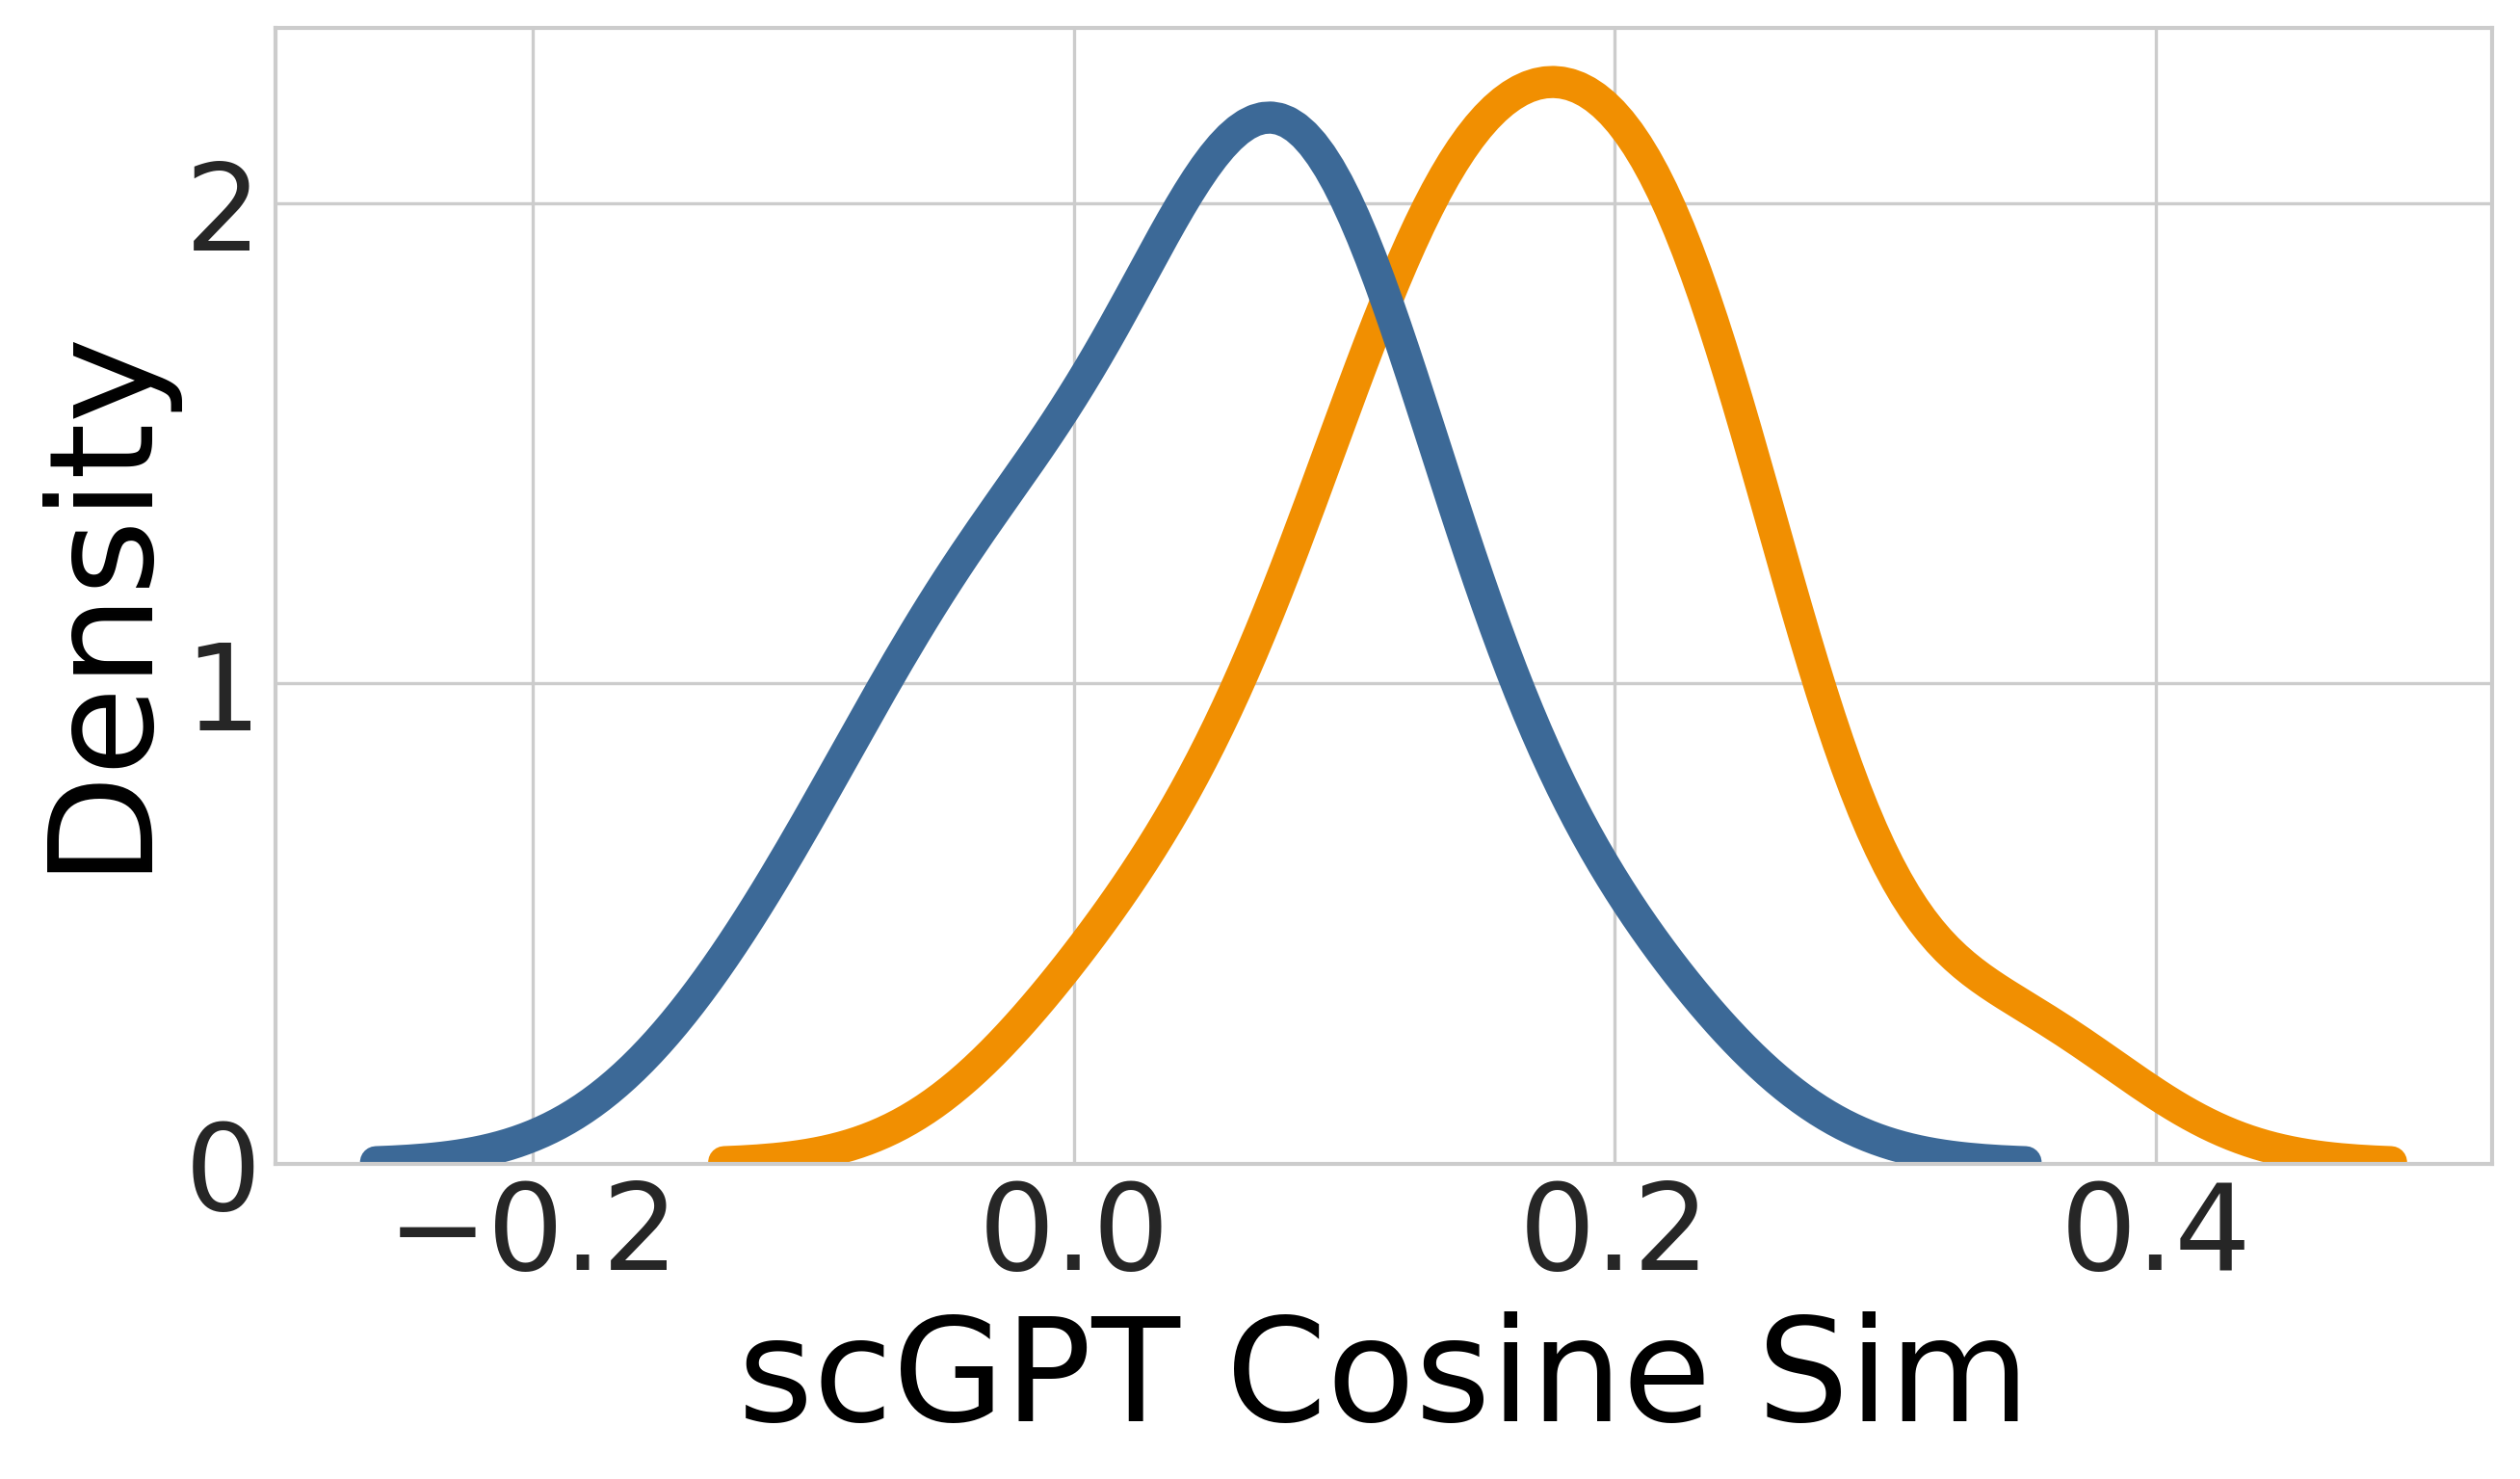

label = 0, random
0.17828232298294702
label = 1, complex
0.18302770107984542


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


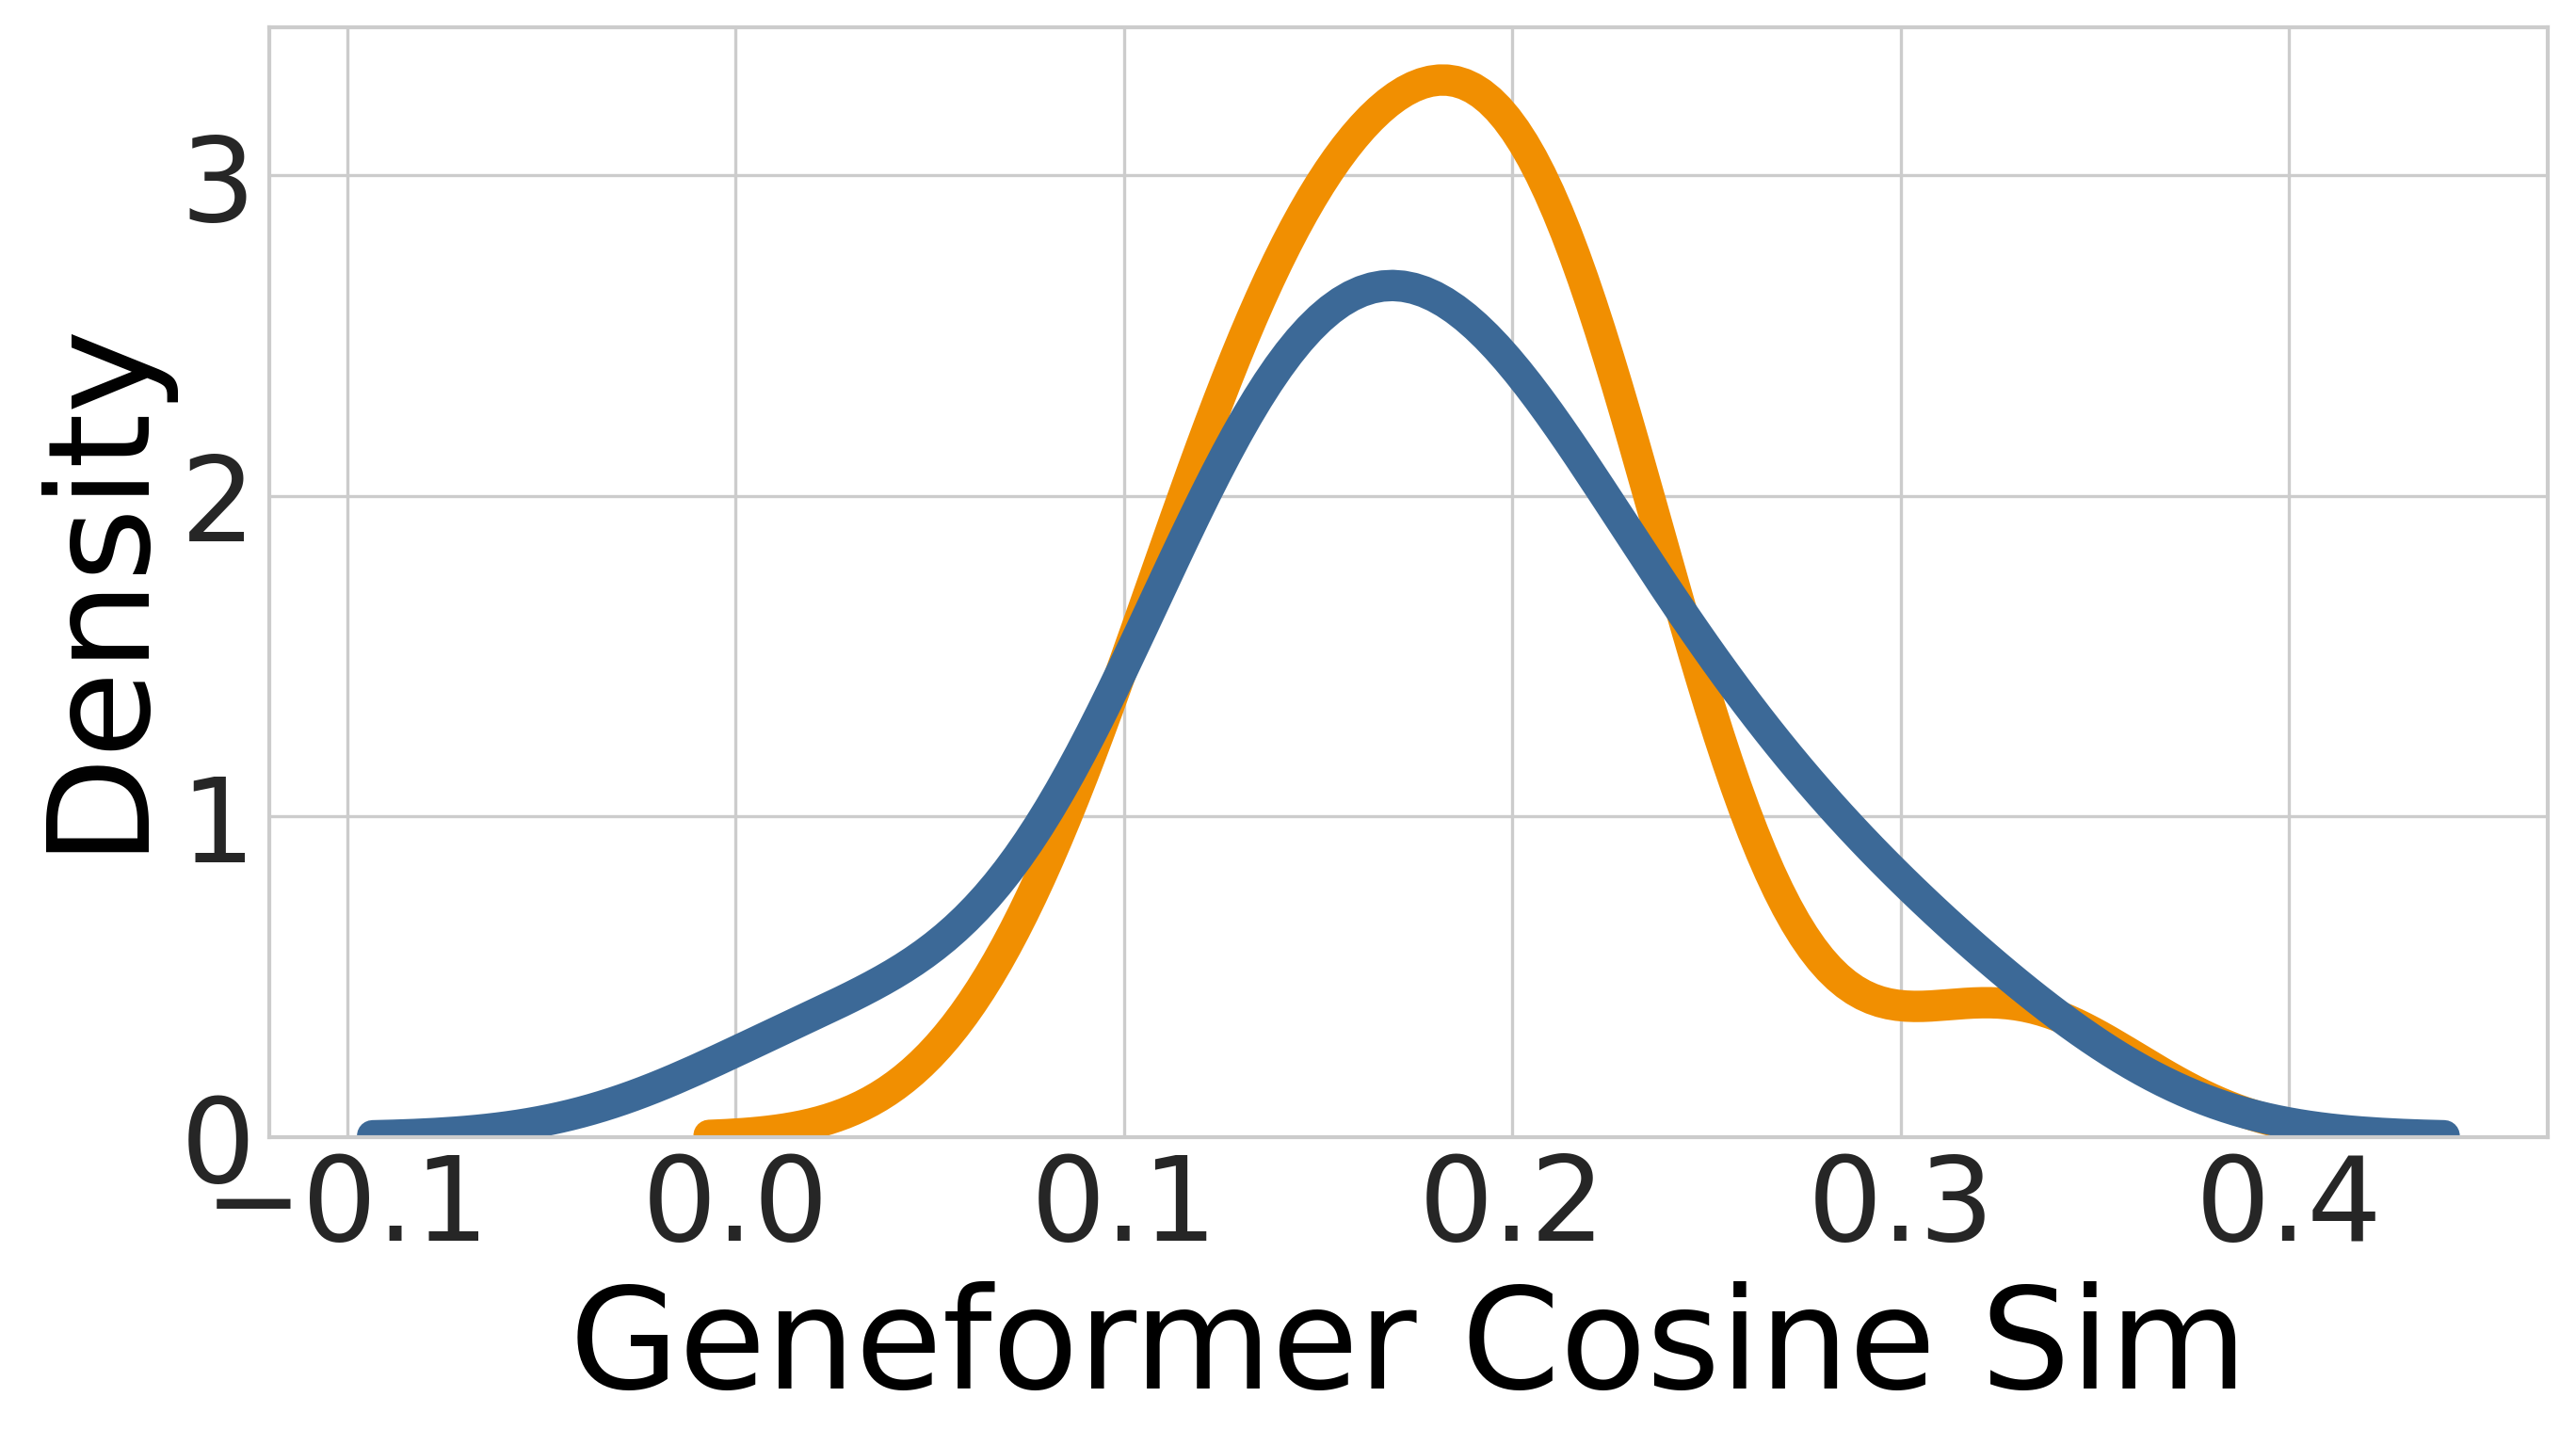

label = 0, random
0.20372066182534046
label = 1, complex
0.3157475510075441


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


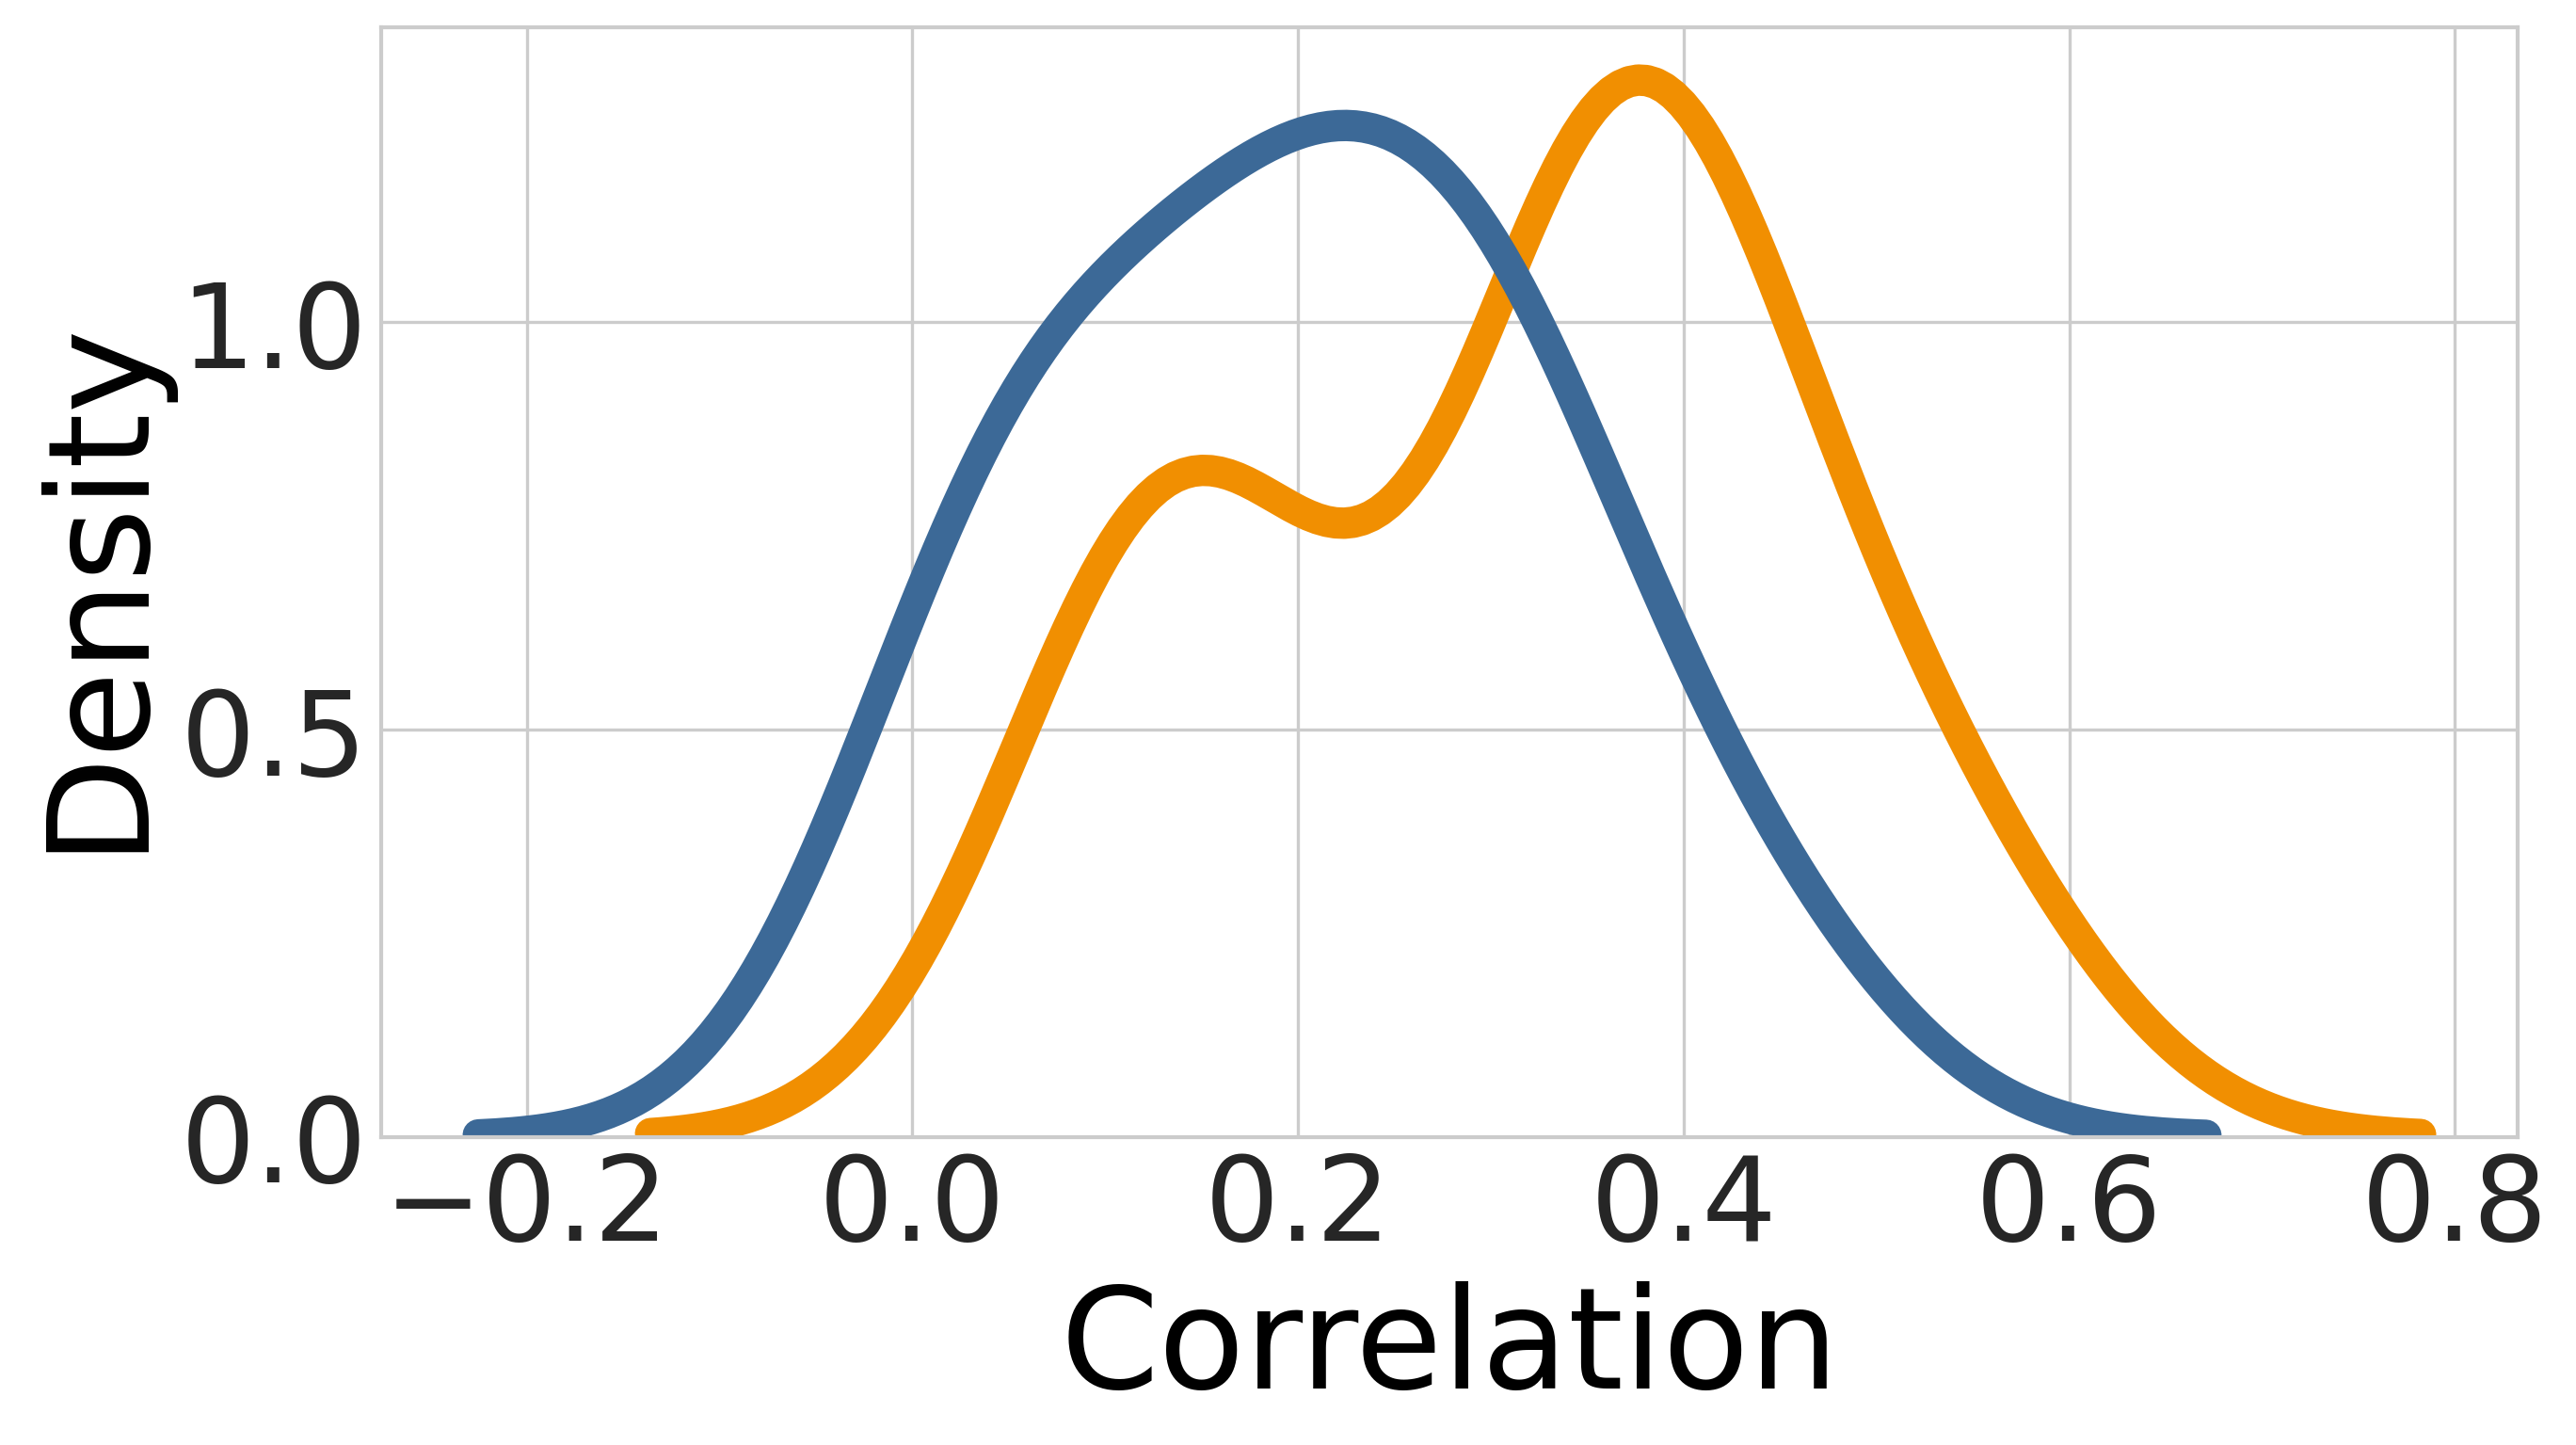

In [70]:
cols = ['scGPT Cosine Sim', 'Geneformer Cosine Sim', 'Correlation']

for c in cols:
    plot_kernel_density(IFTA_labeled, column = c, output = f'/home/ubuntu/IFTA_{c}_kde.png')

label = 0, random
0.03860633914838686
label = 1, complex
0.1842623299100634


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


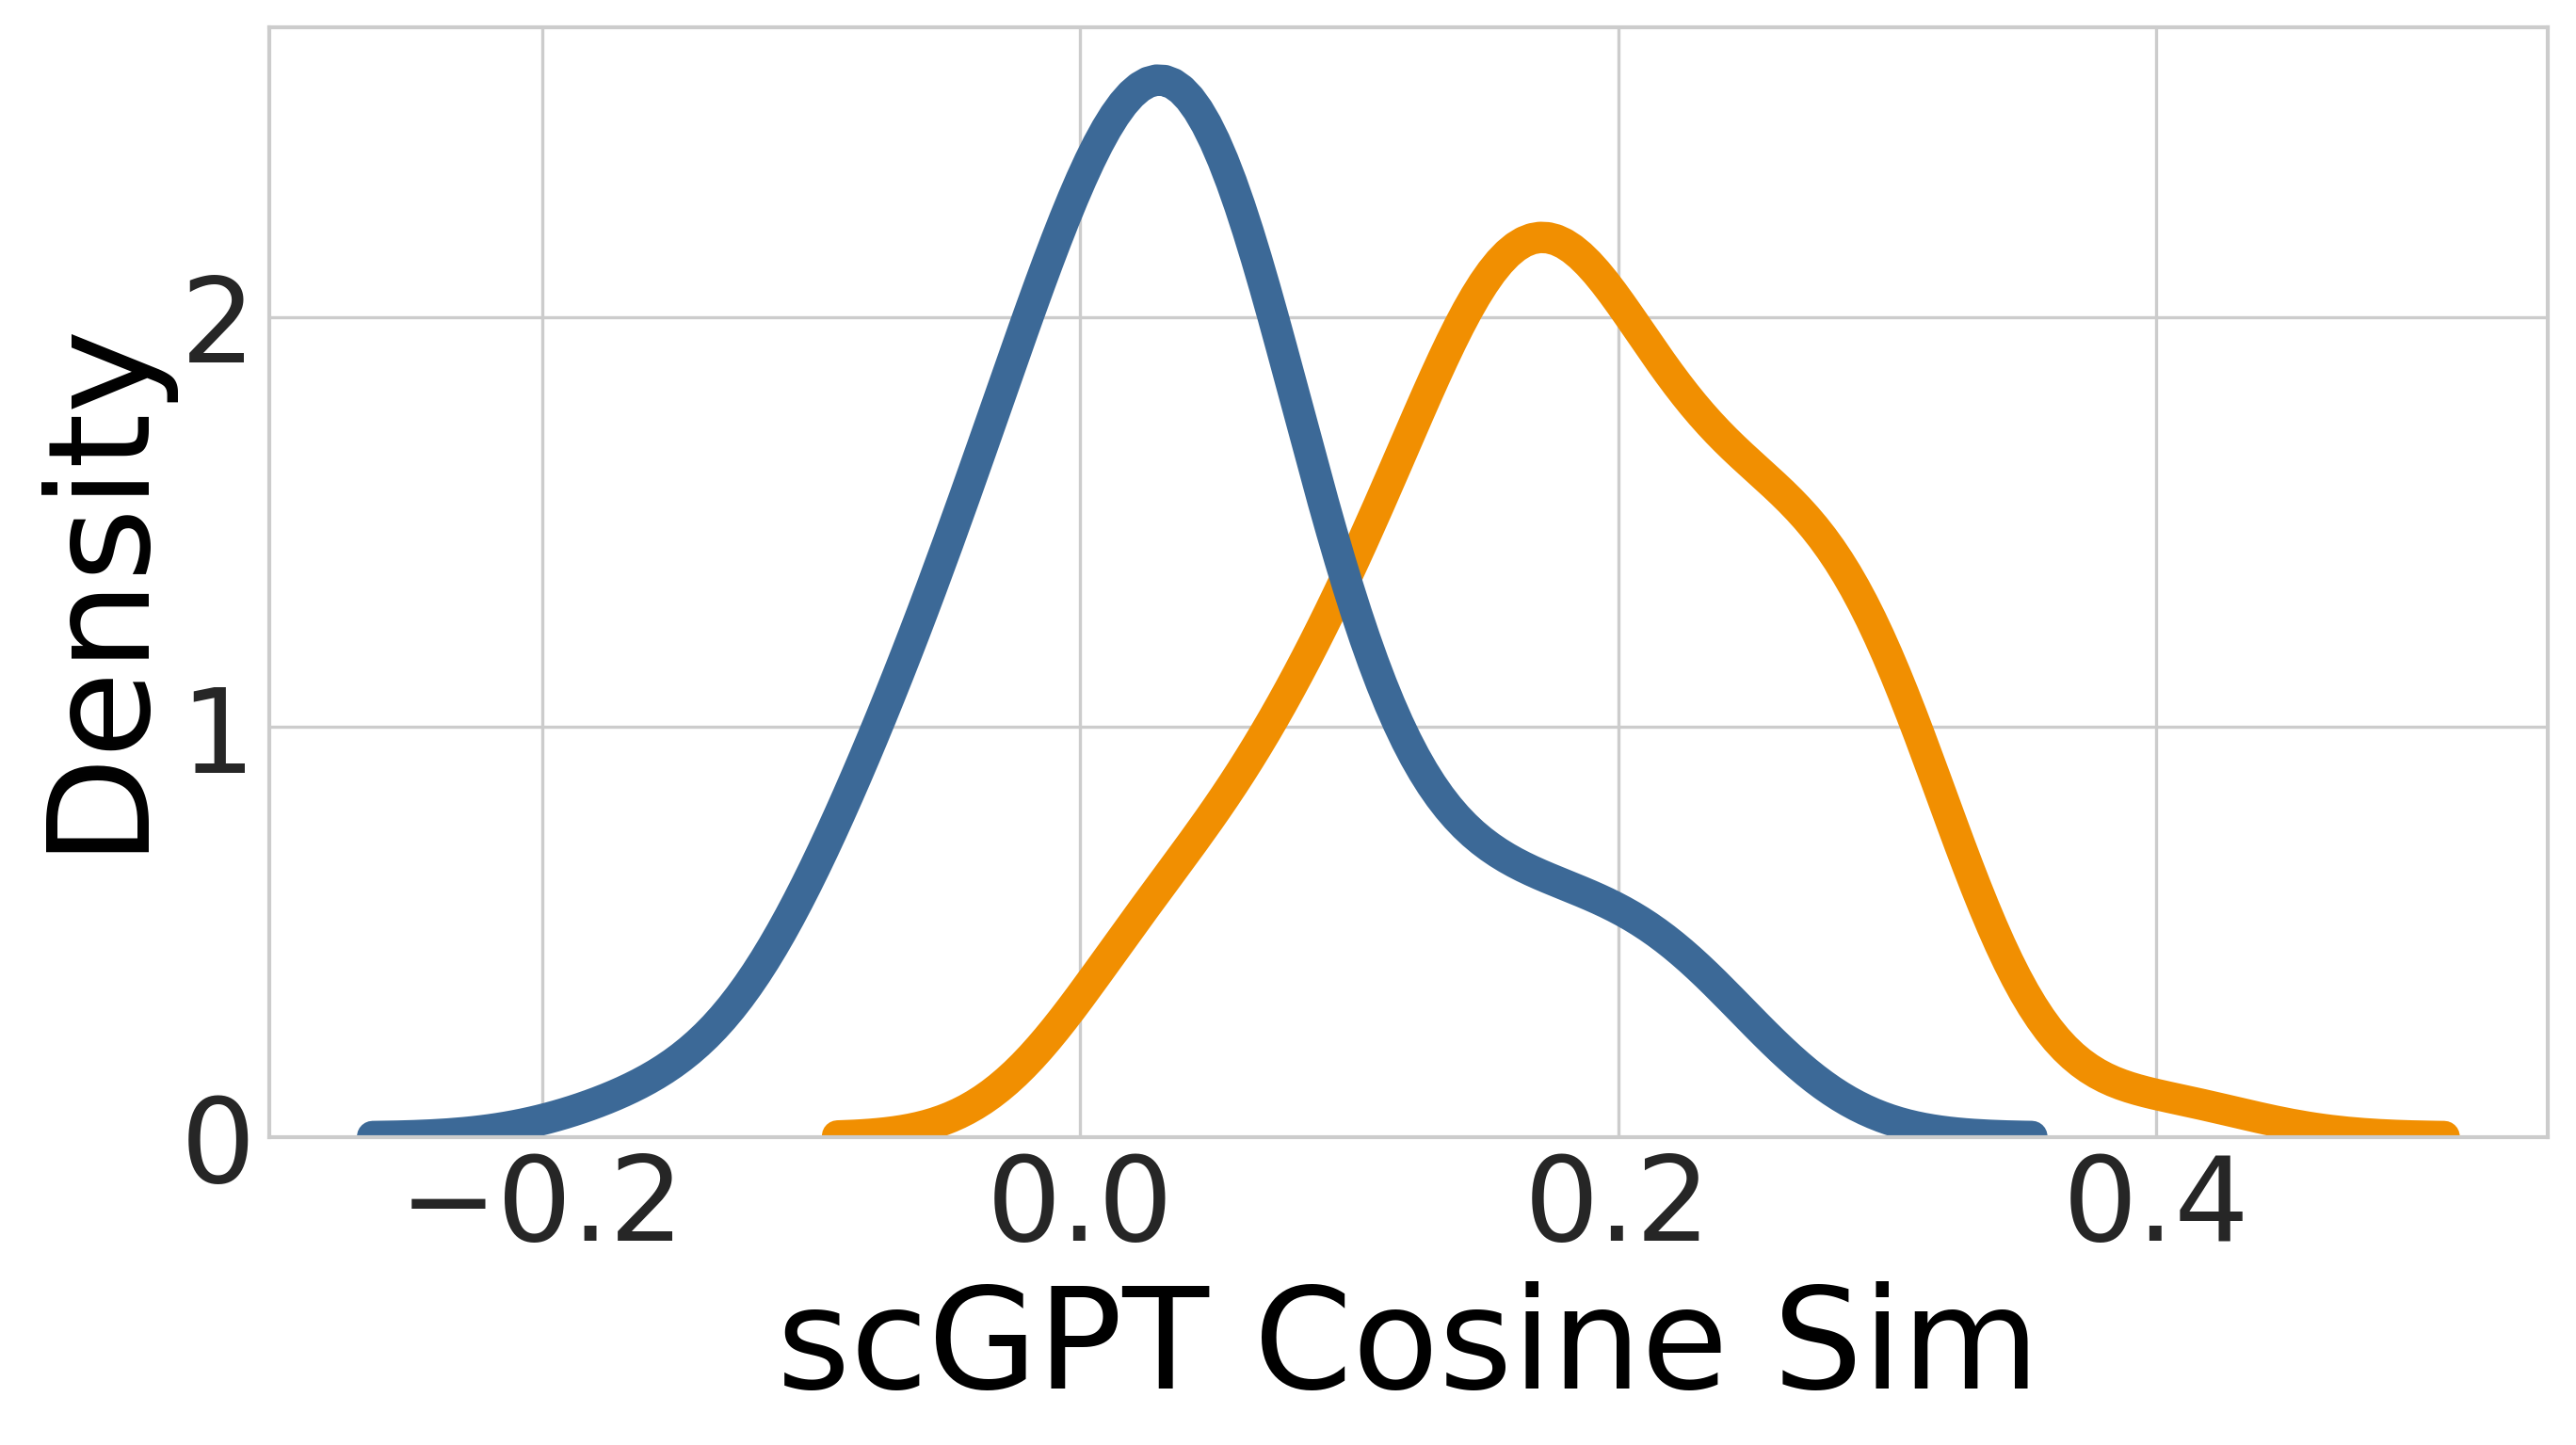

label = 0, random
0.1531814413540291
label = 1, complex
0.1696155545386401


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


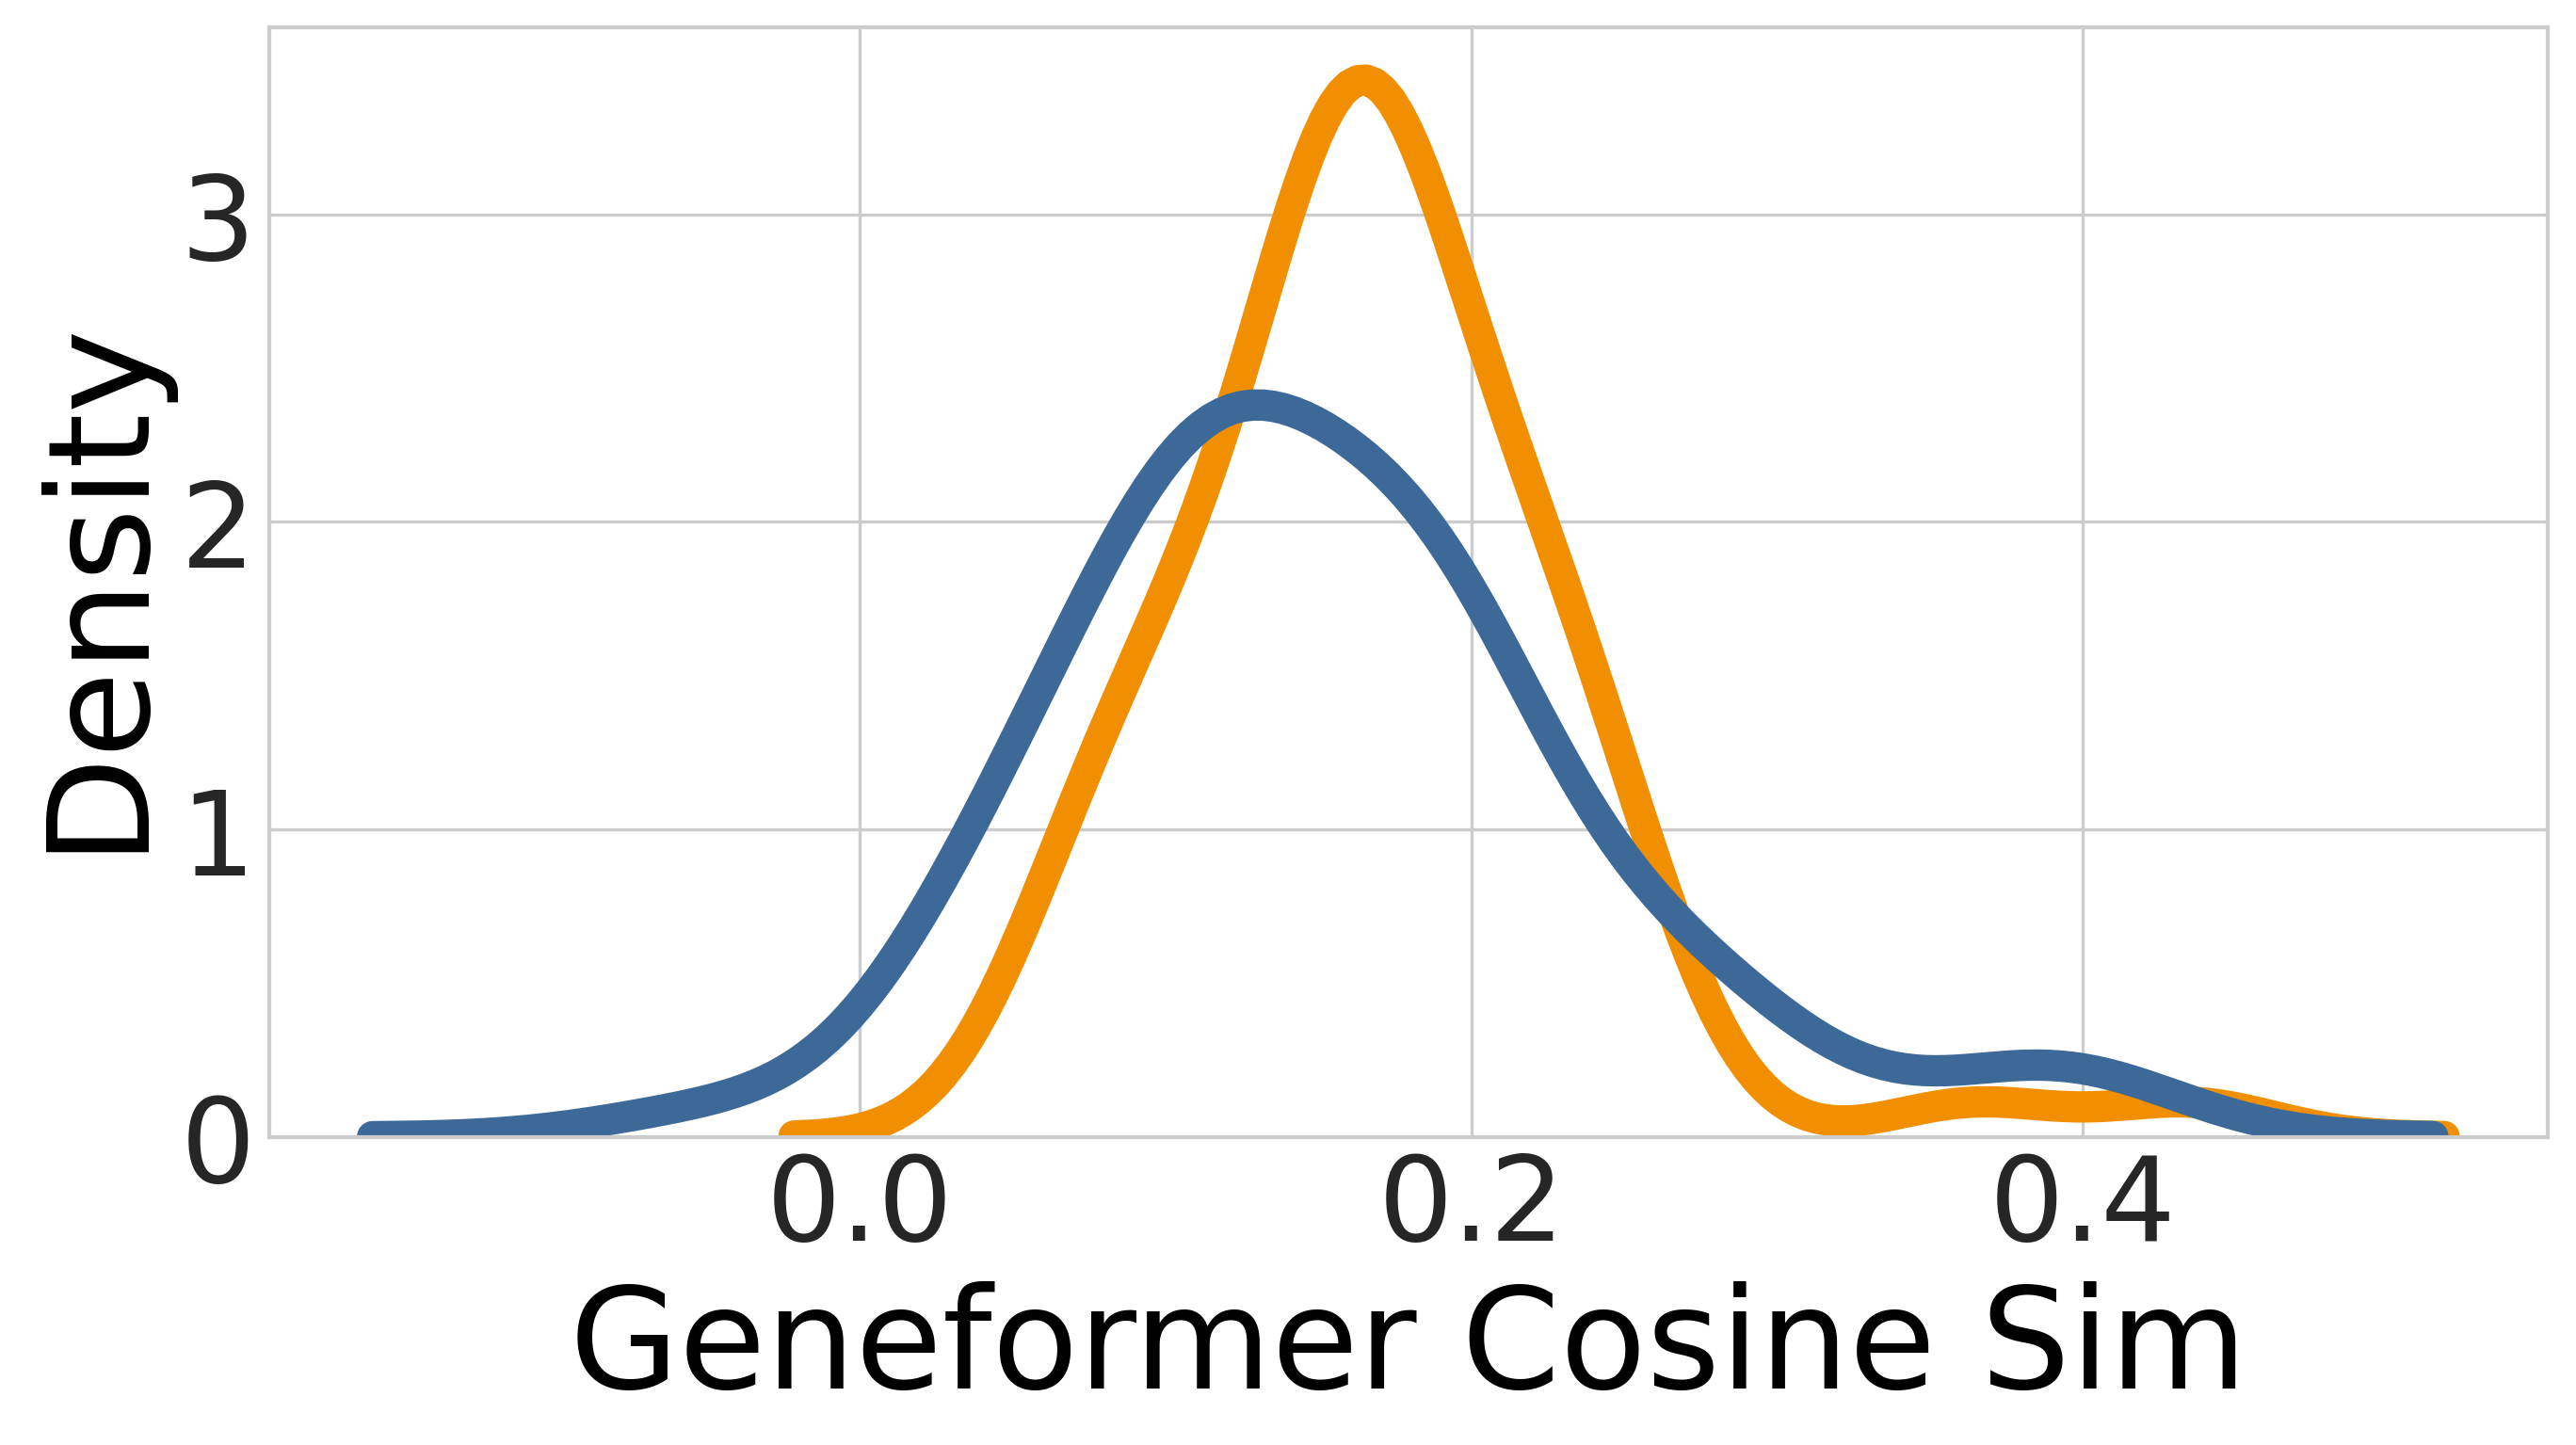

label = 0, random
0.2409301971542003
label = 1, complex
0.2658779231982666


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


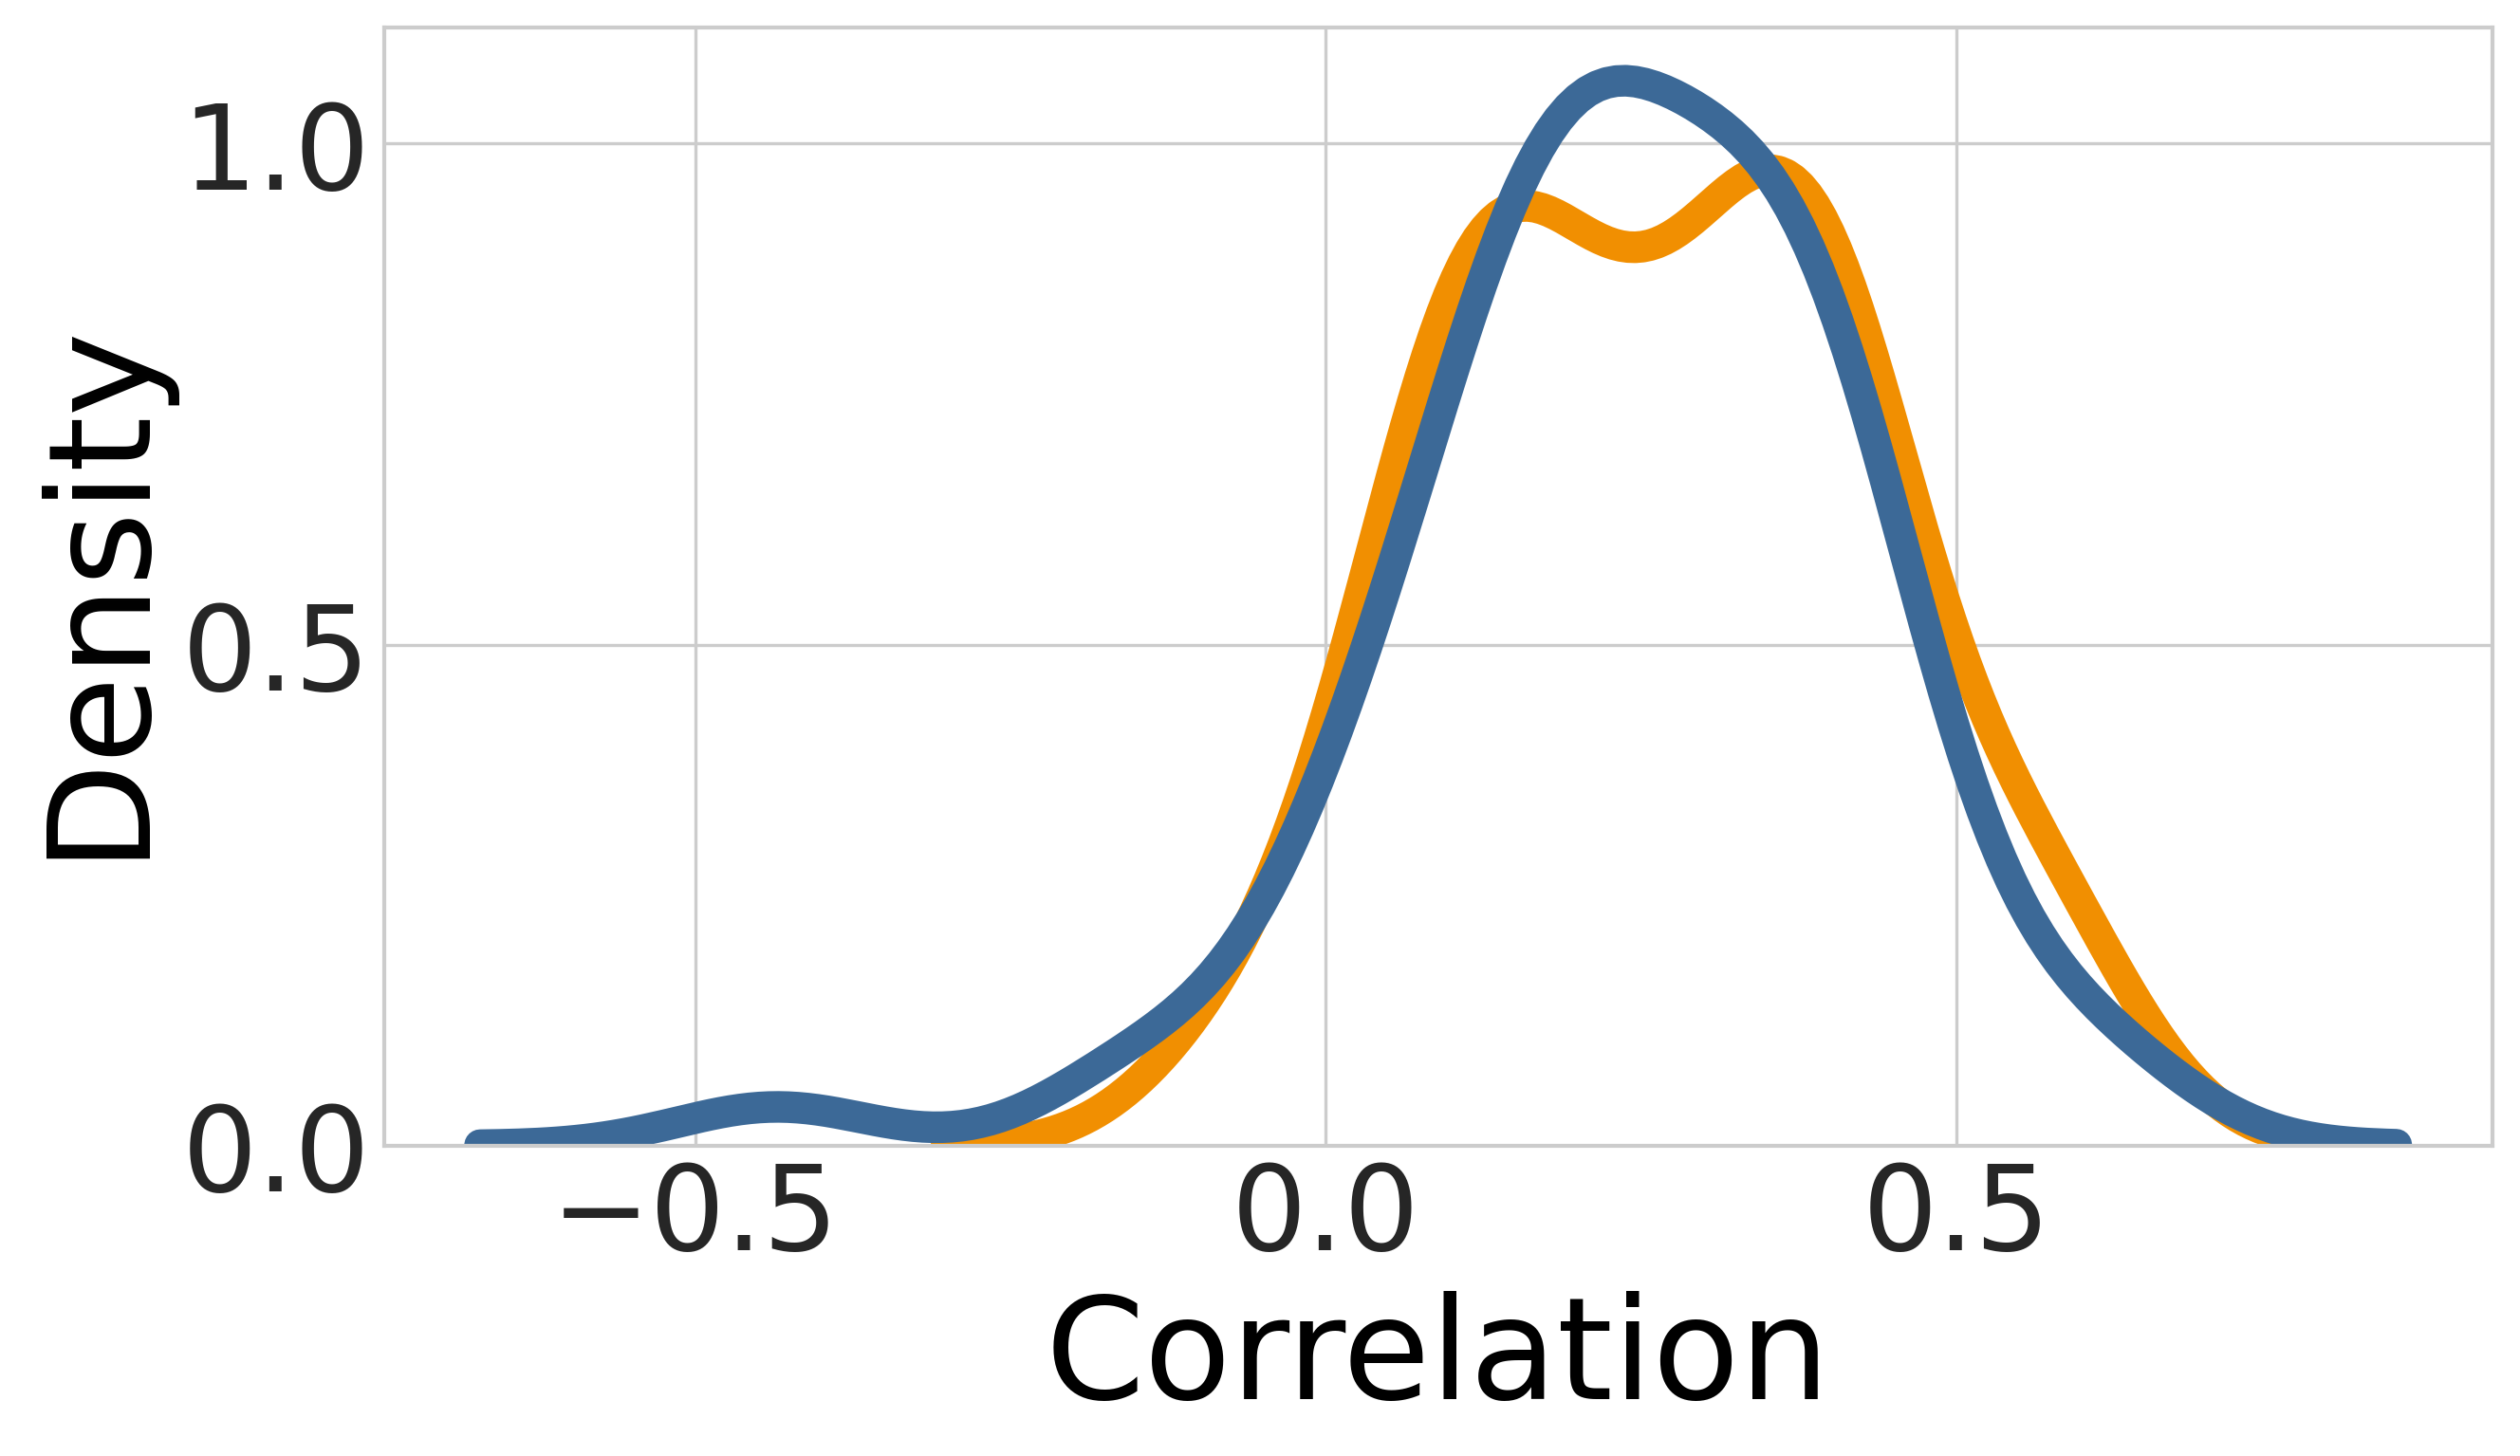

In [71]:
cols = ['scGPT Cosine Sim', 'Geneformer Cosine Sim', 'Correlation']

for c in cols:
    plot_kernel_density(IFTB_labeled, column = c, output = f'/home/ubuntu/IFTB_{c}_kde.png')

In [64]:
X_full1 = X_full[X_full['label']==1]
X_full0 = X_full[X_full['label']==0].sample(n=X_full1.shape[0])

Xf = pd.concat([X_full1, X_full0])
Xf.rename(columns = {'scGPT_human_embeddings_similarities':'scGPT', 'GF-20L95M_HUMANemb_similarities':'Geneformer'}, inplace=True)

In [72]:
Xf.rename(columns = {'scGPT':'scGPT Cosine Sim', 'Geneformer':'Geneformer Cosine Sim'}, inplace=True)

label = 0, random
0.0576415877219484
label = 1, complex
0.22931070649060462


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


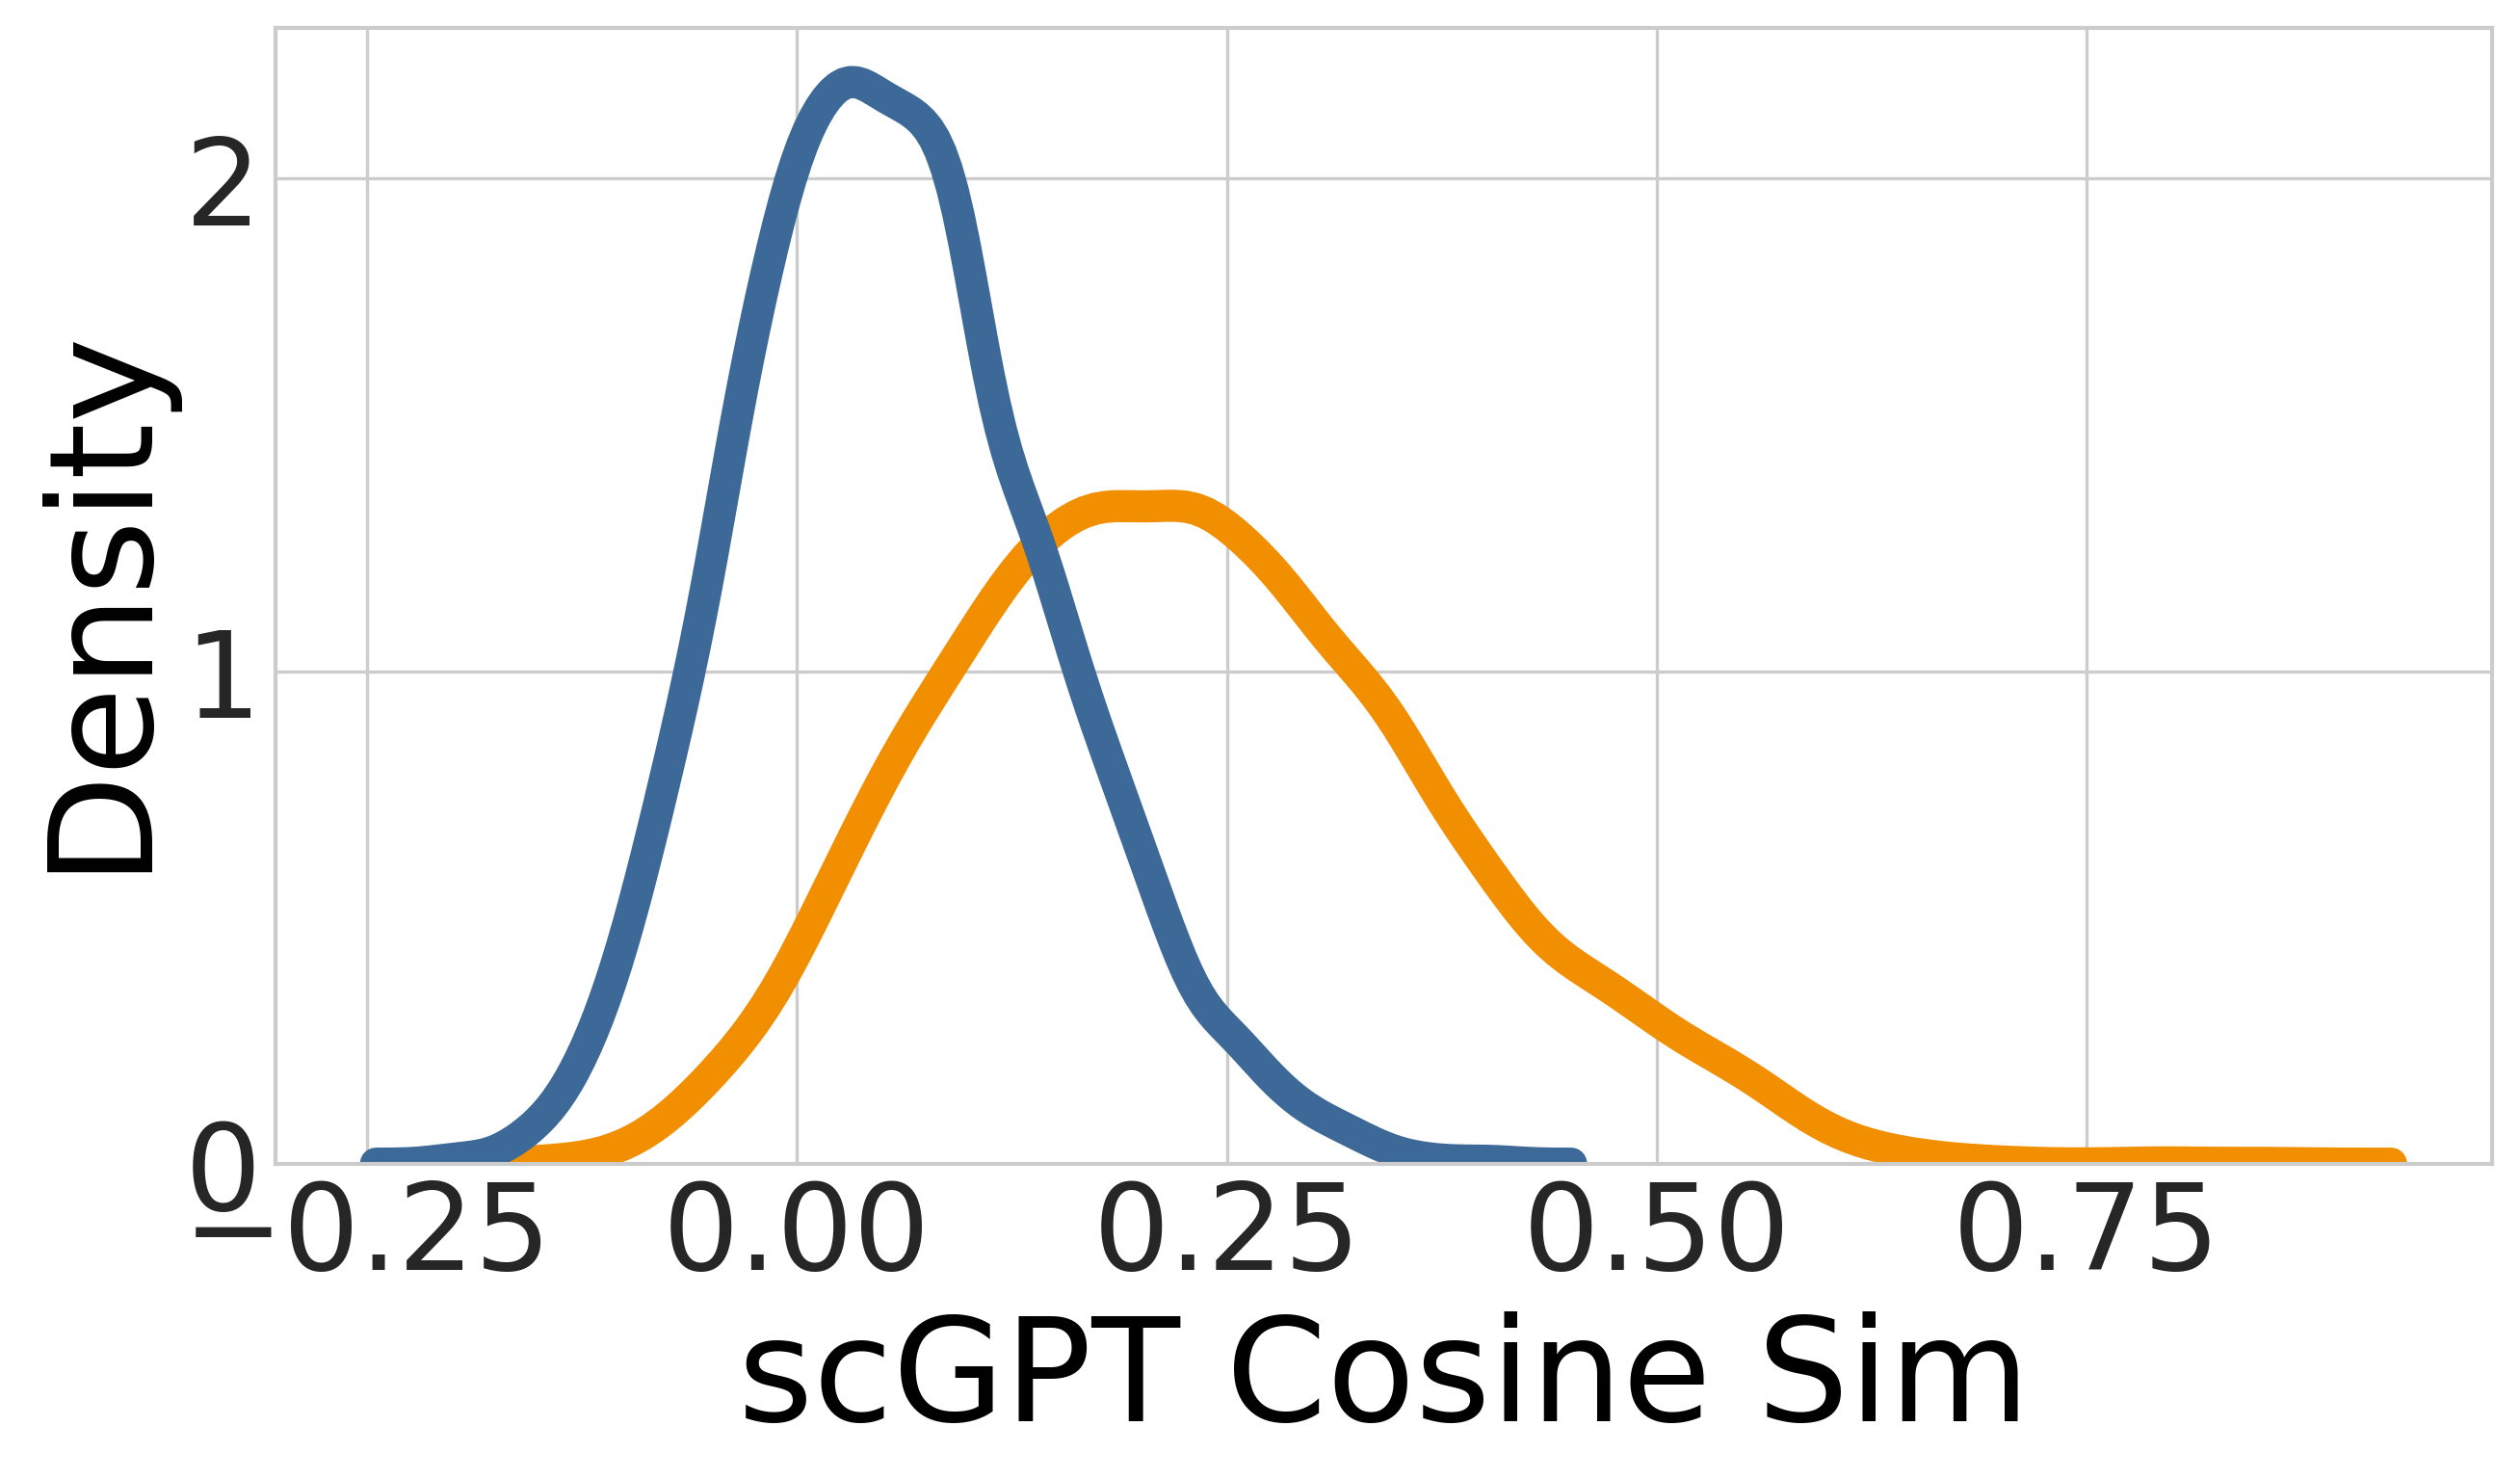

label = 0, random
0.17304250243671784
label = 1, complex
0.1533715308930392


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


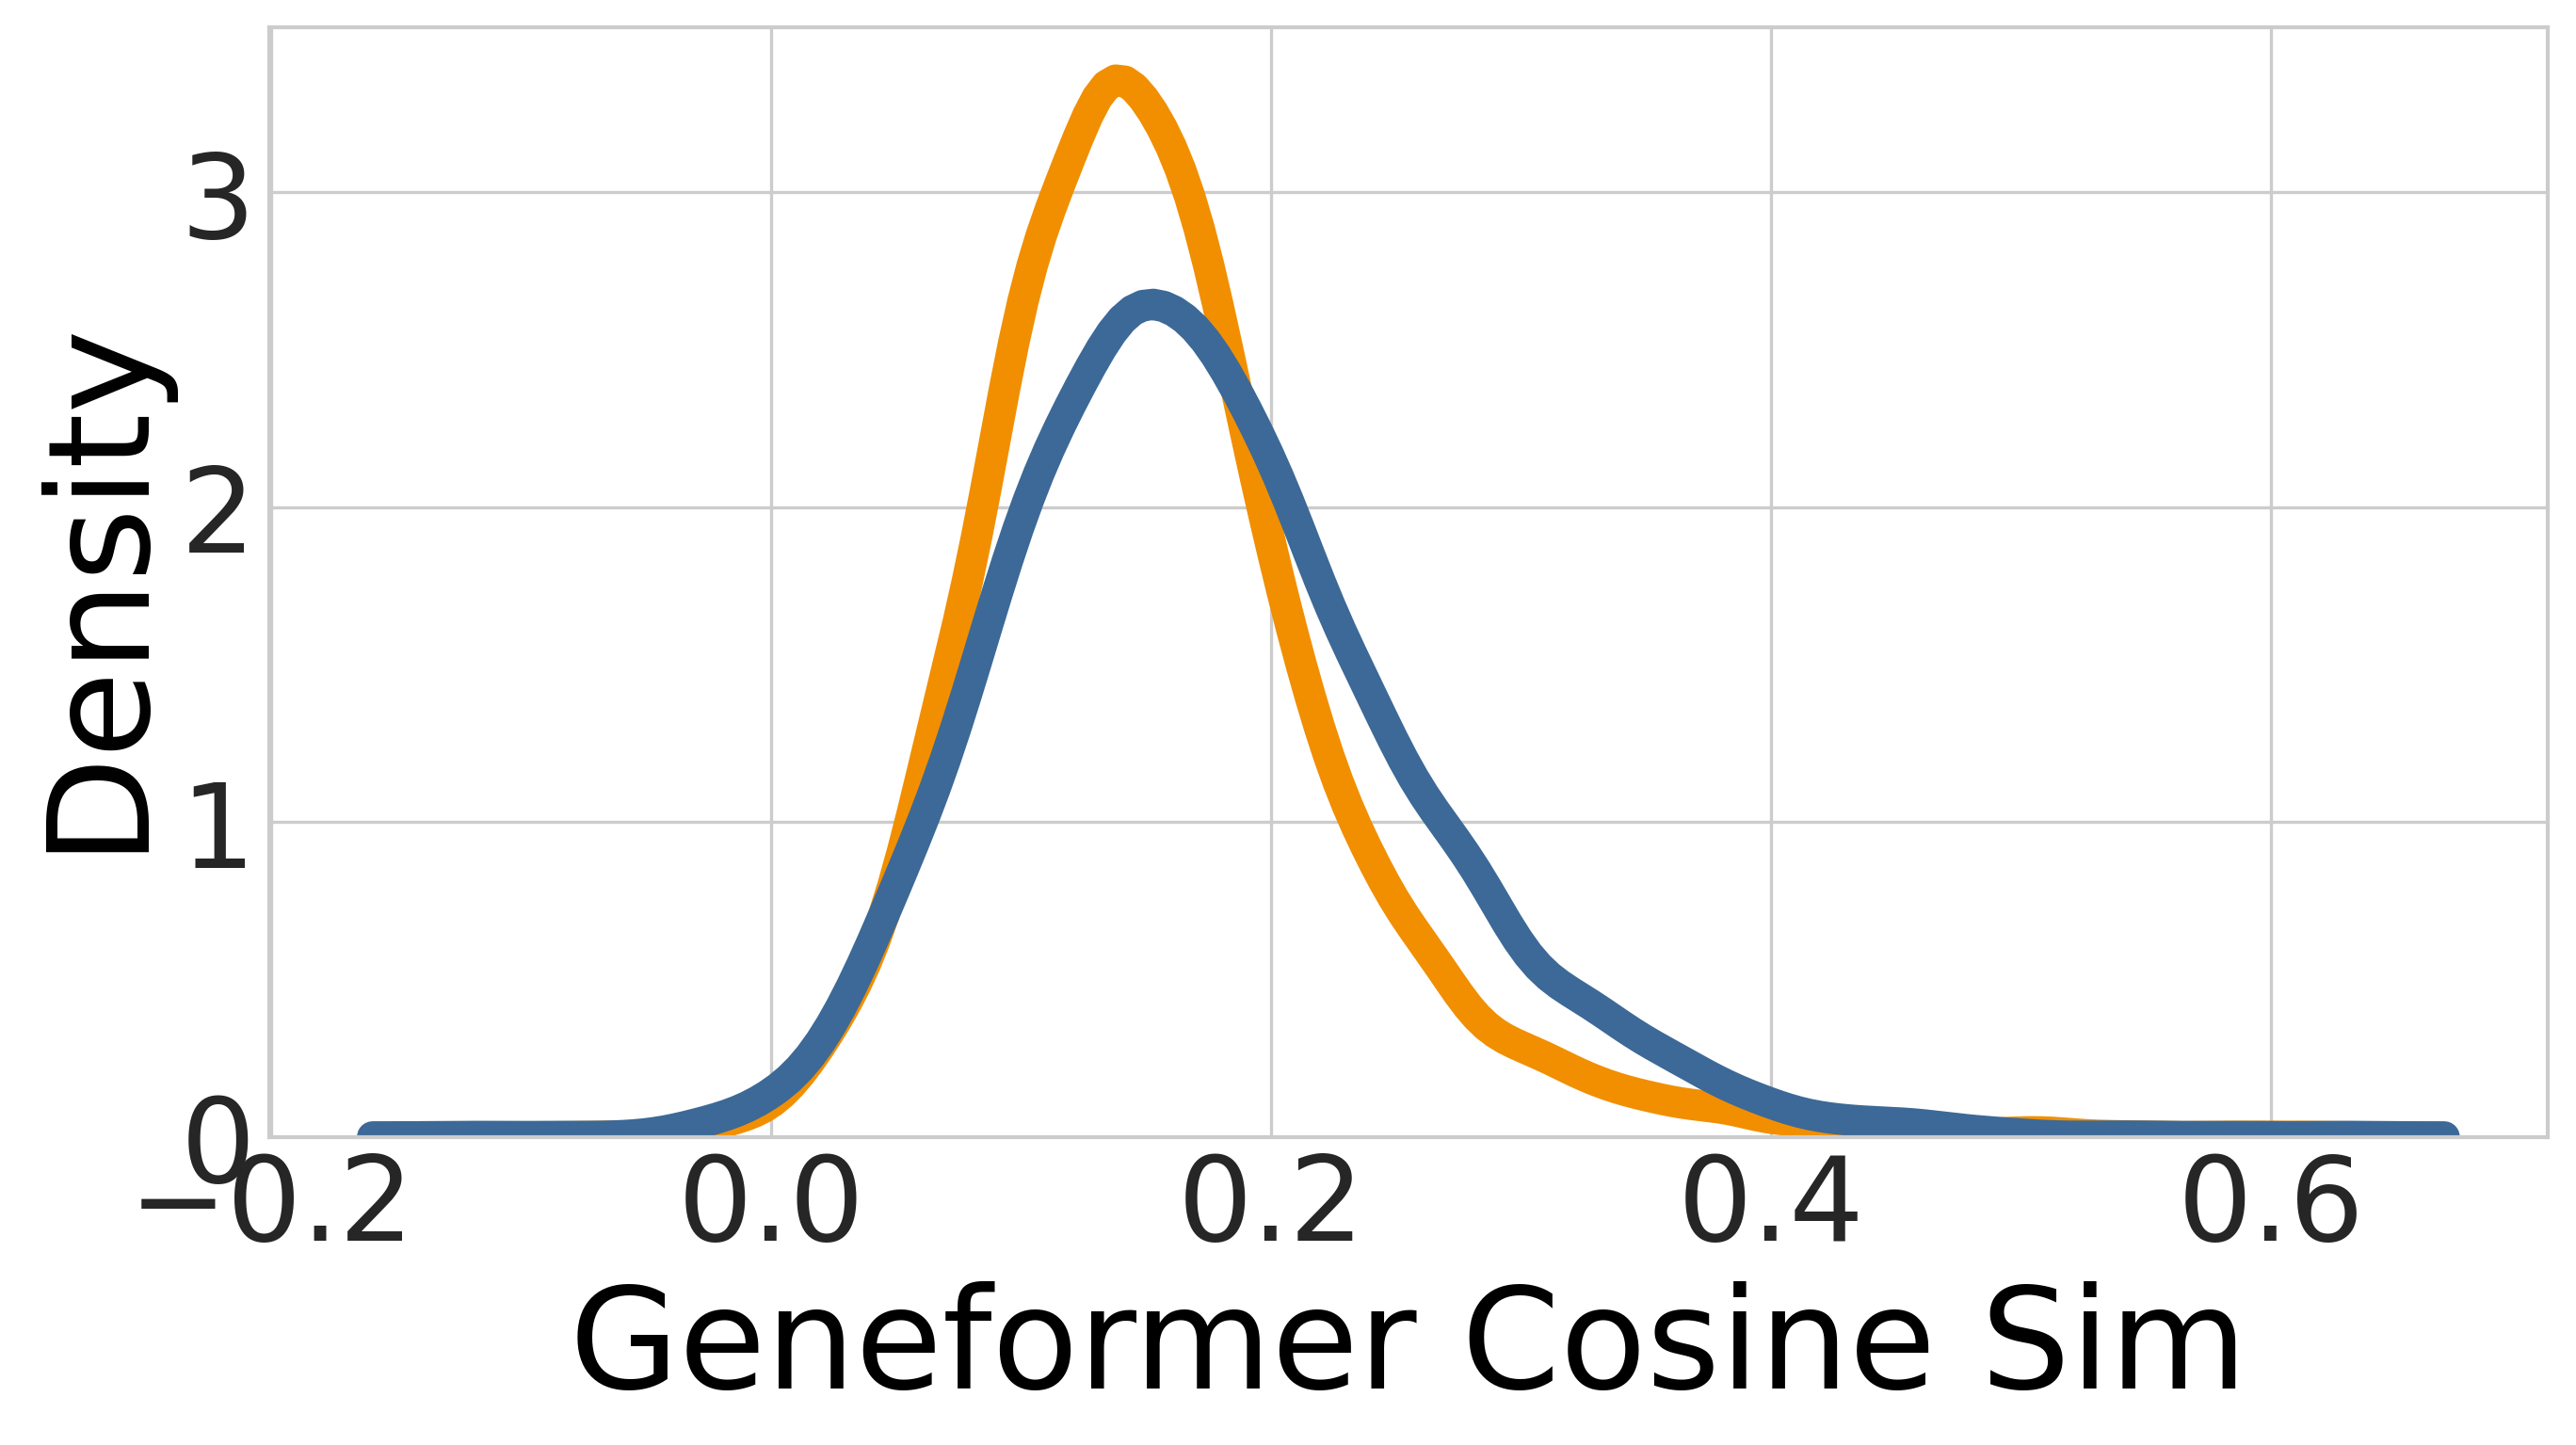

label = 0, random
0.26737976225103177
label = 1, complex
0.26416068810850224


/tmp/ipykernel_4668/1423425829.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


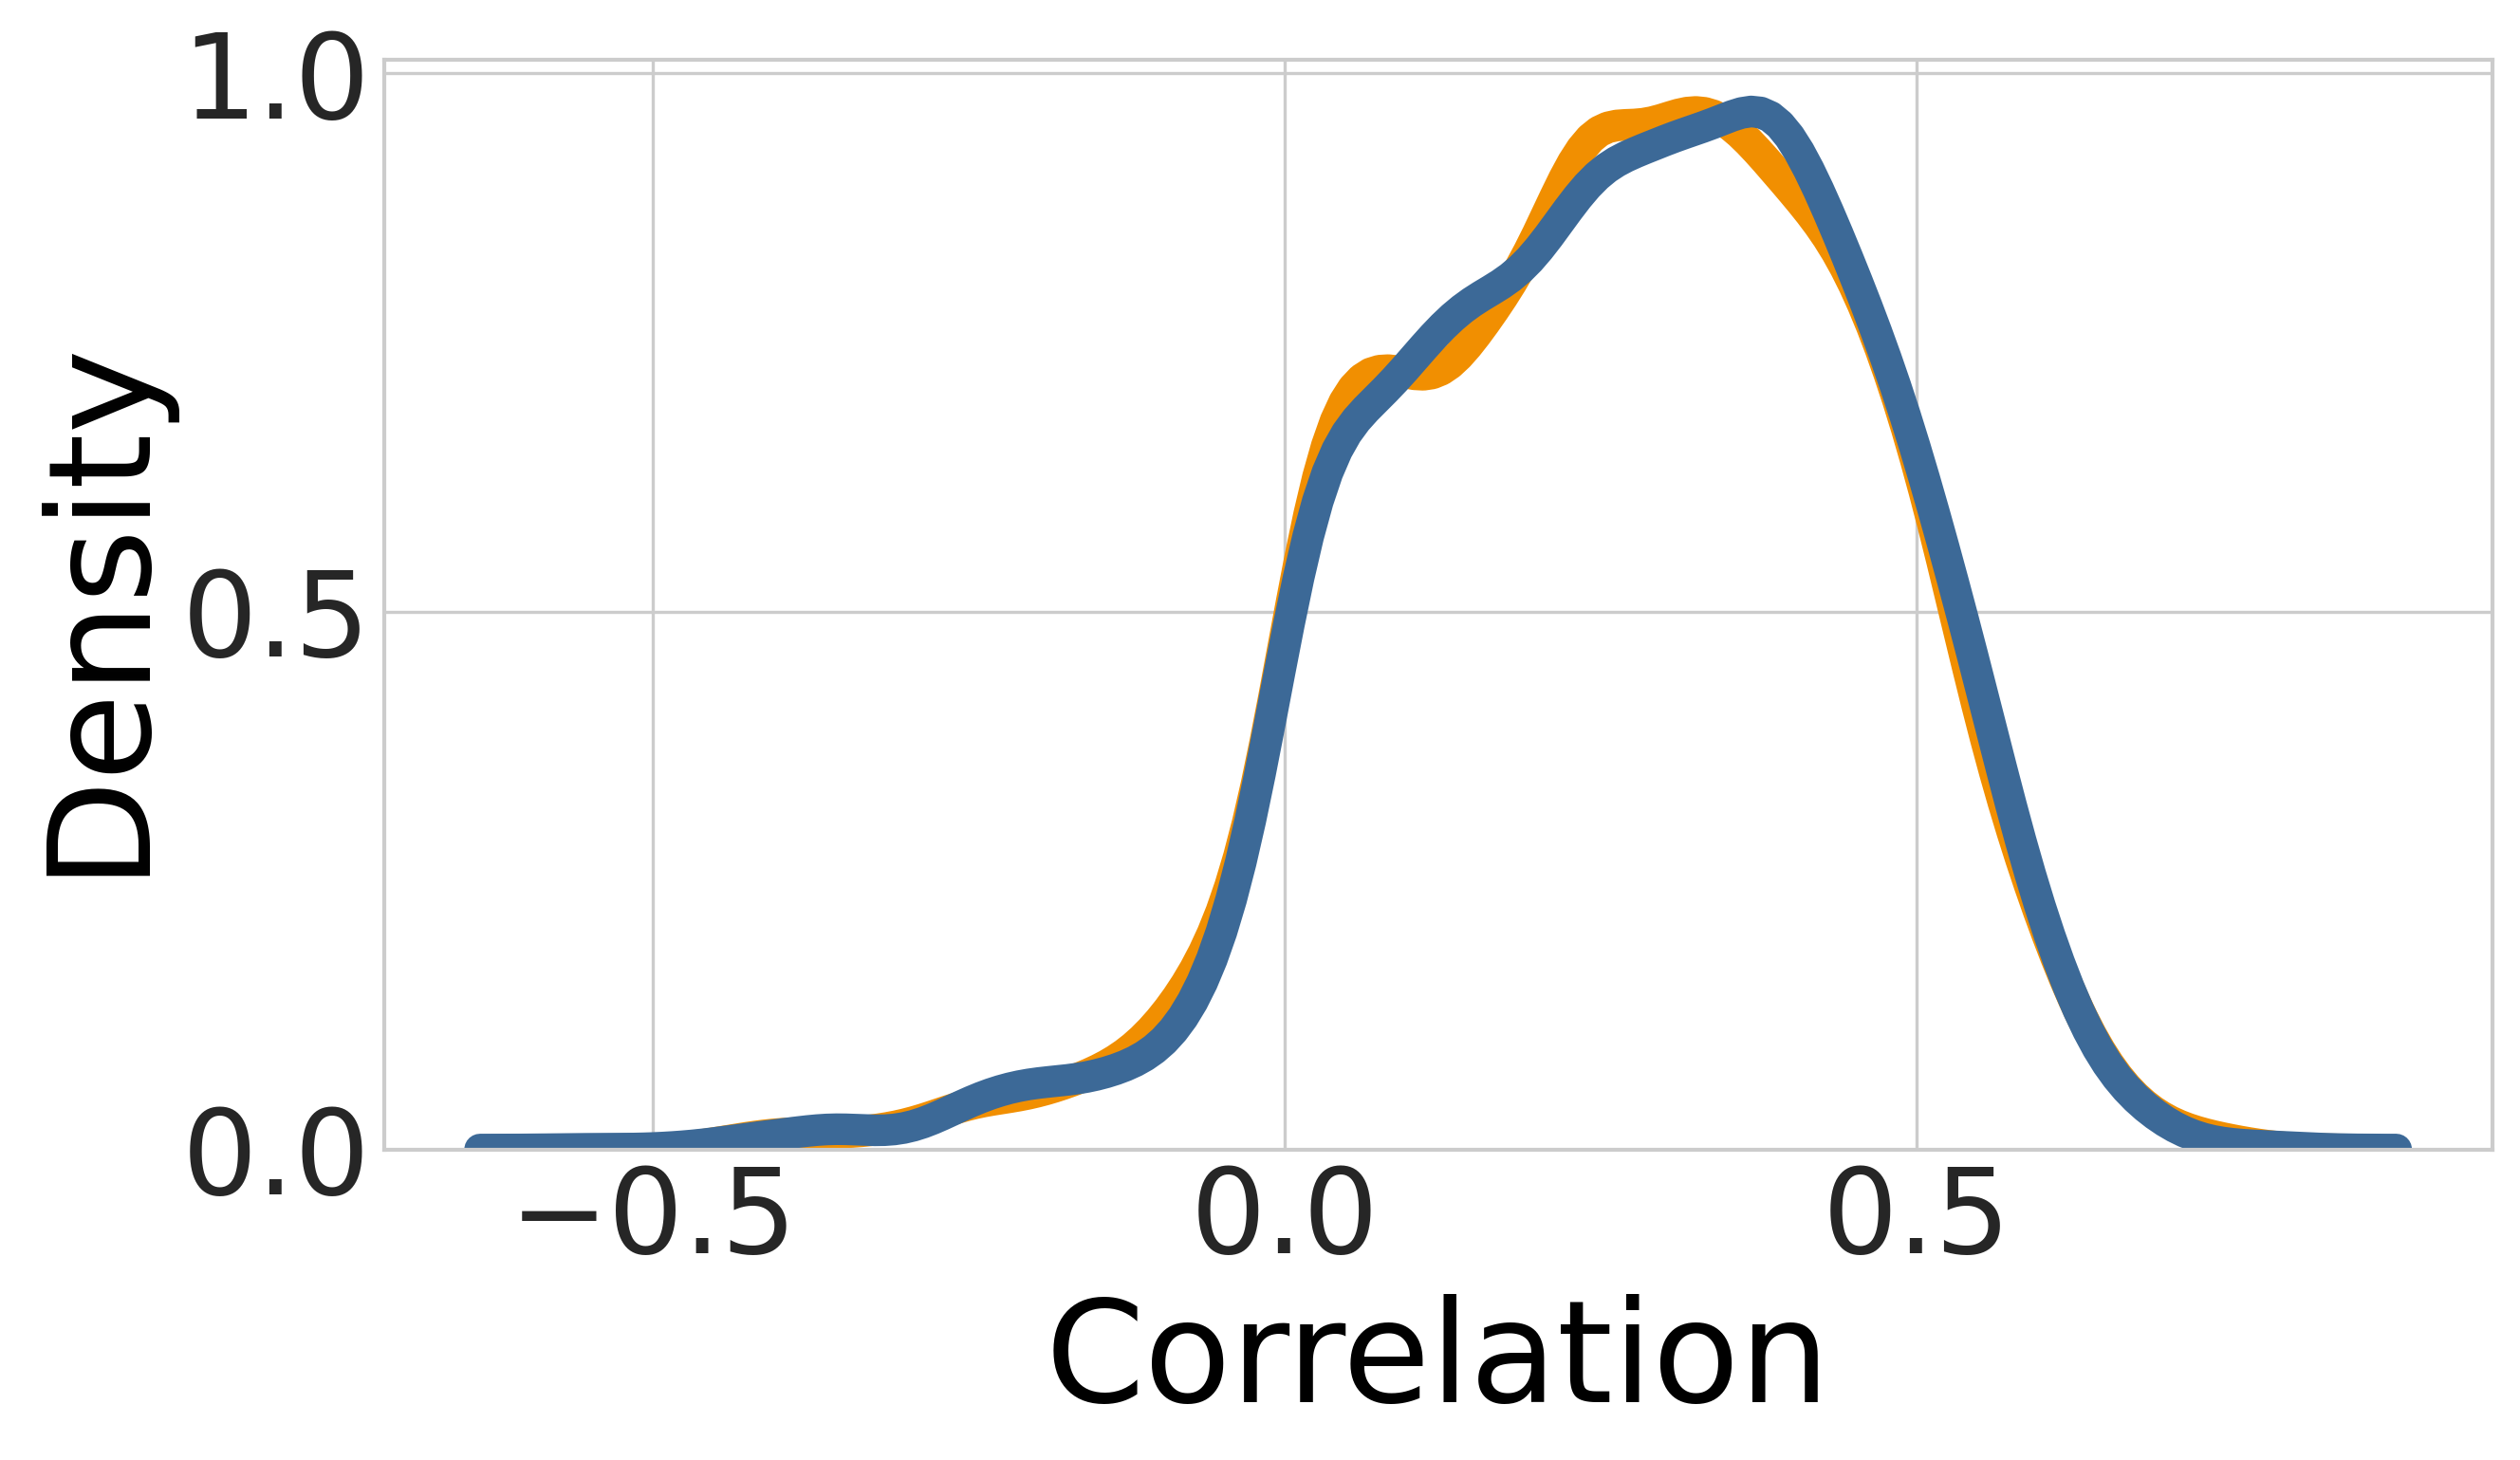

In [74]:
cols = ['scGPT Cosine Sim', 'Geneformer Cosine Sim', 'Correlation']

for c in cols:
    plot_kernel_density(Xf, column = c, output = f'/home/ubuntu/FULL_{c}_kde.png')

label = 0, random
0.18083676734714063
label = 1, complex
0.12589360489049456


/tmp/ipykernel_5032/3265089499.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


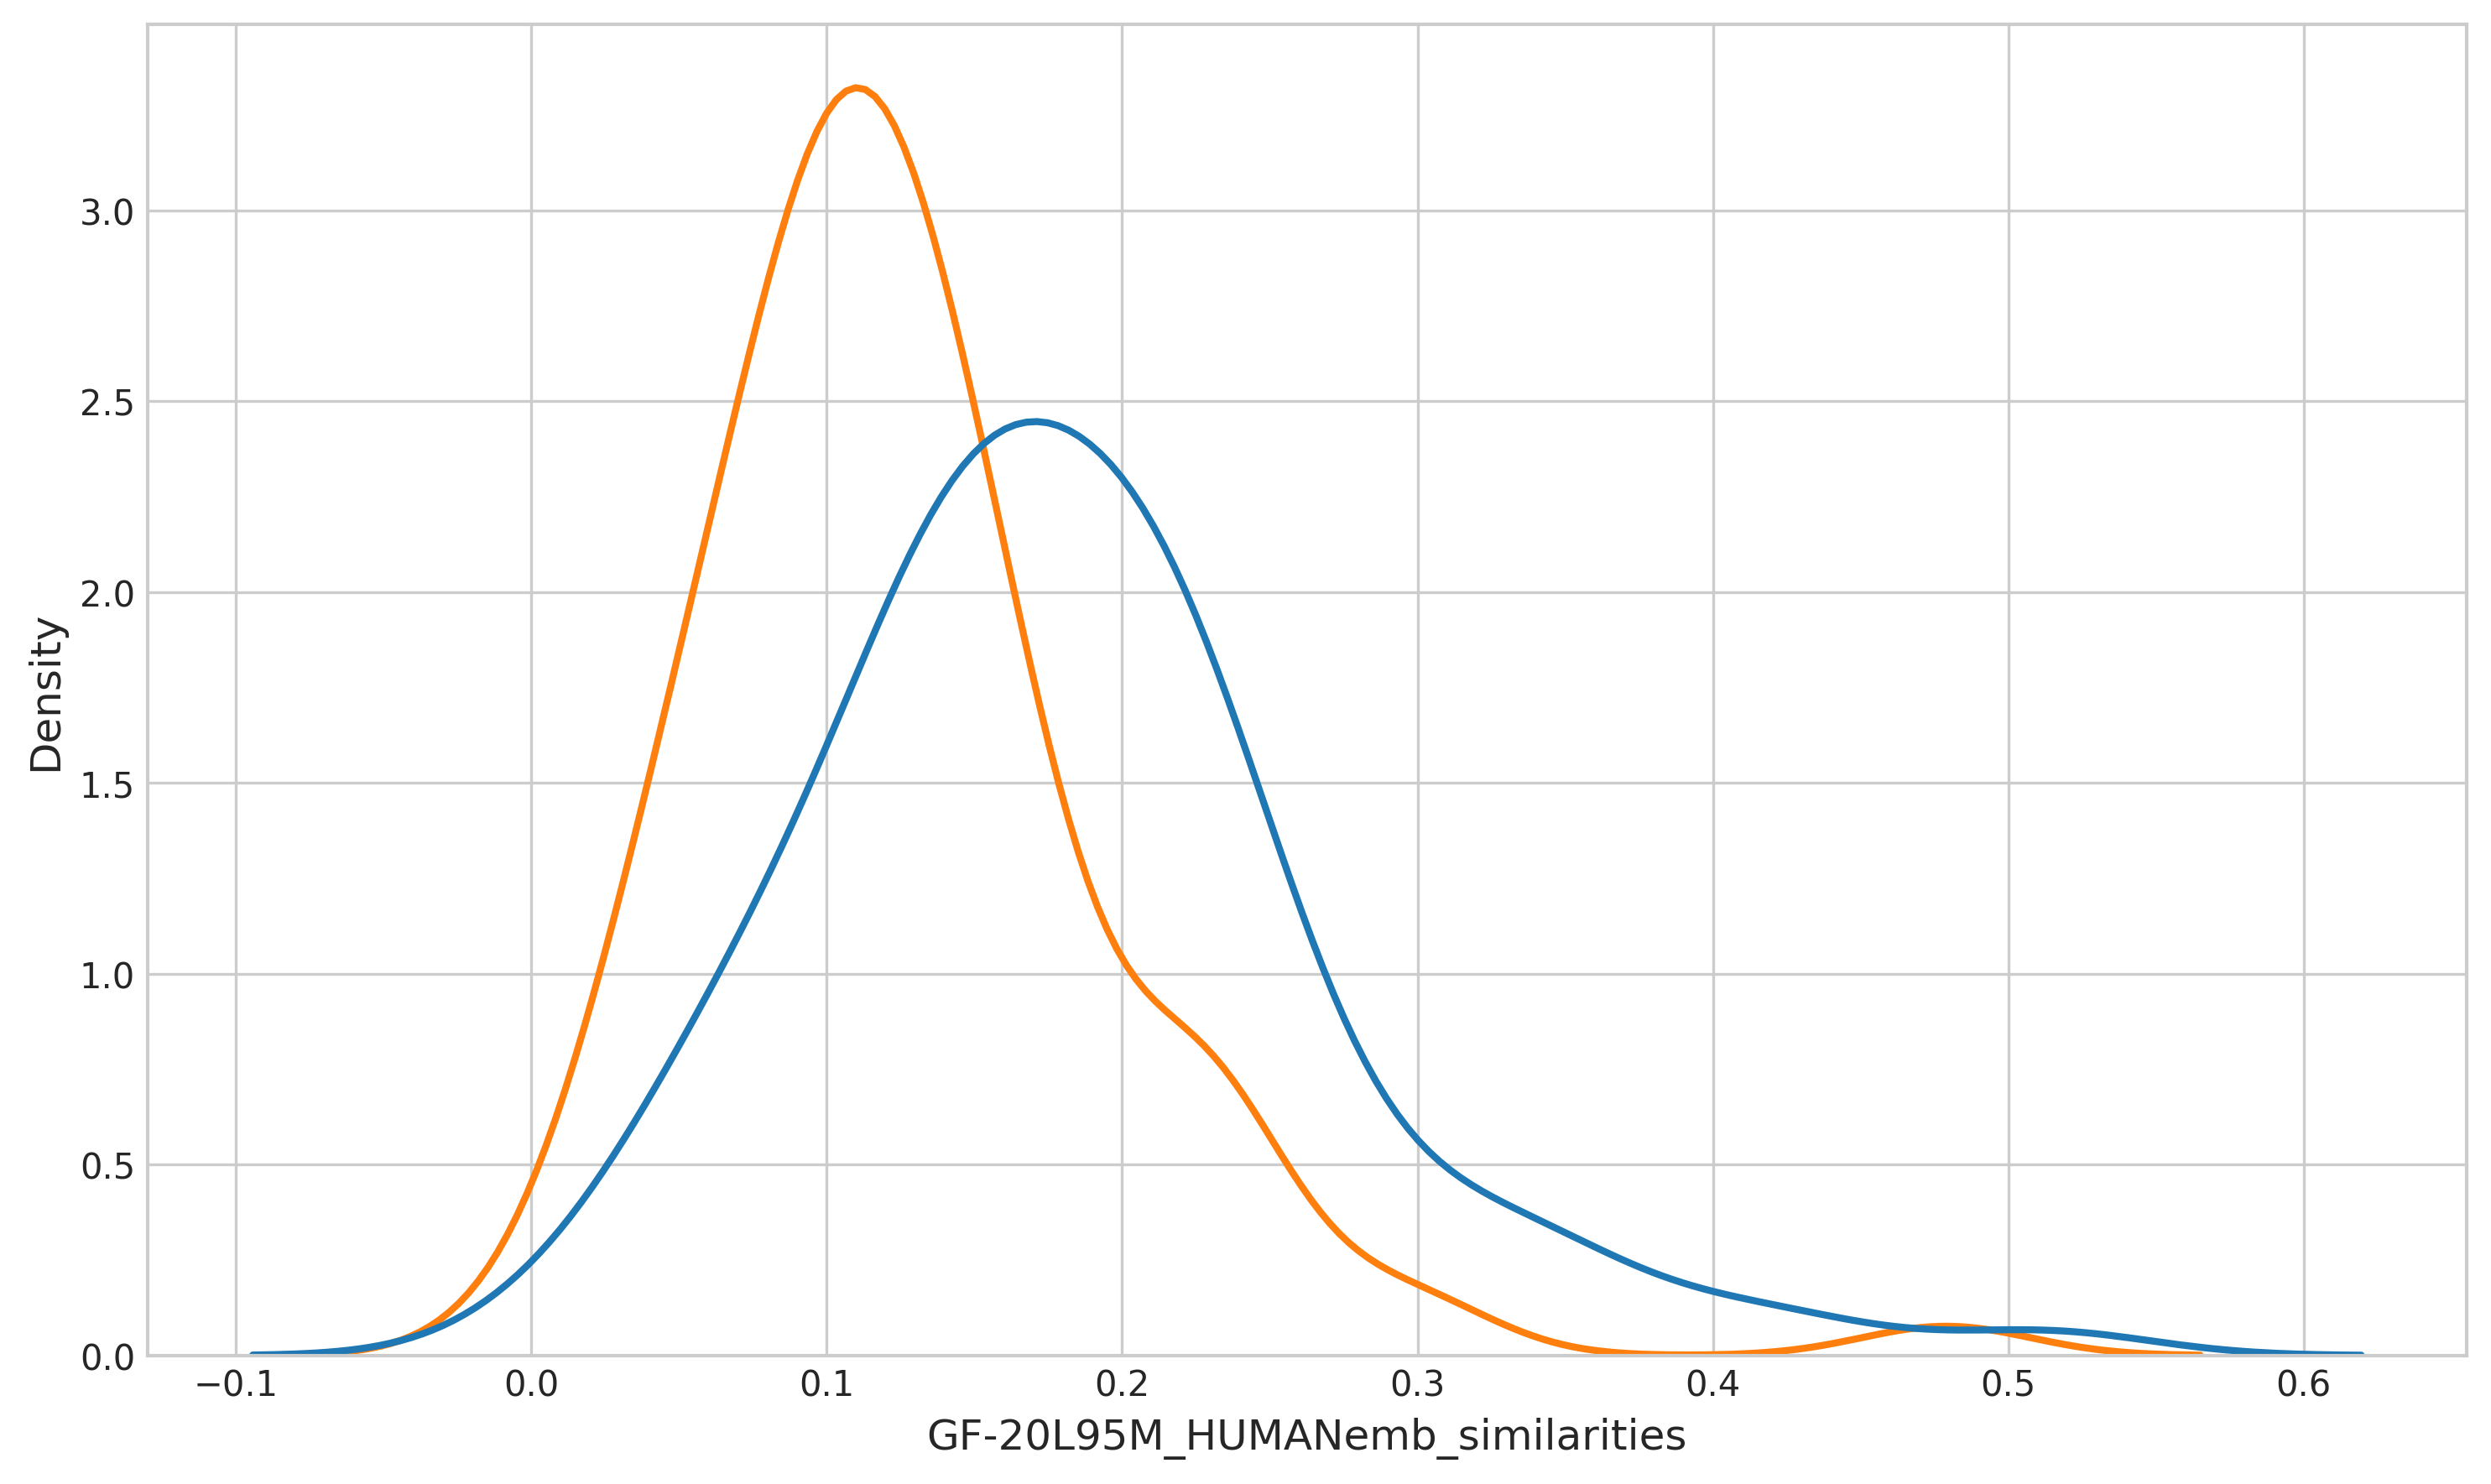

In [88]:
plot_kernel_density(psm20_labeled, column='GF-20L95M_HUMANemb_similarities', output='/home/ubuntu/psm20_scgpt_kde.png', title = 'Kernel Density Plot: Proteasome20', labels = ['PSM20', 'Background Distribution'])

label = 0, random
0.22238973278508137
label = 1, complex
0.24726198430404894


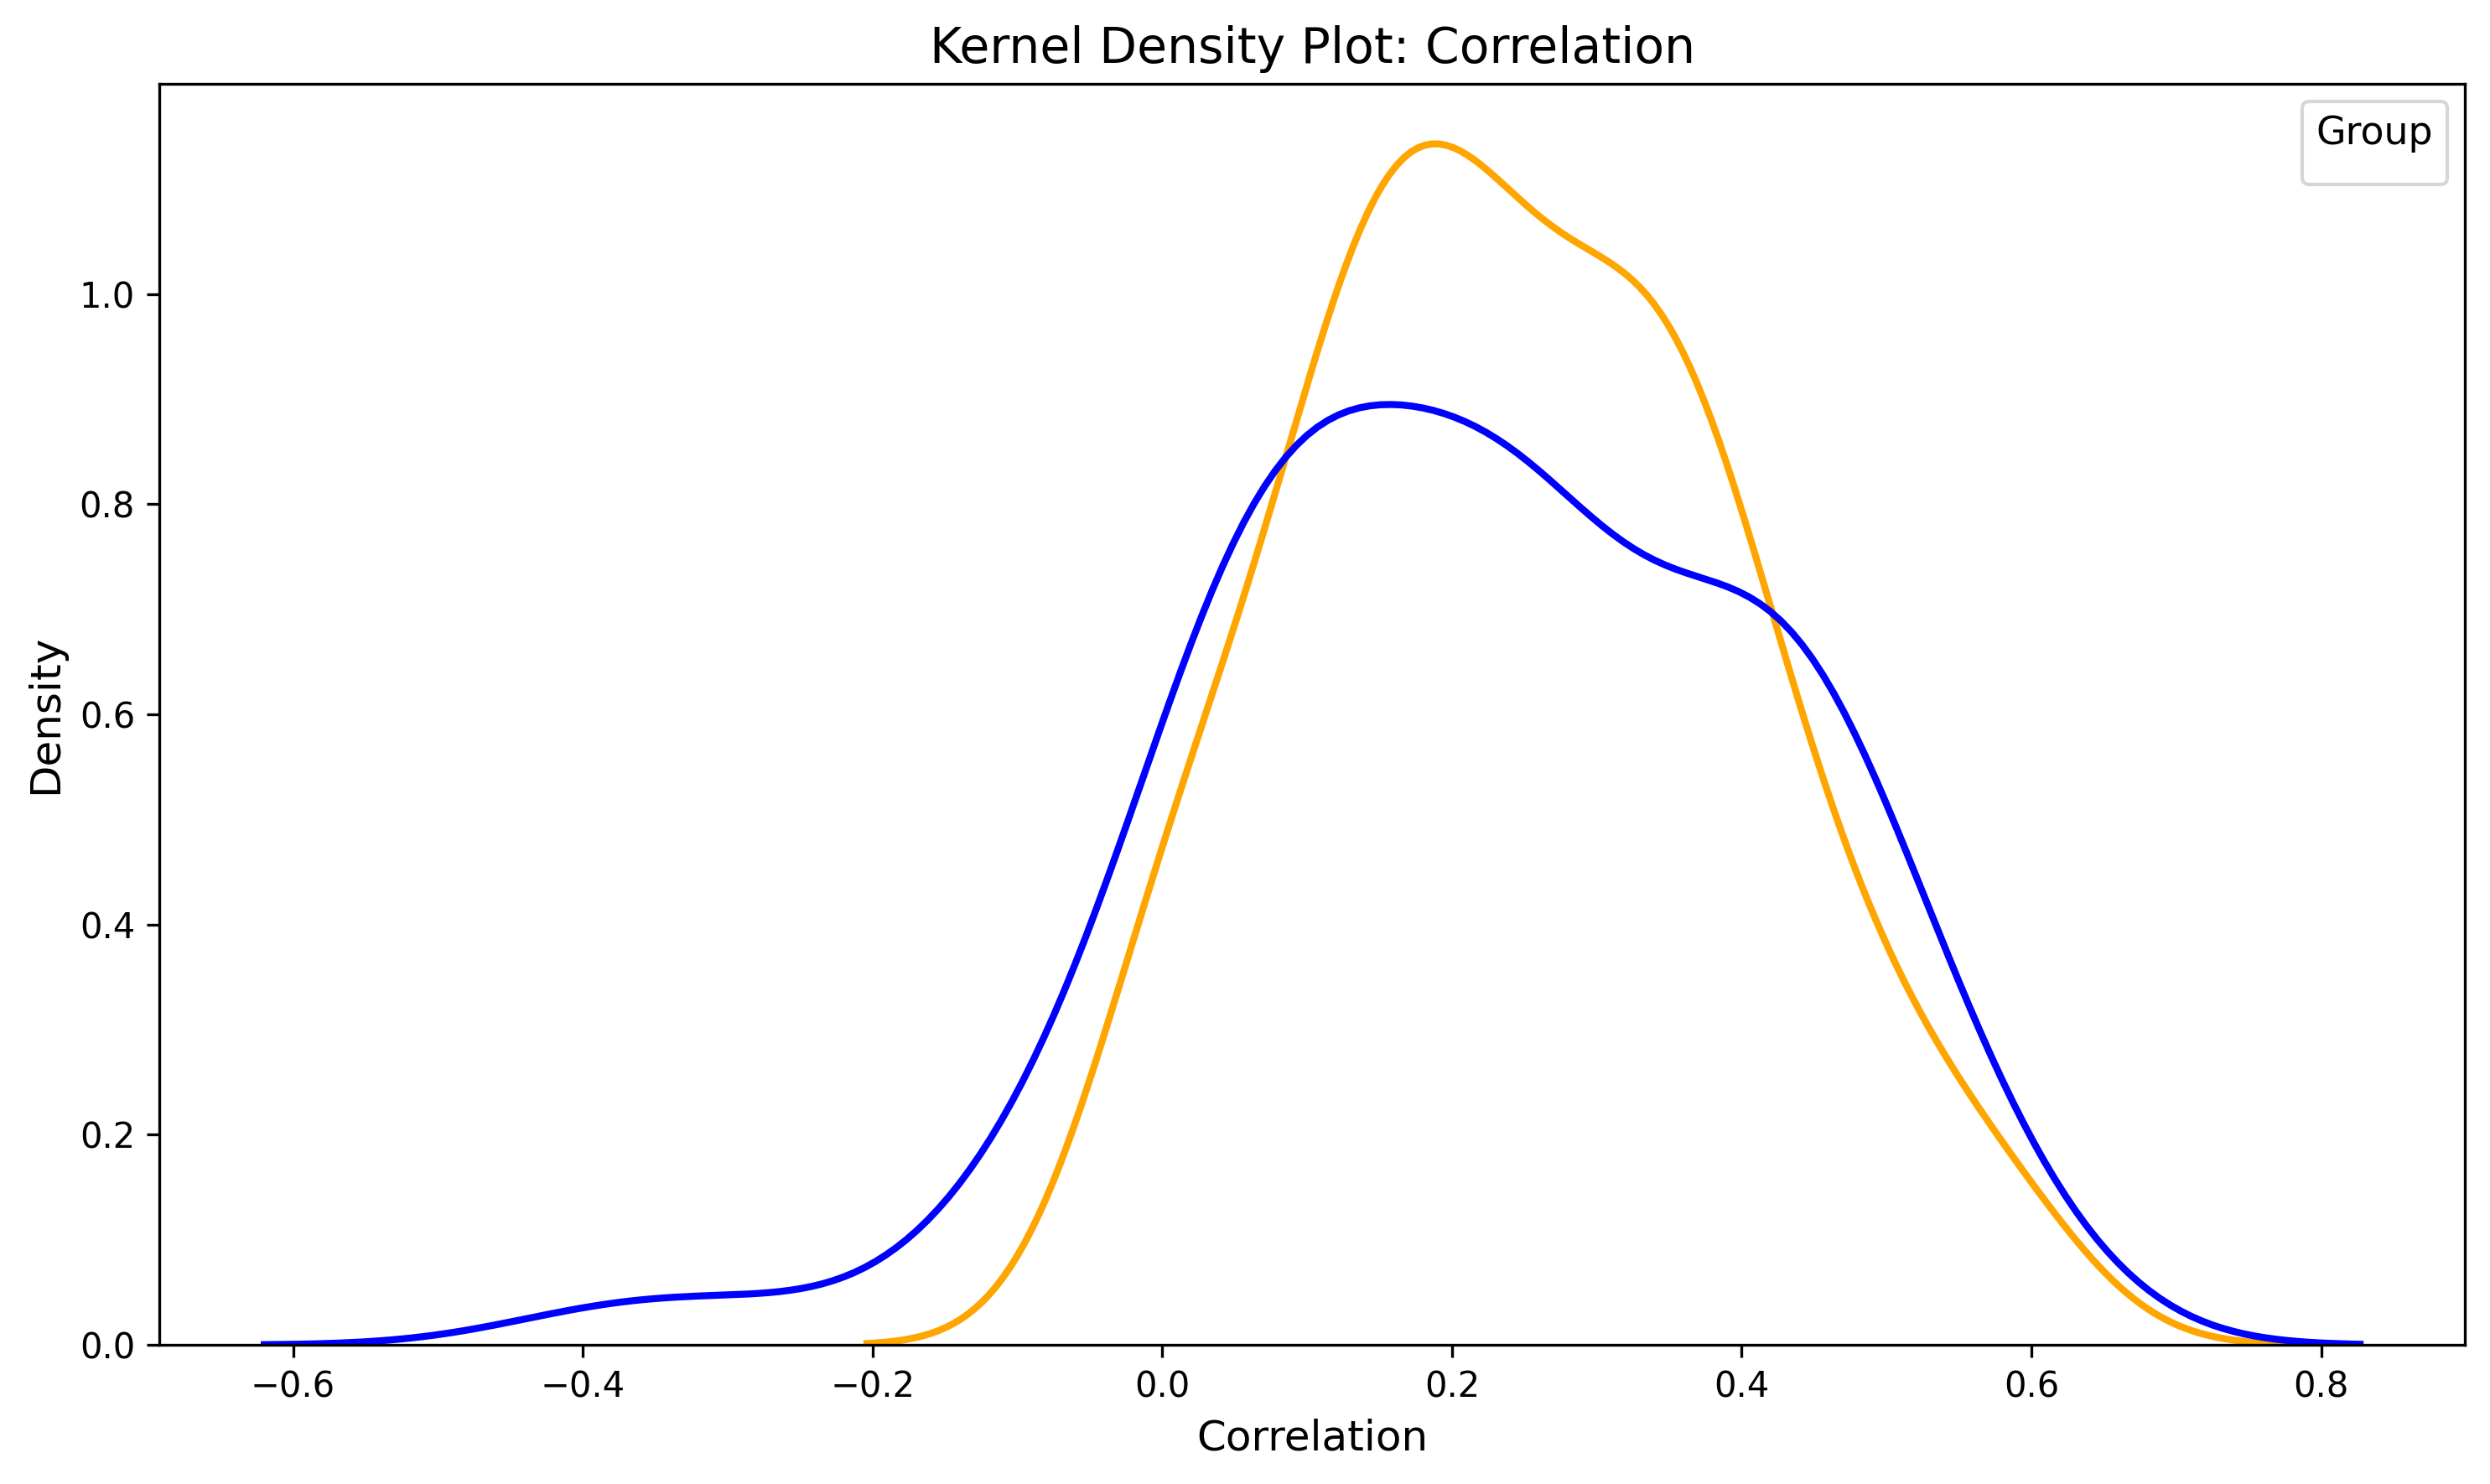

In [62]:
plot_kernel_density(psm20_labeled, column='Correlation', output='/home/ubuntu/psm20_scgpt_kde.png', title = 'Kernel Density Plot: Proteasome20', labels = ['PSM20', 'Background Distribution'])